In [2]:
import json

import seaborn as sns
import pandas as pd

In [8]:
ap = pd.read_excel(r'..\data\metadata\animal_phenotypes.xlsx', index_col=0)

## Vanessa's LipidGenie Lipid Superclass Color Scheme 
- purple = glycerolipid = TG, DG, alk-DG
- red = fatty acyl
- gray = unidentified
- blue = sterol lipid
- yellow = sphingolipid
- green = phospholipid

Glycer Fatty  Sterol Sphing Phosph Carbox Amino  Amine Other  Uniden


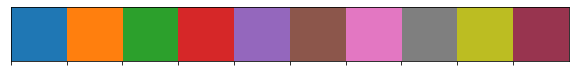

In [3]:
# 0 = Blue         Sterol lipid
# 1 = Orange       Sphingolipid
# 2 = Green        Phospholipid
# 3 = Red          FA
# 4 = Purple       Glycerolipid
# 5 = Brown        Carboxylic Acid
# 6 = Pink         Amino Acid
# 7 = Gray         Unidentified
# 8 = Olive green  Amine/Amide/Ammonium/N-heterocycle
# 9 = Maroon-ish   Other Metabolite

p = sns.color_palette(n_colors=9)
p.append(sns.color_palette('twilight_r', n_colors=15)[4])  # Add a nice maroon color 
sns.palplot(p)
class_colormap = {
    # LIPIDS
    "TG"          : {'color': p[4], 'superclass': 'Glycerolipid'},
    "Alkenyl-DG"  : {'color': p[4], 'superclass': 'Glycerolipid'},
    "AC"          : {'color': p[3], 'superclass': 'Fatty Acyl'},
    "FA"          : {'color': p[3], 'superclass': 'Fatty Acyl'},
    "CE"          : {'color': p[0], 'superclass': 'Sterol Lipid'},
    "SM"          : {'color': p[1], 'superclass': 'Sphingolipid'},
    "Cer[NS]"     : {'color': p[1], 'superclass': 'Sphingolipid'},
    "LysoPE"      : {'color': p[2], 'superclass': 'Phospholipid'},
    "LysoPC"      : {'color': p[2], 'superclass': 'Phospholipid'},
    "PC"          : {'color': p[2], 'superclass': 'Phospholipid'},
    "PI"          : {'color': p[2], 'superclass': 'Phospholipid'},
    "Plasmenyl-PC": {'color': p[2], 'superclass': 'Phospholipid'},
    "Plasmanyl-PC": {'color': p[2], 'superclass': 'Phospholipid'},
    "Plasmenyl-PE": {'color': p[2], 'superclass': 'Phospholipid'},
    "PE"          : {'color': p[2], 'superclass': 'Phospholipid'},
    "Plasmanyl-PE": {'color': p[2], 'superclass': 'Phospholipid'},
    
    # METABOLITES
    "CA"          : {'color': p[5], 'superclass': 'Carboxylic Acid'},
    "AA"          : {'color': p[6], 'superclass': 'Amino Acid'},
    "amine"       : {'color': p[8], 'superclass': 'Amine'},
    "TAA"         : {'color': p[8], 'superclass': 'Amine'},
    "lactam"      : {'color': p[8], 'superclass': 'Amine'},
    "niacin"      : {'color': p[8], 'superclass': 'Amine'},
    "purine"      : {'color': p[8], 'superclass': 'Amine'},
    "amide"       : {'color': p[8], 'superclass': 'Amine'},
    "plasticizer" : {'color': p[9], 'superclass': 'Other Metabolite'},
    "coumarin"    : {'color': p[9], 'superclass': 'Other Metabolite'},
    "sugar"       : {'color': p[9], 'superclass': 'Other Metabolite'},
    "chromenone"  : {'color': p[9], 'superclass': 'Other Metabolite'},
    "other"       : {'color': p[9], 'superclass': 'Other Metabolite'},
    
    # ALL UNKNOWNS MAP TO GRAY
    "unknown"     : {'color': p[7], 'superclass': 'Unidentified'},
}

superclass_colormap = {}
for subdict in class_colormap.values():
    superclass = subdict['superclass']
    superclass_colormap[superclass] = subdict['color']
# display('superclass_colormap: ', superclass_colormap)

print(" ".join([superclass[:6] for superclass in superclass_colormap]))

# lm_colormap = pd.Series({x: (lm_pal[0] if x[0] == 'l' else lm_pal[1]) for x in d.columns})

# Write class_colormap to file 
# with open(r'..\data\metadata\metab_lipid_class_superclass_color.json', 'w') as outfile:
#     json.dump(class_colormap, outfile)

In [4]:
# class_to_superclass_map = {key: val[-1] for key, val in class_colormap.items(),}
# display(class_to_superclass_map)

# with open(r'..\data\metadata\class_to_superclass_map.json', 'w') as outfile:
#     json.dump(class_to_superclass_map, outfile, indent=2)

In [5]:
lm_pal = sns.color_palette('Set2', n_colors=2)
# lm_colormap = pd.Series({x: (lm_pal[0] if x[0] == 'l' else lm_pal[1]) for x in d.columns})
print('LIPID   METAB')
display(lm_pal)
lipid_metab_colormap = {'lipid': lm_pal[0], 
                        'metabolite': lm_pal[1]}

# print('  RBG   FBG  IMPAIR DIAB.  NORMAL')
display(sns.color_palette('colorblind', 10))
blindcolor = sns.color_palette('colorblind', 10)
rbg_color = blindcolor[0]
fbg_color = blindcolor[1]
normal_color = blindcolor[2]
impaired_color = blindcolor[4]
diabetic_color = blindcolor[3]

metadata_colormap = {'FBG':      fbg_color,
                     'RBG':      rbg_color,
                     'normal':   normal_color,
                     'impaired': impaired_color,
                     'diabetic': diabetic_color}

# with open(r'..\data\metadata\metab_lipid_class_superclass_color.json', 'r') as infile:
#     class_colormap = json.load(infile)

# lm_class = data[['Compound Class']]
# lm_class.loc[:, 'd'] = lm_class['Compound Class'].map(class_colormap)
# lm_class.loc[:, 'color'] = lm_class['d'].str[0]
# lm_class.loc[:, 'superclass'] = lm_class['d'].str[1]
# lm_class.drop(['d', 'Compound Class'], inplace=True, axis=1)
# data = data.join(lm_class)
# data[['color', 'superclass']]

LIPID   METAB


[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961)]

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

# Color Nile rats by OGTT glucose rank using a uniform perception color map (e.g. viridis)

In [22]:
cmap = sns.color_palette('viridis', 10)  # twilight_shifted  coolwarm
display(cmap)

ogtt_rank = ap.loc[ap['lcms_sampled'], 'OGTT (AUC)'].sort_values().index

d1 = {str(animal):   color for animal, color in zip(ogtt_rank, cmap)}
d2 = {float(animal): color for animal, color in zip(ogtt_rank, cmap)}
animal_colormap = {**d1, **d2}   # Make string and float version of animal numbers for redundancy
animal_colormap

[(0.283072, 0.130895, 0.449241),
 (0.262138, 0.242286, 0.520837),
 (0.220057, 0.343307, 0.549413),
 (0.177423, 0.437527, 0.557565),
 (0.143343, 0.522773, 0.556295),
 (0.119512, 0.607464, 0.540218),
 (0.166383, 0.690856, 0.496502),
 (0.319809, 0.770914, 0.411152),
 (0.525776, 0.833491, 0.288127),
 (0.762373, 0.876424, 0.137064)]

{'1091': (0.283072, 0.130895, 0.449241),
 '1093': (0.262138, 0.242286, 0.520837),
 '1092': (0.220057, 0.343307, 0.549413),
 '1074': (0.177423, 0.437527, 0.557565),
 '1062': (0.143343, 0.522773, 0.556295),
 '1102': (0.119512, 0.607464, 0.540218),
 '1060': (0.166383, 0.690856, 0.496502),
 '1101': (0.319809, 0.770914, 0.411152),
 '1082': (0.525776, 0.833491, 0.288127),
 '1076': (0.762373, 0.876424, 0.137064),
 1091.0: (0.283072, 0.130895, 0.449241),
 1093.0: (0.262138, 0.242286, 0.520837),
 1092.0: (0.220057, 0.343307, 0.549413),
 1074.0: (0.177423, 0.437527, 0.557565),
 1062.0: (0.143343, 0.522773, 0.556295),
 1102.0: (0.119512, 0.607464, 0.540218),
 1060.0: (0.166383, 0.690856, 0.496502),
 1101.0: (0.319809, 0.770914, 0.411152),
 1082.0: (0.525776, 0.833491, 0.288127),
 1076.0: (0.762373, 0.876424, 0.137064)}

## Coloration by unique color is also possible, but not really important

In [23]:
# animal_colors = sns.color_palette('tab10')
# animal_colormap = {animal: color for animal, color in zip([1091,1093,
#                                                            1060,1062,1074,1092,1102,
#                                                            1076,1082,1101], animal_colors)}
# # for animal in animal_colormap:
# print(" ", "   ".join([str(animal) for animal in animal_colormap]))
# sns.palplot([color for color in animal_colormap.values()])

## Make a color scheme for the 4 litters the Nile rats were born in 

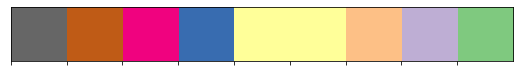

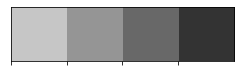

In [24]:
# Grey/brown/violet/blue
litter_colors = sns.palplot(sns.color_palette('Accent_r', 9))
# sns.palplot(litter_colors)
# litter_colormap = {litter_number: color for litter_number, color in zip(range(4), litter_colors[:4])}

# Greys 
litter_colors = pd.Series(sns.color_palette('Greys', 5))
litter_colormap = {litter_number: color for litter_number, color in zip([0,1,2,3], litter_colors.loc[1:])}
sns.palplot(litter_colormap.values())

# combine all color maps and save to json file

In [25]:
combined_colormaps = {
    **lipid_metab_colormap, 
    **metadata_colormap, 
    **superclass_colormap, 
    **animal_colormap,
    **class_colormap,
    **litter_colormap,
}
# display(combined_colormaps)

with open(r'..\data\metadata\color_schemes.json', 'w') as outfile:
    json.dump(combined_colormaps, outfile, indent=2)

# Playing with color schemes

## Color scheme from Bang Wong (Nature Methods, 2011) 

https://www.nature.com/articles/nmeth.1618

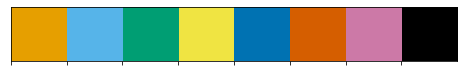

In [52]:
cb = [[230, 159, 0], # orange
      [86, 180, 233], # skyblue
      [0, 158, 115], # Blueish Green
      [240, 228, 66],# Yellow
      [0, 114, 178], # Blue
      [213, 94, 0],  # Vermillion
      [204, 121, 167], # Reddish purple
      [0,0,0]] # Black
for i, c in enumerate(cb): 
    for j, h in enumerate(c):
        cb[i][j] = h/255
sns.palplot(cb)

In [19]:
pals = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 
        'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 
        'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 
        'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 
        'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 
        'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 
        'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r',
        'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 
        'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 
        'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 
        'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag',
        'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 
        'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r',
        'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 
        'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno',
        'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r',
        'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r',
        'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 
        'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 
        'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted',
        'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']
for pal in pals:
    try:
        print(pal)
        display(sns.color_palette(pal, n_colors=20))
    except ValueError:
        pass

Accent


[(0.4980392156862745, 0.788235294117647, 0.4980392156862745),
 (0.7450980392156863, 0.6823529411764706, 0.8313725490196079),
 (0.9921568627450981, 0.7529411764705882, 0.5254901960784314),
 (1.0, 1.0, 0.6),
 (0.2196078431372549, 0.4235294117647059, 0.6901960784313725),
 (0.9411764705882353, 0.00784313725490196, 0.4980392156862745),
 (0.7490196078431373, 0.3568627450980392, 0.09019607843137253),
 (0.4, 0.4, 0.4),
 (0.4980392156862745, 0.788235294117647, 0.4980392156862745),
 (0.7450980392156863, 0.6823529411764706, 0.8313725490196079),
 (0.9921568627450981, 0.7529411764705882, 0.5254901960784314),
 (1.0, 1.0, 0.6),
 (0.2196078431372549, 0.4235294117647059, 0.6901960784313725),
 (0.9411764705882353, 0.00784313725490196, 0.4980392156862745),
 (0.7490196078431373, 0.3568627450980392, 0.09019607843137253),
 (0.4, 0.4, 0.4),
 (0.4980392156862745, 0.788235294117647, 0.4980392156862745),
 (0.7450980392156863, 0.6823529411764706, 0.8313725490196079),
 (0.9921568627450981, 0.7529411764705882, 0.5254901960784314),
 (1.0, 1.0, 0.6)]

Accent_r


[(0.4, 0.4, 0.4),
 (0.4, 0.4, 0.4),
 (0.7490196078431373, 0.3568627450980392, 0.09019607843137253),
 (0.7490196078431373, 0.3568627450980392, 0.09019607843137253),
 (0.7490196078431373, 0.3568627450980392, 0.09019607843137253),
 (0.9411764705882353, 0.00784313725490196, 0.4980392156862745),
 (0.9411764705882353, 0.00784313725490196, 0.4980392156862745),
 (0.2196078431372549, 0.4235294117647059, 0.6901960784313725),
 (0.2196078431372549, 0.4235294117647059, 0.6901960784313725),
 (0.2196078431372549, 0.4235294117647059, 0.6901960784313725),
 (1.0, 1.0, 0.6),
 (1.0, 1.0, 0.6),
 (1.0, 1.0, 0.6),
 (0.9921568627450981, 0.7529411764705882, 0.5254901960784314),
 (0.9921568627450981, 0.7529411764705882, 0.5254901960784314),
 (0.7450980392156863, 0.6823529411764706, 0.8313725490196079),
 (0.7450980392156863, 0.6823529411764706, 0.8313725490196079),
 (0.7450980392156863, 0.6823529411764706, 0.8313725490196079),
 (0.4980392156862745, 0.788235294117647, 0.4980392156862745),
 (0.4980392156862745, 0.788235294117647, 0.4980392156862745)]

Blues


[(0.9317185697808535, 0.9606920415224913, 0.9881891580161476),
 (0.8948096885813149, 0.9370703575547865, 0.9763783160322953),
 (0.8584083044982699, 0.9134486735870818, 0.9645674740484429),
 (0.8229757785467128, 0.8898269896193771, 0.9527566320645905),
 (0.7875432525951558, 0.8662053056516724, 0.9409457900807382),
 (0.7309496347558632, 0.8394771241830065, 0.9213225682429834),
 (0.6718954248366014, 0.8143790849673203, 0.9006535947712418),
 (0.6109803921568627, 0.7874202229911572, 0.8804921184159938),
 (0.5356862745098039, 0.746082276047674, 0.8642522106881968),
 (0.46039215686274515, 0.7047443291041907, 0.8480123029603999),
 (0.38682045367166473, 0.6599615532487505, 0.8264206074586697),
 (0.32628988850442137, 0.6186236063052672, 0.802798923490965),
 (0.265759323337178, 0.5772856593617839, 0.7791772395232603),
 (0.21568627450980393, 0.5294117647058824, 0.7542483660130719),
 (0.16696655132641292, 0.48069204152249134, 0.7291503267973857),
 (0.11787773933102653, 0.4283737024221453, 0.6982698961937717),
 (0.0809688581314879, 0.38113033448673583, 0.661361014994233),
 (0.044059976931949255, 0.3338869665513264, 0.6244521337946944),
 (0.03137254901960784, 0.28567474048442904, 0.5642906574394464),
 (0.03137254901960784, 0.23695501730103807, 0.4919492502883507)]

Blues_r


[(0.03137254901960784, 0.23695501730103805, 0.4919492502883507),
 (0.03137254901960784, 0.28567474048442904, 0.5642906574394464),
 (0.044059976931949255, 0.3338869665513264, 0.6244521337946944),
 (0.0809688581314879, 0.38113033448673583, 0.661361014994233),
 (0.11787773933102653, 0.4283737024221453, 0.6982698961937717),
 (0.16696655132641294, 0.48069204152249134, 0.7291503267973857),
 (0.21568627450980393, 0.5294117647058824, 0.7542483660130719),
 (0.26575932333717806, 0.5772856593617839, 0.7791772395232603),
 (0.3262898885044214, 0.6186236063052672, 0.802798923490965),
 (0.38682045367166473, 0.6599615532487505, 0.8264206074586697),
 (0.4603921568627451, 0.7047443291041907, 0.8480123029603999),
 (0.5356862745098039, 0.746082276047674, 0.8642522106881968),
 (0.6109803921568628, 0.7874202229911572, 0.8804921184159938),
 (0.6718954248366014, 0.8143790849673203, 0.9006535947712418),
 (0.7309496347558632, 0.8394771241830065, 0.9213225682429834),
 (0.7875432525951557, 0.8662053056516724, 0.9409457900807382),
 (0.8229757785467128, 0.8898269896193771, 0.9527566320645905),
 (0.8584083044982699, 0.9134486735870818, 0.9645674740484429),
 (0.8948096885813149, 0.9370703575547865, 0.9763783160322953),
 (0.9317185697808535, 0.9606920415224913, 0.9881891580161476)]

BrBG


[(0.4327566320645906, 0.2491349480968858, 0.02883506343713956),
 (0.5361014994232988, 0.31003460207612454, 0.03806228373702422),
 (0.6313725490196078, 0.3951557093425605, 0.09573241061130335),
 (0.7254901960784313, 0.48373702422145326, 0.16032295271049596),
 (0.7933102652825836, 0.5958477508650518, 0.28719723183391),
 (0.8572856593617839, 0.7257977700884274, 0.4471357170319107),
 (0.9045751633986928, 0.8104575163398692, 0.5816993464052287),
 (0.9470203767781622, 0.8805843906189926, 0.7108804306036139),
 (0.9636293733179546, 0.9237985390234525, 0.8185313341022683),
 (0.9617839292579777, 0.9477893118031526, 0.910803537101115),
 (0.9148019992310651, 0.9497885428681276, 0.9447904652056902),
 (0.8299115724721262, 0.9294886582083814, 0.9152633602460593),
 (0.7257977700884278, 0.8953479430988083, 0.8703575547866207),
 (0.5947712418300657, 0.8418300653594772, 0.8039215686274511),
 (0.4615916955017304, 0.7748558246828146, 0.7299500192233758),
 (0.3116493656286045, 0.6668973471741639, 0.6299884659746252),
 (0.18385236447520187, 0.5695501730103806, 0.5381776239907727),
 (0.0878892733564014, 0.479123414071511, 0.44775086505190315),
 (0.003690888119953864, 0.39031141868512115, 0.3580161476355248),
 (0.0018454440599769317, 0.31280276816609, 0.27312572087658593)]

BrBG_r


[(0.0018454440599769324, 0.31280276816609, 0.27312572087658593),
 (0.003690888119953865, 0.3903114186851212, 0.35801614763552486),
 (0.08788927335640145, 0.47912341407151104, 0.4477508650519032),
 (0.18385236447520192, 0.5695501730103807, 0.538177623990773),
 (0.31164936562860457, 0.6668973471741639, 0.6299884659746252),
 (0.4615916955017303, 0.7748558246828144, 0.7299500192233757),
 (0.5947712418300656, 0.8418300653594772, 0.8039215686274511),
 (0.7257977700884278, 0.8953479430988083, 0.8703575547866207),
 (0.8299115724721262, 0.9294886582083814, 0.9152633602460593),
 (0.914801999231065, 0.9497885428681276, 0.9447904652056902),
 (0.9617839292579777, 0.9477893118031526, 0.910803537101115),
 (0.9636293733179546, 0.9237985390234525, 0.8185313341022683),
 (0.9470203767781623, 0.8805843906189926, 0.7108804306036139),
 (0.9045751633986928, 0.8104575163398693, 0.5816993464052287),
 (0.8572856593617839, 0.7257977700884275, 0.4471357170319108),
 (0.7933102652825836, 0.5958477508650519, 0.28719723183391),
 (0.7254901960784313, 0.48373702422145326, 0.16032295271049596),
 (0.6313725490196078, 0.3951557093425605, 0.09573241061130335),
 (0.5361014994232988, 0.31003460207612454, 0.03806228373702422),
 (0.4327566320645906, 0.2491349480968858, 0.02883506343713956)]

BuGn


[(0.9420530565167243, 0.9779008073817763, 0.9862514417531718),
 (0.9154786620530565, 0.9675663206459054, 0.9803460207612457),
 (0.8853517877739331, 0.9562168396770473, 0.9668281430219147),
 (0.8484429065743945, 0.9429296424452134, 0.9387773933102653),
 (0.8115340253748559, 0.9296424452133795, 0.9107266435986159),
 (0.7419607843137255, 0.9027297193387159, 0.868958093041138),
 (0.6666666666666667, 0.873202614379085, 0.8261437908496732),
 (0.5913725490196078, 0.8433371780084583, 0.7819761630142252),
 (0.516078431372549, 0.8108573625528642, 0.7273510188389081),
 (0.4407843137254902, 0.7783775470972703, 0.6727258746635909),
 (0.3704113802383699, 0.7447904652056901, 0.6063514033064207),
 (0.31578623606305267, 0.7152633602460592, 0.5384390618992695),
 (0.26116109188773545, 0.6857362552864283, 0.4705267204921184),
 (0.21568627450980393, 0.6366013071895424, 0.39869281045751637),
 (0.17139561707035755, 0.5849288735101883, 0.3263514033064206),
 (0.12110726643598617, 0.5312572087658592, 0.2590542099192618),
 (0.06943483275663206, 0.48696655132641287, 0.22214532871972317),
 (0.017762399077277974, 0.44267589388696654, 0.18523644752018453),
 (0.0, 0.3877277970011534, 0.156078431372549),
 (0.0, 0.32719723183391003, 0.13098039215686275)]

BuGn_r


[(0.0, 0.32719723183391003, 0.13098039215686275),
 (0.0, 0.3877277970011534, 0.156078431372549),
 (0.017762399077277974, 0.44267589388696654, 0.18523644752018453),
 (0.06943483275663206, 0.48696655132641287, 0.22214532871972317),
 (0.12110726643598617, 0.5312572087658592, 0.2590542099192618),
 (0.17139561707035755, 0.5849288735101884, 0.3263514033064206),
 (0.2156862745098039, 0.6366013071895424, 0.39869281045751637),
 (0.26116109188773545, 0.6857362552864283, 0.4705267204921184),
 (0.31578623606305267, 0.7152633602460592, 0.5384390618992696),
 (0.37041138023836984, 0.74479046520569, 0.6063514033064207),
 (0.4407843137254902, 0.7783775470972703, 0.6727258746635909),
 (0.516078431372549, 0.8108573625528642, 0.7273510188389081),
 (0.5913725490196078, 0.8433371780084583, 0.7819761630142252),
 (0.6666666666666666, 0.873202614379085, 0.8261437908496732),
 (0.7419607843137255, 0.9027297193387159, 0.868958093041138),
 (0.8115340253748559, 0.9296424452133795, 0.9107266435986159),
 (0.8484429065743945, 0.9429296424452134, 0.9387773933102653),
 (0.8853517877739332, 0.9562168396770473, 0.9668281430219147),
 (0.9154786620530565, 0.9675663206459054, 0.9803460207612457),
 (0.9420530565167243, 0.9779008073817763, 0.9862514417531718)]

BuPu


[(0.9346712802768166, 0.9646136101499424, 0.9788696655132642),
 (0.9007151095732411, 0.9409919261822376, 0.9655824682814302),
 (0.861683967704729, 0.91280276816609, 0.9497577854671281),
 (0.812964244521338, 0.8758938869665513, 0.9290888119953864),
 (0.764244521337947, 0.8389850057670126, 0.9084198385236448),
 (0.7114648212226067, 0.801276432141484, 0.8883044982698962),
 (0.6627450980392157, 0.7673202614379085, 0.8705882352941177),
 (0.616562860438293, 0.7308266051518647, 0.851518646674356),
 (0.5899884659746252, 0.6747251057285659, 0.8219915417147251),
 (0.5634140715109573, 0.6186236063052672, 0.7924644367550941),
 (0.5490196078431373, 0.5538485198000769, 0.759677047289504),
 (0.5490196078431373, 0.49036524413687044, 0.7286735870818916),
 (0.5490196078431373, 0.426881968473664, 0.6976701268742791),
 (0.5437908496732027, 0.36470588235294116, 0.6679738562091503),
 (0.5378854286812764, 0.3026989619377163, 0.6384467512495194),
 (0.5301038062283737, 0.23183391003460208, 0.6004613610149943),
 (0.5197693194925028, 0.1580161476355248, 0.5517416378316032),
 (0.509434832756632, 0.08419838523644751, 0.5030219146482122),
 (0.45550173010380623, 0.04429065743944637, 0.43880046136101497),
 (0.3787312572087658, 0.022145328719723183, 0.36645905420991925)]

BuPu_r


[(0.3787312572087658, 0.022145328719723186, 0.36645905420991925),
 (0.45550173010380623, 0.04429065743944637, 0.438800461361015),
 (0.509434832756632, 0.08419838523644753, 0.5030219146482122),
 (0.5197693194925028, 0.1580161476355248, 0.5517416378316032),
 (0.5301038062283737, 0.23183391003460205, 0.6004613610149943),
 (0.5378854286812764, 0.3026989619377163, 0.6384467512495194),
 (0.5437908496732027, 0.36470588235294116, 0.6679738562091503),
 (0.5490196078431373, 0.426881968473664, 0.6976701268742791),
 (0.5490196078431373, 0.49036524413687044, 0.7286735870818916),
 (0.5490196078431373, 0.5538485198000769, 0.759677047289504),
 (0.5634140715109573, 0.6186236063052672, 0.7924644367550941),
 (0.5899884659746252, 0.6747251057285659, 0.8219915417147251),
 (0.616562860438293, 0.7308266051518647, 0.851518646674356),
 (0.6627450980392157, 0.7673202614379085, 0.8705882352941177),
 (0.7114648212226067, 0.801276432141484, 0.8883044982698962),
 (0.764244521337947, 0.8389850057670126, 0.9084198385236447),
 (0.812964244521338, 0.8758938869665513, 0.9290888119953864),
 (0.861683967704729, 0.91280276816609, 0.9497577854671281),
 (0.9007151095732411, 0.9409919261822376, 0.9655824682814302),
 (0.9346712802768166, 0.9646136101499424, 0.9788696655132642)]

CMRmap


[(0.05647058823529411, 0.05647058823529411, 0.18823529411764706),
 (0.11294117647058823, 0.11294117647058823, 0.3764705882352941),
 (0.16941176470588235, 0.15, 0.5323529411764706),
 (0.22588235294117648, 0.15, 0.6264705882352941),
 (0.2823529411764706, 0.15, 0.7205882352941176),
 (0.3870588235294118, 0.16450980392156864, 0.6774509803921569),
 (0.5, 0.18333333333333335, 0.5833333333333334),
 (0.6172549019607843, 0.20215686274509806, 0.48490196078431375),
 (0.7678431372549019, 0.22098039215686274, 0.3531372549019608),
 (0.9184313725490196, 0.23980392156862745, 0.2213725490196079),
 (0.9796078431372549, 0.30098039215686273, 0.11941176470588236),
 (0.9419607843137255, 0.3950980392156863, 0.06294117647058822),
 (0.9043137254901961, 0.48921568627450984, 0.006470588235294117),
 (0.9, 0.5833333333333334, 0.03333333333333333),
 (0.9, 0.6774509803921569, 0.07098039215686275),
 (0.9, 0.7676470588235295, 0.14705882352941177),
 (0.9, 0.8241176470588235, 0.29764705882352943),
 (0.9, 0.8805882352941177, 0.44823529411764707),
 (0.9247058823529412, 0.9247058823529412, 0.6235294117647059),
 (0.9623529411764706, 0.9623529411764706, 0.8117647058823529)]

CMRmap_r


[(0.9623529411764706, 0.9623529411764706, 0.8117647058823529),
 (0.9247058823529412, 0.9247058823529412, 0.6235294117647059),
 (0.9, 0.8805882352941177, 0.44823529411764707),
 (0.9, 0.8241176470588235, 0.2976470588235294),
 (0.9, 0.7676470588235293, 0.14705882352941174),
 (0.9, 0.6774509803921569, 0.07098039215686275),
 (0.9, 0.5833333333333334, 0.03333333333333334),
 (0.9043137254901961, 0.4892156862745098, 0.006470588235294118),
 (0.9419607843137255, 0.39509803921568626, 0.06294117647058824),
 (0.9796078431372549, 0.3009803921568628, 0.11941176470588234),
 (0.9184313725490196, 0.23980392156862745, 0.22137254901960784),
 (0.7678431372549019, 0.22098039215686274, 0.3531372549019608),
 (0.6172549019607843, 0.20215686274509803, 0.4849019607843137),
 (0.5, 0.18333333333333335, 0.5833333333333334),
 (0.38705882352941173, 0.1645098039215686, 0.6774509803921569),
 (0.2823529411764706, 0.15, 0.7205882352941176),
 (0.22588235294117648, 0.15, 0.6264705882352941),
 (0.16941176470588235, 0.15, 0.5323529411764706),
 (0.11294117647058824, 0.11294117647058824, 0.3764705882352941),
 (0.05647058823529412, 0.05647058823529412, 0.18823529411764706)]

Dark2


[(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
 (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
 (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
 (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
 (0.4, 0.6509803921568628, 0.11764705882352941),
 (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
 (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
 (0.4, 0.4, 0.4),
 (0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
 (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
 (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
 (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
 (0.4, 0.6509803921568628, 0.11764705882352941),
 (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
 (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
 (0.4, 0.4, 0.4),
 (0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
 (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
 (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
 (0.9058823529411765, 0.1607843137254902, 0.5411764705882353)]

Dark2_r


[(0.4, 0.4, 0.4),
 (0.4, 0.4, 0.4),
 (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
 (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
 (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
 (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
 (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
 (0.4, 0.6509803921568628, 0.11764705882352941),
 (0.4, 0.6509803921568628, 0.11764705882352941),
 (0.4, 0.6509803921568628, 0.11764705882352941),
 (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
 (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
 (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
 (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
 (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
 (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
 (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
 (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
 (0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
 (0.10588235294117647, 0.6196078431372549, 0.4666666666666667)]

GnBu


[(0.9346712802768166, 0.9749480968858132, 0.9101730103806228),
 (0.9007151095732411, 0.9616608996539792, 0.8791695501730104),
 (0.8682814302191465, 0.9488811995386389, 0.8476585928489042),
 (0.8387543252595155, 0.9370703575547865, 0.8151787773933102),
 (0.8092272202998847, 0.9252595155709342, 0.7826989619377163),
 (0.7590311418685122, 0.9056362937331796, 0.7543406382160708),
 (0.7058823529411765, 0.8849673202614379, 0.7307189542483661),
 (0.6512110726643598, 0.8637908496732026, 0.7123414071510957),
 (0.5847750865051903, 0.8386928104575164, 0.7344867358708189),
 (0.5183391003460207, 0.8135947712418301, 0.7566320645905421),
 (0.4463667820069204, 0.7800076893502499, 0.7806228373702422),
 (0.37993079584775086, 0.7430988081507113, 0.8027681660899654),
 (0.31349480968858134, 0.7061899269511726, 0.8249134948096886),
 (0.2601307189542484, 0.6509803921568628, 0.7999999999999999),
 (0.2084582852748943, 0.5934025374855825, 0.7689965397923876),
 (0.15247981545559403, 0.5324106113033449, 0.7367935409457901),
 (0.10080738177623991, 0.4792618223760092, 0.7102191464821223),
 (0.04913494809688582, 0.4261130334486736, 0.6836447520184545),
 (0.03137254901960784, 0.3690888119953864, 0.6328489042675894),
 (0.03137254901960784, 0.31003460207612454, 0.5693656286043829)]

GnBu_r


[(0.03137254901960784, 0.31003460207612454, 0.5693656286043829),
 (0.03137254901960784, 0.3690888119953864, 0.6328489042675894),
 (0.04913494809688582, 0.4261130334486736, 0.6836447520184545),
 (0.10080738177623991, 0.4792618223760092, 0.7102191464821223),
 (0.15247981545559403, 0.5324106113033449, 0.7367935409457901),
 (0.2084582852748943, 0.5934025374855825, 0.7689965397923876),
 (0.2601307189542484, 0.6509803921568628, 0.7999999999999999),
 (0.31349480968858134, 0.7061899269511726, 0.8249134948096886),
 (0.3799307958477509, 0.7430988081507113, 0.8027681660899654),
 (0.4463667820069204, 0.7800076893502499, 0.7806228373702422),
 (0.5183391003460207, 0.8135947712418301, 0.7566320645905421),
 (0.5847750865051903, 0.8386928104575164, 0.7344867358708189),
 (0.6512110726643598, 0.8637908496732026, 0.7123414071510957),
 (0.7058823529411765, 0.8849673202614379, 0.7307189542483661),
 (0.7590311418685122, 0.9056362937331796, 0.7543406382160708),
 (0.8092272202998847, 0.9252595155709342, 0.7826989619377163),
 (0.8387543252595155, 0.9370703575547865, 0.8151787773933102),
 (0.8682814302191465, 0.9488811995386389, 0.8476585928489042),
 (0.9007151095732411, 0.9616608996539792, 0.8791695501730104),
 (0.9346712802768166, 0.9749480968858132, 0.9101730103806228)]

Greens


[(0.9420530565167243, 0.9779008073817763, 0.9297808535178778),
 (0.9154786620530565, 0.9675663206459054, 0.8987773933102653),
 (0.8828143021914648, 0.9546943483275664, 0.8621914648212226),
 (0.8385236447520185, 0.9369780853517877, 0.8149480968858132),
 (0.7942329873125721, 0.9192618223760092, 0.7677047289504036),
 (0.7371472510572856, 0.895517108804306, 0.7108342945021145),
 (0.681045751633987, 0.8718954248366013, 0.6562091503267974),
 (0.623760092272203, 0.8474279123414071, 0.6015840061514801),
 (0.5573241061130334, 0.8164244521337947, 0.546958861976163),
 (0.4908881199538639, 0.7854209919261823, 0.49233371780084584),
 (0.41411764705882353, 0.748635140330642, 0.4427527873894656),
 (0.3388235294117647, 0.7117262591311034, 0.40584390618992694),
 (0.26352941176470585, 0.6748173779315647, 0.36893502499038827),
 (0.21568627450980393, 0.6287581699346405, 0.3333333333333333),
 (0.17139561707035755, 0.581514801999231, 0.2979008073817762),
 (0.12110726643598617, 0.5312572087658592, 0.2590542099192618),
 (0.06943483275663206, 0.48696655132641287, 0.22214532871972317),
 (0.017762399077277974, 0.44267589388696654, 0.18523644752018453),
 (0.0, 0.3877277970011534, 0.156078431372549),
 (0.0, 0.32719723183391003, 0.13098039215686275)]

Greens_r


[(0.0, 0.32719723183391003, 0.13098039215686275),
 (0.0, 0.3877277970011534, 0.156078431372549),
 (0.017762399077277974, 0.44267589388696654, 0.18523644752018453),
 (0.06943483275663206, 0.48696655132641287, 0.22214532871972317),
 (0.12110726643598617, 0.5312572087658592, 0.2590542099192618),
 (0.17139561707035755, 0.581514801999231, 0.2979008073817762),
 (0.2156862745098039, 0.6287581699346405, 0.3333333333333333),
 (0.26352941176470585, 0.6748173779315647, 0.36893502499038827),
 (0.3388235294117647, 0.7117262591311034, 0.40584390618992694),
 (0.4141176470588235, 0.748635140330642, 0.4427527873894656),
 (0.4908881199538639, 0.7854209919261823, 0.49233371780084584),
 (0.5573241061130334, 0.8164244521337947, 0.546958861976163),
 (0.623760092272203, 0.8474279123414071, 0.6015840061514801),
 (0.681045751633987, 0.8718954248366013, 0.6562091503267974),
 (0.7371472510572856, 0.895517108804306, 0.7108342945021145),
 (0.7942329873125721, 0.9192618223760092, 0.7677047289504036),
 (0.8385236447520185, 0.9369780853517877, 0.8149480968858132),
 (0.8828143021914648, 0.9546943483275664, 0.8621914648212226),
 (0.9154786620530565, 0.9675663206459054, 0.8987773933102653),
 (0.9420530565167243, 0.9779008073817763, 0.9297808535178778)]

Greys


[(0.9778546712802768, 0.9778546712802768, 0.9778546712802768),
 (0.9557093425605536, 0.9557093425605536, 0.9557093425605536),
 (0.9295040369088812, 0.9295040369088812, 0.9295040369088812),
 (0.8955478662053056, 0.8955478662053056, 0.8955478662053056),
 (0.8615916955017301, 0.8615916955017301, 0.8615916955017301),
 (0.819115724721261, 0.819115724721261, 0.819115724721261),
 (0.7777777777777778, 0.7777777777777778, 0.7777777777777778),
 (0.7345790080738178, 0.7345790080738178, 0.7345790080738178),
 (0.6770011534025375, 0.6770011534025375, 0.6770011534025375),
 (0.6194232987312572, 0.6194232987312572, 0.6194232987312572),
 (0.560246059207997, 0.560246059207997, 0.560246059207997),
 (0.5085736255286428, 0.5085736255286428, 0.5085736255286428),
 (0.45690119184928873, 0.45690119184928873, 0.45690119184928873),
 (0.40784313725490196, 0.40784313725490196, 0.40784313725490196),
 (0.35912341407151094, 0.35912341407151094, 0.35912341407151094),
 (0.30080738177623995, 0.30080738177623995, 0.30080738177623995),
 (0.23437139561707038, 0.23437139561707038, 0.23437139561707038),
 (0.1679354094579008, 0.1679354094579008, 0.1679354094579008),
 (0.10925028835063438, 0.10925028835063438, 0.10925028835063438),
 (0.05462514417531719, 0.05462514417531719, 0.05462514417531719)]

Greys_r


[(0.05462514417531719, 0.05462514417531719, 0.05462514417531719),
 (0.10925028835063438, 0.10925028835063438, 0.10925028835063438),
 (0.1679354094579008, 0.1679354094579008, 0.1679354094579008),
 (0.23437139561707038, 0.23437139561707038, 0.23437139561707038),
 (0.3008073817762399, 0.3008073817762399, 0.3008073817762399),
 (0.359123414071511, 0.359123414071511, 0.359123414071511),
 (0.40784313725490196, 0.40784313725490196, 0.40784313725490196),
 (0.45690119184928873, 0.45690119184928873, 0.45690119184928873),
 (0.5085736255286428, 0.5085736255286428, 0.5085736255286428),
 (0.560246059207997, 0.560246059207997, 0.560246059207997),
 (0.6194232987312572, 0.6194232987312572, 0.6194232987312572),
 (0.6770011534025375, 0.6770011534025375, 0.6770011534025375),
 (0.7345790080738178, 0.7345790080738178, 0.7345790080738178),
 (0.7777777777777778, 0.7777777777777778, 0.7777777777777778),
 (0.819115724721261, 0.819115724721261, 0.819115724721261),
 (0.8615916955017301, 0.8615916955017301, 0.8615916955017301),
 (0.8955478662053056, 0.8955478662053056, 0.8955478662053056),
 (0.9295040369088812, 0.9295040369088812, 0.9295040369088812),
 (0.9557093425605536, 0.9557093425605536, 0.9557093425605536),
 (0.9778546712802768, 0.9778546712802768, 0.9778546712802768)]

OrRd


[(0.9985236447520185, 0.946482122260669, 0.8723414071510958),
 (0.9970472895040369, 0.9243367935409458, 0.8191926182237601),
 (0.9955709342560554, 0.8996539792387543, 0.7629988465974625),
 (0.9940945790080739, 0.8701268742791234, 0.7009919261822376),
 (0.9926182237600923, 0.8405997693194925, 0.6389850057670127),
 (0.9921568627450981, 0.8029219530949635, 0.5900192233756247),
 (0.9921568627450981, 0.7660130718954248, 0.5516339869281046),
 (0.9919876970396002, 0.7255517108804306, 0.5103729334871204),
 (0.9905113417916186, 0.6576393694732795, 0.4468896578239139),
 (0.9890349865436371, 0.5897270280661284, 0.38340638216070744),
 (0.9778392925797771, 0.5209534794309881, 0.3354248366013072),
 (0.9586466743560169, 0.4618992695117263, 0.3103267973856209),
 (0.9394540561322569, 0.4028450595924644, 0.28522875816993465),
 (0.9058823529411765, 0.32679738562091504, 0.22875816993464054),
 (0.8704498269896194, 0.2485505574778931, 0.16822760476739718),
 (0.8265282583621684, 0.16608996539792387, 0.10726643598615918),
 (0.7733794694348327, 0.09522491349480969, 0.06149942329873125),
 (0.7202306805074971, 0.02435986159169551, 0.015732410611303344),
 (0.6515801614763552, 0.0, 0.0),
 (0.5748096885813149, 0.0, 0.0)]

OrRd_r


[(0.5748096885813149, 0.0, 0.0),
 (0.6515801614763552, 0.0, 0.0),
 (0.7202306805074971, 0.024359861591695505, 0.015732410611303347),
 (0.7733794694348327, 0.09522491349480969, 0.06149942329873125),
 (0.8265282583621684, 0.16608996539792387, 0.10726643598615916),
 (0.8704498269896194, 0.24855055747789312, 0.16822760476739715),
 (0.9058823529411765, 0.326797385620915, 0.2287581699346405),
 (0.9394540561322569, 0.4028450595924644, 0.28522875816993465),
 (0.9586466743560169, 0.4618992695117263, 0.3103267973856209),
 (0.9778392925797771, 0.5209534794309881, 0.3354248366013072),
 (0.9890349865436371, 0.5897270280661284, 0.38340638216070744),
 (0.9905113417916186, 0.6576393694732795, 0.4468896578239139),
 (0.9919876970396002, 0.7255517108804306, 0.5103729334871204),
 (0.9921568627450981, 0.7660130718954248, 0.5516339869281046),
 (0.9921568627450981, 0.8029219530949635, 0.5900192233756247),
 (0.9926182237600923, 0.8405997693194925, 0.6389850057670127),
 (0.9940945790080739, 0.8701268742791234, 0.7009919261822376),
 (0.9955709342560554, 0.8996539792387543, 0.7629988465974625),
 (0.9970472895040369, 0.9243367935409458, 0.8191926182237601),
 (0.9985236447520185, 0.946482122260669, 0.8723414071510958)]

Oranges


[(0.9985236447520185, 0.938638985005767, 0.8787543252595156),
 (0.9970472895040369, 0.9164936562860438, 0.8359400230680507),
 (0.9955709342560554, 0.8907958477508651, 0.7855132641291811),
 (0.9940945790080739, 0.8583160322952711, 0.720553633217993),
 (0.9926182237600923, 0.825836216839677, 0.6555940023068051),
 (0.9921568627450981, 0.7769934640522875, 0.5727028066128412),
 (0.9921568627450981, 0.726797385620915, 0.49150326797385624),
 (0.9921568627450981, 0.6767704728950404, 0.4116570549788543),
 (0.9921568627450981, 0.6280507497116494, 0.34226835832372166),
 (0.9921568627450981, 0.5793310265282584, 0.272879661668589),
 (0.982560553633218, 0.5241522491349481, 0.20250672818146867),
 (0.9648442906574395, 0.47100346020761247, 0.14197616301422528),
 (0.9471280276816608, 0.41785467128027676, 0.08144559784698194),
 (0.9137254901960784, 0.3686274509803921, 0.050980392156862744),
 (0.8782929642445213, 0.31990772779700116, 0.024405997693194924),
 (0.8274509803921568, 0.2740484429065744, 0.004844290657439446),
 (0.7521568627450981, 0.24747404844290657, 0.007797001153402537),
 (0.6768627450980392, 0.22089965397923875, 0.010749711649365626),
 (0.6131949250288351, 0.1972318339100346, 0.012733564013840829),
 (0.5556170703575548, 0.17508650519031144, 0.014209919261822374)]

Oranges_r


[(0.5556170703575548, 0.17508650519031144, 0.014209919261822374),
 (0.6131949250288351, 0.1972318339100346, 0.012733564013840829),
 (0.6768627450980392, 0.22089965397923875, 0.010749711649365628),
 (0.7521568627450981, 0.24747404844290657, 0.007797001153402537),
 (0.8274509803921568, 0.2740484429065744, 0.004844290657439446),
 (0.8782929642445213, 0.31990772779700116, 0.024405997693194927),
 (0.9137254901960784, 0.3686274509803921, 0.050980392156862744),
 (0.9471280276816608, 0.4178546712802768, 0.08144559784698192),
 (0.9648442906574395, 0.47100346020761247, 0.14197616301422528),
 (0.982560553633218, 0.5241522491349481, 0.20250672818146864),
 (0.9921568627450981, 0.5793310265282584, 0.272879661668589),
 (0.9921568627450981, 0.6280507497116494, 0.34226835832372166),
 (0.9921568627450981, 0.6767704728950403, 0.4116570549788543),
 (0.9921568627450981, 0.726797385620915, 0.4915032679738562),
 (0.9921568627450981, 0.7769934640522875, 0.5727028066128412),
 (0.9926182237600923, 0.825836216839677, 0.6555940023068051),
 (0.9940945790080739, 0.8583160322952711, 0.720553633217993),
 (0.9955709342560554, 0.8907958477508651, 0.7855132641291811),
 (0.9970472895040369, 0.9164936562860438, 0.8359400230680507),
 (0.9985236447520185, 0.938638985005767, 0.8787543252595156)]

PRGn


[(0.3506343713956171, 0.07750865051903114, 0.39746251441753166),
 (0.45028835063437145, 0.15501730103806227, 0.5008073817762398),
 (0.5192618223760093, 0.27773933102652826, 0.578316032295271),
 (0.5838523644752018, 0.4069204152249135, 0.6521337946943483),
 (0.6567474048442906, 0.5125720876585929, 0.7204152249134947),
 (0.7387158785082659, 0.6185313341022682, 0.7923875432525951),
 (0.8091503267973855, 0.7084967320261437, 0.8444444444444444),
 (0.8774317570165321, 0.7952326028450596, 0.8905805459438677),
 (0.9231064975009612, 0.8690503652441369, 0.9259515570934256),
 (0.952633602460592, 0.9336409073433295, 0.9536332179930795),
 (0.938638985005767, 0.9616301422529796, 0.932641291810842),
 (0.8832756632064591, 0.9487120338331411, 0.8662053056516725),
 (0.8117647058823532, 0.9250288350634372, 0.7882352941176473),
 (0.7176470588235296, 0.8862745098039216, 0.6941176470588237),
 (0.6100730488273743, 0.8346020761245676, 0.593540945790081),
 (0.4581314878892735, 0.7446366782006921, 0.46758938869665523),
 (0.3238754325259516, 0.657439446366782, 0.3610149942329873),
 (0.20761245674740486, 0.5577854671280277, 0.28350634371395617),
 (0.09965397923875433, 0.4585928489042676, 0.20922722029988466),
 (0.04982698961937716, 0.36262975778546713, 0.15755478662053057)]

PRGn_r


[(0.04982698961937717, 0.36262975778546713, 0.15755478662053057),
 (0.09965397923875434, 0.45859284890426766, 0.2092272202998847),
 (0.20761245674740494, 0.5577854671280278, 0.2835063437139562),
 (0.3238754325259517, 0.6574394463667821, 0.3610149942329874),
 (0.45813148788927355, 0.7446366782006921, 0.46758938869665523),
 (0.6100730488273742, 0.8346020761245676, 0.5935409457900809),
 (0.7176470588235295, 0.8862745098039216, 0.6941176470588236),
 (0.8117647058823532, 0.9250288350634372, 0.7882352941176473),
 (0.8832756632064591, 0.9487120338331411, 0.8662053056516725),
 (0.938638985005767, 0.9616301422529796, 0.932641291810842),
 (0.952633602460592, 0.9336409073433295, 0.9536332179930795),
 (0.9231064975009612, 0.8690503652441369, 0.9259515570934256),
 (0.8774317570165321, 0.7952326028450596, 0.8905805459438677),
 (0.8091503267973856, 0.7084967320261438, 0.8444444444444444),
 (0.738715878508266, 0.6185313341022683, 0.7923875432525952),
 (0.6567474048442906, 0.5125720876585929, 0.7204152249134947),
 (0.5838523644752018, 0.4069204152249135, 0.6521337946943483),
 (0.5192618223760093, 0.27773933102652826, 0.578316032295271),
 (0.4502883506343714, 0.15501730103806227, 0.5008073817762398),
 (0.3506343713956171, 0.07750865051903114, 0.39746251441753166)]

Paired


[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392),
 (0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0)]

Paired_r


[(0.6941176470588235, 0.34901960784313724, 0.1568627450980392),
 (1.0, 1.0, 0.6),
 (1.0, 1.0, 0.6),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 0.4980392156862745, 0.0),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6509803921568628, 0.807843137254902, 0.8901960784313725)]

Pastel1


[(0.984313725490196, 0.7058823529411765, 0.6823529411764706),
 (0.7019607843137254, 0.803921568627451, 0.8901960784313725),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (0.8705882352941177, 0.796078431372549, 0.8941176470588236),
 (0.996078431372549, 0.8509803921568627, 0.6509803921568628),
 (1.0, 1.0, 0.8),
 (0.8980392156862745, 0.8470588235294118, 0.7411764705882353),
 (0.9921568627450981, 0.8549019607843137, 0.9254901960784314),
 (0.9490196078431372, 0.9490196078431372, 0.9490196078431372),
 (0.984313725490196, 0.7058823529411765, 0.6823529411764706),
 (0.7019607843137254, 0.803921568627451, 0.8901960784313725),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (0.8705882352941177, 0.796078431372549, 0.8941176470588236),
 (0.996078431372549, 0.8509803921568627, 0.6509803921568628),
 (1.0, 1.0, 0.8),
 (0.8980392156862745, 0.8470588235294118, 0.7411764705882353),
 (0.9921568627450981, 0.8549019607843137, 0.9254901960784314),
 (0.9490196078431372, 0.9490196078431372, 0.9490196078431372),
 (0.984313725490196, 0.7058823529411765, 0.6823529411764706),
 (0.7019607843137254, 0.803921568627451, 0.8901960784313725)]

Pastel1_r


[(0.9490196078431372, 0.9490196078431372, 0.9490196078431372),
 (0.9490196078431372, 0.9490196078431372, 0.9490196078431372),
 (0.9921568627450981, 0.8549019607843137, 0.9254901960784314),
 (0.9921568627450981, 0.8549019607843137, 0.9254901960784314),
 (0.8980392156862745, 0.8470588235294118, 0.7411764705882353),
 (0.8980392156862745, 0.8470588235294118, 0.7411764705882353),
 (1.0, 1.0, 0.8),
 (1.0, 1.0, 0.8),
 (1.0, 1.0, 0.8),
 (0.996078431372549, 0.8509803921568627, 0.6509803921568628),
 (0.996078431372549, 0.8509803921568627, 0.6509803921568628),
 (0.8705882352941177, 0.796078431372549, 0.8941176470588236),
 (0.8705882352941177, 0.796078431372549, 0.8941176470588236),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (0.7019607843137254, 0.803921568627451, 0.8901960784313725),
 (0.7019607843137254, 0.803921568627451, 0.8901960784313725),
 (0.984313725490196, 0.7058823529411765, 0.6823529411764706),
 (0.984313725490196, 0.7058823529411765, 0.6823529411764706)]

Pastel2


[(0.7019607843137254, 0.8862745098039215, 0.803921568627451),
 (0.9921568627450981, 0.803921568627451, 0.6745098039215687),
 (0.796078431372549, 0.8352941176470589, 0.9098039215686274),
 (0.9568627450980393, 0.792156862745098, 0.8941176470588236),
 (0.9019607843137255, 0.9607843137254902, 0.788235294117647),
 (1.0, 0.9490196078431372, 0.6823529411764706),
 (0.9450980392156862, 0.8862745098039215, 0.8),
 (0.8, 0.8, 0.8),
 (0.7019607843137254, 0.8862745098039215, 0.803921568627451),
 (0.9921568627450981, 0.803921568627451, 0.6745098039215687),
 (0.796078431372549, 0.8352941176470589, 0.9098039215686274),
 (0.9568627450980393, 0.792156862745098, 0.8941176470588236),
 (0.9019607843137255, 0.9607843137254902, 0.788235294117647),
 (1.0, 0.9490196078431372, 0.6823529411764706),
 (0.9450980392156862, 0.8862745098039215, 0.8),
 (0.8, 0.8, 0.8),
 (0.7019607843137254, 0.8862745098039215, 0.803921568627451),
 (0.9921568627450981, 0.803921568627451, 0.6745098039215687),
 (0.796078431372549, 0.8352941176470589, 0.9098039215686274),
 (0.9568627450980393, 0.792156862745098, 0.8941176470588236)]

Pastel2_r


[(0.8, 0.8, 0.8),
 (0.8, 0.8, 0.8),
 (0.9450980392156862, 0.8862745098039215, 0.8),
 (0.9450980392156862, 0.8862745098039215, 0.8),
 (0.9450980392156862, 0.8862745098039215, 0.8),
 (1.0, 0.9490196078431372, 0.6823529411764706),
 (1.0, 0.9490196078431372, 0.6823529411764706),
 (0.9019607843137255, 0.9607843137254902, 0.788235294117647),
 (0.9019607843137255, 0.9607843137254902, 0.788235294117647),
 (0.9019607843137255, 0.9607843137254902, 0.788235294117647),
 (0.9568627450980393, 0.792156862745098, 0.8941176470588236),
 (0.9568627450980393, 0.792156862745098, 0.8941176470588236),
 (0.9568627450980393, 0.792156862745098, 0.8941176470588236),
 (0.796078431372549, 0.8352941176470589, 0.9098039215686274),
 (0.796078431372549, 0.8352941176470589, 0.9098039215686274),
 (0.9921568627450981, 0.803921568627451, 0.6745098039215687),
 (0.9921568627450981, 0.803921568627451, 0.6745098039215687),
 (0.9921568627450981, 0.803921568627451, 0.6745098039215687),
 (0.7019607843137254, 0.8862745098039215, 0.803921568627451),
 (0.7019607843137254, 0.8862745098039215, 0.803921568627451)]

PiYG


[(0.6583621683967705, 0.05190311418685121, 0.40092272202998847),
 (0.7598615916955018, 0.09988465974625144, 0.4802768166089965),
 (0.8129181084198386, 0.2544405997693195, 0.5693194925028835),
 (0.8590542099192618, 0.42422145328719724, 0.6597462514417531),
 (0.8968858131487889, 0.5538638985005766, 0.7432525951557093),
 (0.9348712033833141, 0.6798154555940021, 0.8312187620146096),
 (0.9607843137254902, 0.7686274509803921, 0.8823529411764706),
 (0.9829296424452134, 0.8461361014994233, 0.9211072664359862),
 (0.9856978085351787, 0.9031910803537101, 0.9458669742406767),
 (0.9746251441753172, 0.9456362937331796, 0.9606305267204921),
 (0.9516339869281046, 0.9666282199154171, 0.9296424452133795),
 (0.9202614379084968, 0.9629373317954633, 0.8576701268742792),
 (0.8665897731641679, 0.9454056132256825, 0.7587850826605155),
 (0.781699346405229, 0.9084967320261439, 0.6222222222222226),
 (0.6908881199538641, 0.8624375240292197, 0.4883506343713959),
 (0.5769319492502885, 0.7884659746251442, 0.35040369088812007),
 (0.4749711649365629, 0.7178777393310266, 0.24013840830449826),
 (0.38269896193771624, 0.6403690888119954, 0.18108419838523643),
 (0.29319492502883504, 0.5619377162629757, 0.12756632064590542),
 (0.22306805074971164, 0.4770472895040369, 0.11280276816608997)]

PiYG_r


[(0.22306805074971164, 0.4770472895040369, 0.11280276816608997),
 (0.29319492502883504, 0.5619377162629757, 0.12756632064590545),
 (0.38269896193771635, 0.6403690888119955, 0.18108419838523648),
 (0.474971164936563, 0.7178777393310266, 0.24013840830449834),
 (0.5769319492502885, 0.7884659746251442, 0.3504036908881201),
 (0.690888119953864, 0.8624375240292196, 0.4883506343713958),
 (0.7816993464052289, 0.9084967320261439, 0.6222222222222225),
 (0.8665897731641679, 0.9454056132256825, 0.7587850826605155),
 (0.9202614379084968, 0.9629373317954633, 0.8576701268742792),
 (0.9516339869281046, 0.9666282199154171, 0.9296424452133795),
 (0.9746251441753172, 0.9456362937331796, 0.9606305267204921),
 (0.9856978085351789, 0.9031910803537101, 0.9458669742406767),
 (0.9829296424452134, 0.8461361014994233, 0.9211072664359862),
 (0.9607843137254902, 0.7686274509803922, 0.8823529411764706),
 (0.9348712033833141, 0.6798154555940024, 0.8312187620146098),
 (0.8968858131487889, 0.5538638985005767, 0.7432525951557093),
 (0.8590542099192618, 0.42422145328719724, 0.6597462514417531),
 (0.8129181084198386, 0.2544405997693195, 0.5693194925028835),
 (0.7598615916955017, 0.09988465974625144, 0.4802768166089965),
 (0.6583621683967705, 0.05190311418685121, 0.40092272202998847)]

PuBu


[(0.9719492502883507, 0.9450057670126875, 0.9710265282583621),
 (0.9438985005767013, 0.9213840830449826, 0.9577393310265282),
 (0.9112802768166091, 0.894717416378316, 0.9429296424452134),
 (0.8699423298731257, 0.8622376009227221, 0.9252133794694348),
 (0.8286043829296424, 0.829757785467128, 0.9074971164936563),
 (0.7678892733564013, 0.7968473663975394, 0.889442522106882),
 (0.7058823529411765, 0.7673202614379085, 0.873202614379085),
 (0.6425221068819685, 0.7377931564782776, 0.8567935409457901),
 (0.5687043444828912, 0.7082660515186466, 0.8390772779700115),
 (0.4948865820838139, 0.6787389465590158, 0.821361014994233),
 (0.4053210303729335, 0.6427527873894656, 0.7997693194925029),
 (0.31378700499807766, 0.6058439061899269, 0.7776239907727797),
 (0.22225297962322182, 0.5689350249903883, 0.7554786620530565),
 (0.1477124183006536, 0.5228758169934641, 0.7320261437908496),
 (0.07537101114955785, 0.4756324490580546, 0.7084044598231449),
 (0.01914648212226067, 0.4290657439446367, 0.6740484429065744),
 (0.017670126874279123, 0.39658592848904267, 0.6223760092272204),
 (0.01619377162629758, 0.3641061130334487, 0.5707035755478662),
 (0.013748558246828142, 0.32, 0.5015916955017301),
 (0.010795847750865051, 0.2698039215686274, 0.4233448673587082)]

PuBuGn


[(0.9719492502883507, 0.9376239907727797, 0.9680738177623991),
 (0.9438985005767013, 0.9066205305651672, 0.951833910034602),
 (0.9112802768166091, 0.8776470588235293, 0.9361014994232987),
 (0.8699423298731257, 0.8525490196078431, 0.9213379469434833),
 (0.8286043829296424, 0.8274509803921568, 0.9065743944636678),
 (0.7678892733564013, 0.7968473663975394, 0.889442522106882),
 (0.7058823529411765, 0.7673202614379085, 0.873202614379085),
 (0.640322952710496, 0.7377931564782776, 0.8567935409457901),
 (0.5473125720876586, 0.7082660515186466, 0.8390772779700115),
 (0.45430219146482126, 0.6787389465590158, 0.821361014994233),
 (0.3647366397539408, 0.6427527873894656, 0.7997693194925029),
 (0.29239523260284506, 0.6058439061899269, 0.7776239907727797),
 (0.2200538254517493, 0.5689350249903883, 0.7554786620530565),
 (0.1437908496732026, 0.5450980392156862, 0.6823529411764706),
 (0.06702037677816225, 0.522952710495963, 0.6026297577854671),
 (0.007381776239907728, 0.4961937716262976, 0.5185697808535178),
 (0.005905420991926182, 0.4651903114186851, 0.44622837370242213),
 (0.004429065743944636, 0.43418685121107264, 0.37388696655132636),
 (0.00392156862745098, 0.3867128027681661, 0.3151095732410611),
 (0.00392156862745098, 0.3306113033448674, 0.263437139561707)]

PuBuGn_r


[(0.00392156862745098, 0.3306113033448674, 0.263437139561707),
 (0.00392156862745098, 0.3867128027681661, 0.31510957324106115),
 (0.004429065743944636, 0.43418685121107264, 0.3738869665513264),
 (0.005905420991926182, 0.4651903114186851, 0.44622837370242213),
 (0.007381776239907727, 0.4961937716262976, 0.5185697808535179),
 (0.06702037677816225, 0.522952710495963, 0.6026297577854671),
 (0.1437908496732026, 0.5450980392156862, 0.6823529411764706),
 (0.2200538254517493, 0.5689350249903883, 0.7554786620530565),
 (0.29239523260284506, 0.6058439061899269, 0.7776239907727797),
 (0.3647366397539408, 0.6427527873894656, 0.7997693194925029),
 (0.4543021914648212, 0.6787389465590158, 0.821361014994233),
 (0.5473125720876586, 0.7082660515186467, 0.8390772779700115),
 (0.640322952710496, 0.7377931564782776, 0.8567935409457901),
 (0.7058823529411765, 0.7673202614379085, 0.873202614379085),
 (0.7678892733564013, 0.7968473663975394, 0.889442522106882),
 (0.8286043829296424, 0.8274509803921568, 0.9065743944636678),
 (0.8699423298731257, 0.8525490196078431, 0.9213379469434833),
 (0.9112802768166091, 0.8776470588235293, 0.9361014994232987),
 (0.9438985005767013, 0.9066205305651672, 0.951833910034602),
 (0.9719492502883507, 0.9376239907727797, 0.9680738177623991)]

PuBu_r


[(0.010795847750865051, 0.2698039215686275, 0.4233448673587082),
 (0.013748558246828142, 0.32, 0.5015916955017301),
 (0.01619377162629758, 0.3641061130334487, 0.5707035755478662),
 (0.017670126874279123, 0.39658592848904267, 0.6223760092272204),
 (0.01914648212226067, 0.4290657439446367, 0.6740484429065744),
 (0.07537101114955785, 0.4756324490580546, 0.7084044598231449),
 (0.14771241830065357, 0.5228758169934641, 0.7320261437908496),
 (0.22225297962322182, 0.5689350249903883, 0.7554786620530565),
 (0.31378700499807766, 0.6058439061899269, 0.7776239907727797),
 (0.40532103037293343, 0.6427527873894656, 0.7997693194925029),
 (0.4948865820838139, 0.6787389465590158, 0.821361014994233),
 (0.5687043444828912, 0.7082660515186467, 0.8390772779700115),
 (0.6425221068819685, 0.7377931564782776, 0.8567935409457901),
 (0.7058823529411765, 0.7673202614379085, 0.873202614379085),
 (0.7678892733564013, 0.7968473663975394, 0.889442522106882),
 (0.8286043829296424, 0.829757785467128, 0.9074971164936563),
 (0.8699423298731257, 0.8622376009227221, 0.9252133794694348),
 (0.9112802768166091, 0.894717416378316, 0.9429296424452134),
 (0.9438985005767013, 0.9213840830449826, 0.9577393310265282),
 (0.9719492502883507, 0.9450057670126875, 0.9710265282583621)]

PuOr


[(0.5940023068050749, 0.2848904267589389, 0.027681660899653977),
 (0.6899653979238753, 0.33840830449826986, 0.02399077277970011),
 (0.7746251441753171, 0.4129181084198385, 0.04613610149942329),
 (0.8576701268742791, 0.49042675893886967, 0.07197231833910034),
 (0.9185697808535178, 0.5845444059976931, 0.18777393310265278),
 (0.9765474817377932, 0.6925028835063436, 0.34571318723567845),
 (0.9934640522875817, 0.7738562091503267, 0.49673202614379075),
 (0.9953094963475586, 0.847673971549404, 0.6499038831218762),
 (0.9885428681276432, 0.9031910803537101, 0.7836985774702038),
 (0.9756247597078047, 0.9456362937331796, 0.9036524413687044),
 (0.9376393694732795, 0.9396386005382545, 0.9566320645905421),
 (0.8804306036139947, 0.8861207227989235, 0.9344867358708189),
 (0.8178392925797772, 0.8187620146097656, 0.9023452518262207),
 (0.7477124183006537, 0.7320261437908498, 0.8562091503267975),
 (0.671126489811611, 0.6404459823144946, 0.8030757400999616),
 (0.5711649365628605, 0.5284890426758939, 0.7271049596309113),
 (0.48166089965397924, 0.415916955017301, 0.6579008073817763),
 (0.40046136101499424, 0.2756632064590542, 0.5914648212226067),
 (0.32041522491349483, 0.1439446366782007, 0.5192618223760093),
 (0.24844290657439447, 0.07197231833910035, 0.4066897347174164)]

PuOr_r


[(0.2484429065743945, 0.07197231833910037, 0.40668973471741643),
 (0.32041522491349483, 0.14394463667820073, 0.5192618223760093),
 (0.4004613610149943, 0.27566320645905434, 0.5914648212226068),
 (0.4816608996539793, 0.4159169550173012, 0.6579008073817764),
 (0.5711649365628605, 0.528489042675894, 0.7271049596309113),
 (0.6711264898116109, 0.6404459823144946, 0.8030757400999616),
 (0.7477124183006537, 0.7320261437908497, 0.8562091503267975),
 (0.8178392925797772, 0.8187620146097656, 0.9023452518262207),
 (0.8804306036139947, 0.8861207227989235, 0.9344867358708189),
 (0.9376393694732795, 0.9396386005382545, 0.9566320645905421),
 (0.9756247597078047, 0.9456362937331796, 0.9036524413687044),
 (0.9885428681276432, 0.9031910803537101, 0.7836985774702038),
 (0.9953094963475586, 0.847673971549404, 0.6499038831218762),
 (0.9934640522875817, 0.7738562091503268, 0.49673202614379086),
 (0.9765474817377932, 0.6925028835063437, 0.34571318723567857),
 (0.9185697808535178, 0.5845444059976932, 0.1877739331026528),
 (0.8576701268742791, 0.4904267589388696, 0.07197231833910034),
 (0.7746251441753171, 0.4129181084198385, 0.0461361014994233),
 (0.6899653979238753, 0.3384083044982699, 0.02399077277970011),
 (0.5940023068050749, 0.2848904267589389, 0.027681660899653977)]

PuRd


[(0.9450057670126875, 0.9288119953863898, 0.9617070357554787),
 (0.9213840830449826, 0.9007612456747405, 0.9469434832756632),
 (0.896239907727797, 0.8620530565167243, 0.9265974625144175),
 (0.8681891580161477, 0.8029988465974625, 0.8955940023068051),
 (0.8401384083044983, 0.7439446366782007, 0.8645905420991926),
 (0.8188542868127644, 0.6833833141099577, 0.833279507881584),
 (0.8026143790849674, 0.6287581699346405, 0.8052287581699347),
 (0.7919569396386005, 0.5724413687043445, 0.7765013456362937),
 (0.8244367550941946, 0.5030526720492119, 0.7425451749327182),
 (0.8569165705497885, 0.4336639753940792, 0.7085890042291426),
 (0.8809073433294886, 0.3480968858131488, 0.6598077662437524),
 (0.892718185313341, 0.25951557093425603, 0.6037062668204536),
 (0.9045290272971934, 0.17093425605536333, 0.5476047673971549),
 (0.873202614379085, 0.13071895424836602, 0.47320261437908495),
 (0.8362937331795464, 0.09676278354479047, 0.3964321414840446),
 (0.7829296424452133, 0.06228373702422145, 0.3284890426758939),
 (0.70320645905421, 0.03570934256055363, 0.3004382929642445),
 (0.6234832756632065, 0.009134948096885809, 0.2723875432525952),
 (0.5486043829296424, 0.0, 0.2278662053056517),
 (0.4762629757785467, 0.0, 0.17471741637831606)]

PuRd_r


[(0.4762629757785467, 0.0, 0.17471741637831603),
 (0.5486043829296424, 0.0, 0.22786620530565166),
 (0.6234832756632065, 0.009134948096885814, 0.2723875432525952),
 (0.70320645905421, 0.03570934256055363, 0.3004382929642445),
 (0.7829296424452133, 0.06228373702422145, 0.3284890426758939),
 (0.8362937331795464, 0.09676278354479047, 0.3964321414840446),
 (0.873202614379085, 0.13071895424836602, 0.47320261437908495),
 (0.9045290272971934, 0.17093425605536333, 0.5476047673971549),
 (0.892718185313341, 0.25951557093425603, 0.6037062668204537),
 (0.8809073433294886, 0.3480968858131488, 0.6598077662437524),
 (0.8569165705497885, 0.4336639753940792, 0.7085890042291426),
 (0.8244367550941946, 0.5030526720492119, 0.7425451749327182),
 (0.7919569396386005, 0.5724413687043446, 0.7765013456362937),
 (0.8026143790849674, 0.6287581699346405, 0.8052287581699347),
 (0.8188542868127644, 0.6833833141099577, 0.833279507881584),
 (0.8401384083044983, 0.7439446366782007, 0.8645905420991926),
 (0.8681891580161477, 0.8029988465974625, 0.8955940023068051),
 (0.896239907727797, 0.8620530565167244, 0.9265974625144175),
 (0.9213840830449826, 0.9007612456747405, 0.9469434832756632),
 (0.9450057670126875, 0.9288119953863898, 0.9617070357554787)]

Purples


[(0.969042675893887, 0.9636447520184545, 0.9803460207612457),
 (0.9498500576701269, 0.9429757785467128, 0.9685351787773934),
 (0.9265974625144175, 0.919769319492503, 0.9557093425605536),
 (0.8955940023068051, 0.8917185697808535, 0.9409457900807382),
 (0.8645905420991926, 0.8636678200692041, 0.9261822376009227),
 (0.8207612456747405, 0.8218992695117262, 0.9044982698961938),
 (0.7764705882352941, 0.7790849673202614, 0.8823529411764706),
 (0.7321799307958478, 0.7352556708958093, 0.859361783929258),
 (0.6878892733564014, 0.6835832372164552, 0.829834678969627),
 (0.6435986159169551, 0.631910803537101, 0.8003075740099962),
 (0.5956170703575548, 0.5807304882737409, 0.773118031526336),
 (0.5513264129181085, 0.537916186082276, 0.7524490580545944),
 (0.5070357554786621, 0.4951018838908112, 0.7317800845828527),
 (0.47320261437908495, 0.43267973856209146, 0.6993464052287581),
 (0.440722798923491, 0.36772010765090346, 0.6653902345251825),
 (0.4055363321799308, 0.2982698961937716, 0.6299884659746251),
 (0.3730565167243368, 0.2362629757785467, 0.6004613610149943),
 (0.3405767012687428, 0.1742560553633218, 0.5709342560553633),
 (0.30906574394463665, 0.11515570934256056, 0.5433448673587082),
 (0.27806228373702424, 0.05757785467128028, 0.5167704728950404)]

Purples_r


[(0.27806228373702424, 0.05757785467128028, 0.5167704728950404),
 (0.3090657439446367, 0.11515570934256056, 0.5433448673587082),
 (0.3405767012687428, 0.1742560553633218, 0.5709342560553633),
 (0.3730565167243368, 0.2362629757785467, 0.6004613610149943),
 (0.4055363321799308, 0.29826989619377164, 0.6299884659746251),
 (0.440722798923491, 0.36772010765090346, 0.6653902345251825),
 (0.47320261437908495, 0.43267973856209146, 0.6993464052287581),
 (0.5070357554786621, 0.4951018838908112, 0.7317800845828527),
 (0.5513264129181085, 0.537916186082276, 0.7524490580545944),
 (0.5956170703575547, 0.5807304882737409, 0.773118031526336),
 (0.643598615916955, 0.631910803537101, 0.8003075740099962),
 (0.6878892733564014, 0.6835832372164552, 0.8298346789696271),
 (0.7321799307958478, 0.7352556708958093, 0.859361783929258),
 (0.7764705882352941, 0.7790849673202614, 0.8823529411764706),
 (0.8207612456747405, 0.8218992695117262, 0.9044982698961938),
 (0.8645905420991926, 0.8636678200692042, 0.9261822376009227),
 (0.8955940023068051, 0.8917185697808535, 0.9409457900807382),
 (0.9265974625144175, 0.919769319492503, 0.9557093425605536),
 (0.9498500576701269, 0.9429757785467128, 0.9685351787773934),
 (0.969042675893887, 0.9636447520184545, 0.9803460207612457)]

RdBu


[(0.5423298731257209, 0.044290657439446365, 0.1437139561707036),
 (0.6807381776239907, 0.08858131487889273, 0.16585928489042678),
 (0.7561707035755478, 0.21038062283737025, 0.22352941176470587),
 (0.8226066897347174, 0.34325259515570933, 0.28627450980392155),
 (0.8807381776239908, 0.4719723183391003, 0.3753171856978085),
 (0.940715109573241, 0.6099192618223759, 0.4812764321414839),
 (0.9686274509803922, 0.7176470588235293, 0.5999999999999999),
 (0.9852364475201846, 0.8173010380622837, 0.7273356401384083),
 (0.9856978085351787, 0.8889657823913879, 0.8320645905420992),
 (0.9746251441753172, 0.940638216070742, 0.9206459054209919),
 (0.930642060745867, 0.9506343713956171, 0.9616301422529796),
 (0.8605151864667436, 0.9174163783160324, 0.9487120338331411),
 (0.7711649365628607, 0.8734332948865823, 0.9273356401384084),
 (0.654901960784314, 0.8143790849673205, 0.8941176470588236),
 (0.530026912725875, 0.7456362937331797, 0.8560553633217994),
 (0.37208765859284904, 0.6456747404844292, 0.8020761245674741),
 (0.24705882352941178, 0.5557093425605536, 0.7540945790080738),
 (0.1843137254901961, 0.47266435986159167, 0.7116493656286044),
 (0.1229527104959631, 0.3875432525951557, 0.6572087658592849),
 (0.071280276816609, 0.2878892733564014, 0.518800461361015)]

RdBu_r


[(0.071280276816609, 0.2878892733564014, 0.5188004613610151),
 (0.12295271049596312, 0.38754325259515576, 0.657208765859285),
 (0.18431372549019615, 0.4726643598615917, 0.7116493656286045),
 (0.24705882352941183, 0.5557093425605537, 0.7540945790080739),
 (0.3720876585928491, 0.6456747404844292, 0.8020761245674741),
 (0.5300269127258748, 0.7456362937331797, 0.8560553633217993),
 (0.6549019607843138, 0.8143790849673204, 0.8941176470588236),
 (0.7711649365628607, 0.8734332948865823, 0.9273356401384084),
 (0.8605151864667436, 0.9174163783160324, 0.9487120338331411),
 (0.930642060745867, 0.9506343713956171, 0.9616301422529796),
 (0.9746251441753172, 0.940638216070742, 0.9206459054209919),
 (0.9856978085351789, 0.8889657823913879, 0.8320645905420991),
 (0.9852364475201846, 0.8173010380622837, 0.7273356401384083),
 (0.9686274509803922, 0.7176470588235294, 0.6),
 (0.9407151095732411, 0.609919261822376, 0.481276432141484),
 (0.8807381776239908, 0.47197231833910036, 0.3753171856978085),
 (0.8226066897347174, 0.34325259515570933, 0.28627450980392155),
 (0.7561707035755478, 0.21038062283737025, 0.22352941176470587),
 (0.6807381776239907, 0.08858131487889273, 0.16585928489042678),
 (0.5423298731257209, 0.044290657439446365, 0.1437139561707036)]

RdGy


[(0.5423298731257209, 0.044290657439446365, 0.1437139561707036),
 (0.6807381776239907, 0.08858131487889273, 0.16585928489042678),
 (0.7561707035755478, 0.21038062283737025, 0.22352941176470587),
 (0.8226066897347174, 0.34325259515570933, 0.28627450980392155),
 (0.8807381776239908, 0.4719723183391003, 0.3753171856978085),
 (0.940715109573241, 0.6099192618223759, 0.4812764321414839),
 (0.9686274509803922, 0.7176470588235293, 0.5999999999999999),
 (0.9852364475201846, 0.8173010380622837, 0.7273356401384083),
 (0.9943098808150711, 0.8975778546712803, 0.8406766628219915),
 (0.998000768935025, 0.9640138408304498, 0.9440215301806998),
 (0.9690119184928874, 0.9690119184928874, 0.9690119184928874),
 (0.9118031526336026, 0.9118031526336026, 0.9118031526336026),
 (0.849211841599385, 0.849211841599385, 0.849211841599385),
 (0.7790849673202616, 0.7790849673202616, 0.7790849673202616),
 (0.7019607843137257, 0.7019607843137257, 0.7019607843137257),
 (0.6000000000000001, 0.6000000000000001, 0.6000000000000001),
 (0.5026528258362168, 0.5026528258362168, 0.5026528258362168),
 (0.3956170703575548, 0.3956170703575548, 0.3956170703575548),
 (0.2901960784313725, 0.2901960784313725, 0.2901960784313725),
 (0.196078431372549, 0.196078431372549, 0.196078431372549)]

RdGy_r


[(0.19607843137254904, 0.19607843137254904, 0.19607843137254904),
 (0.2901960784313726, 0.2901960784313726, 0.2901960784313726),
 (0.3956170703575549, 0.3956170703575549, 0.3956170703575549),
 (0.502652825836217, 0.502652825836217, 0.502652825836217),
 (0.6000000000000001, 0.6000000000000001, 0.6000000000000001),
 (0.7019607843137255, 0.7019607843137255, 0.7019607843137255),
 (0.7790849673202616, 0.7790849673202616, 0.7790849673202616),
 (0.849211841599385, 0.849211841599385, 0.849211841599385),
 (0.9118031526336026, 0.9118031526336026, 0.9118031526336026),
 (0.9690119184928874, 0.9690119184928874, 0.9690119184928874),
 (0.998000768935025, 0.9640138408304498, 0.9440215301806998),
 (0.9943098808150711, 0.8975778546712803, 0.8406766628219915),
 (0.9852364475201846, 0.8173010380622837, 0.7273356401384083),
 (0.9686274509803922, 0.7176470588235294, 0.6),
 (0.9407151095732411, 0.609919261822376, 0.481276432141484),
 (0.8807381776239908, 0.47197231833910036, 0.3753171856978085),
 (0.8226066897347174, 0.34325259515570933, 0.28627450980392155),
 (0.7561707035755478, 0.21038062283737025, 0.22352941176470587),
 (0.6807381776239907, 0.08858131487889273, 0.16585928489042678),
 (0.5423298731257209, 0.044290657439446365, 0.1437139561707036)]

RdPu


[(0.9970472895040369, 0.9346712802768166, 0.9204613610149942),
 (0.9940945790080739, 0.9007151095732411, 0.8879815455594002),
 (0.9916493656286044, 0.8647289504036909, 0.8519492502883507),
 (0.9901730103806229, 0.8248673587081892, 0.8091349480968858),
 (0.9886966551326414, 0.7850057670126874, 0.766320645905421),
 (0.9859592464436755, 0.7293041138023837, 0.7404229142637447),
 (0.9830065359477124, 0.673202614379085, 0.7241830065359477),
 (0.9798846597462514, 0.6142252979623222, 0.7064206074586697),
 (0.9754555940023067, 0.5330257593233372, 0.6768935024990388),
 (0.9710265282583621, 0.4518262206843522, 0.647366397539408),
 (0.947835447904652, 0.3662591311034218, 0.6233756247597078),
 (0.9094502114571319, 0.2894886582083814, 0.6086120722798923),
 (0.8710649750096117, 0.21271818531334102, 0.5938485198000769),
 (0.8052287581699347, 0.13725490196078433, 0.5594771241830065),
 (0.735840061514802, 0.06196078431372548, 0.5225682429834679),
 (0.6583621683967705, 0.00392156862745098, 0.49088811995386394),
 (0.5815916955017302, 0.00392156862745098, 0.4805536332179931),
 (0.5048212226066897, 0.00392156862745098, 0.47021914648212226),
 (0.43095732410611304, 0.002952710495963091, 0.4540715109573241),
 (0.35861591695501727, 0.0014763552479815454, 0.43487889273356406)]

RdPu_r


[(0.35861591695501727, 0.0014763552479815456, 0.434878892733564),
 (0.43095732410611304, 0.0029527104959630912, 0.4540715109573241),
 (0.5048212226066897, 0.00392156862745098, 0.47021914648212226),
 (0.5815916955017302, 0.00392156862745098, 0.4805536332179931),
 (0.6583621683967704, 0.00392156862745098, 0.49088811995386394),
 (0.735840061514802, 0.061960784313725495, 0.5225682429834679),
 (0.8052287581699347, 0.13725490196078433, 0.5594771241830065),
 (0.8710649750096117, 0.21271818531334102, 0.5938485198000769),
 (0.9094502114571319, 0.2894886582083814, 0.6086120722798923),
 (0.947835447904652, 0.36625913110342173, 0.6233756247597078),
 (0.9710265282583621, 0.4518262206843522, 0.647366397539408),
 (0.9754555940023067, 0.5330257593233372, 0.6768935024990388),
 (0.9798846597462514, 0.6142252979623222, 0.7064206074586697),
 (0.9830065359477124, 0.673202614379085, 0.7241830065359477),
 (0.9859592464436755, 0.7293041138023837, 0.7404229142637447),
 (0.9886966551326414, 0.7850057670126874, 0.766320645905421),
 (0.9901730103806229, 0.8248673587081892, 0.8091349480968858),
 (0.9916493656286044, 0.8647289504036909, 0.8519492502883507),
 (0.9940945790080739, 0.9007151095732411, 0.8879815455594002),
 (0.9970472895040369, 0.9346712802768166, 0.9204613610149942)]

RdYlBu


[(0.7393310265282584, 0.08858131487889273, 0.1508650519031142),
 (0.831603229527105, 0.17716262975778546, 0.15271049596309114),
 (0.8899653979238754, 0.2867358708189158, 0.19815455594002307),
 (0.9434832756632066, 0.39930795847750866, 0.24982698961937716),
 (0.9693194925028835, 0.5174163783160323, 0.30426758938869664),
 (0.9873125720876587, 0.6473663975394078, 0.3642445213379469),
 (0.9934640522875817, 0.7477124183006535, 0.44183006535947705),
 (0.9953094963475586, 0.8399846212995001, 0.5285659361783929),
 (0.9971549404075356, 0.9118031526336025, 0.6153018069973087),
 (0.9990003844675125, 0.9690119184928874, 0.7020376778162245),
 (0.9690119184928874, 0.9880046136101499, 0.805997693194925),
 (0.9118031526336026, 0.9658592848904267, 0.9111880046136099),
 (0.8376778162245292, 0.9329488658208382, 0.9610149942329873),
 (0.7398692810457519, 0.884967320261438, 0.9333333333333333),
 (0.6409842368319879, 0.8272971933871589, 0.90080738177624),
 (0.5310265282583623, 0.7393310265282584, 0.8528258362168397),
 (0.43321799307958475, 0.6525951557093426, 0.8062283737024222),
 (0.346482122260669, 0.5492502883506344, 0.7527104959630911),
 (0.2659746251441753, 0.44429065743944635, 0.6987312572087659),
 (0.2290657439446367, 0.32802768166089963, 0.641522491349481)]

RdYlBu_r


[(0.2290657439446367, 0.3280276816608997, 0.641522491349481),
 (0.2659746251441753, 0.4442906574394464, 0.6987312572087659),
 (0.34648212226066905, 0.5492502883506345, 0.7527104959630911),
 (0.43321799307958486, 0.6525951557093427, 0.8062283737024222),
 (0.5310265282583623, 0.7393310265282584, 0.8528258362168397),
 (0.6409842368319878, 0.8272971933871589, 0.90080738177624),
 (0.7398692810457518, 0.884967320261438, 0.9333333333333333),
 (0.8376778162245292, 0.9329488658208382, 0.9610149942329873),
 (0.9118031526336026, 0.9658592848904267, 0.9111880046136099),
 (0.9690119184928874, 0.9880046136101499, 0.805997693194925),
 (0.9990003844675125, 0.9690119184928874, 0.7020376778162245),
 (0.9971549404075356, 0.9118031526336025, 0.6153018069973087),
 (0.9953094963475586, 0.8399846212995001, 0.5285659361783929),
 (0.9934640522875817, 0.7477124183006536, 0.4418300653594771),
 (0.9873125720876587, 0.647366397539408, 0.36424452133794694),
 (0.9693194925028835, 0.5174163783160323, 0.30426758938869664),
 (0.9434832756632064, 0.39930795847750866, 0.24982698961937716),
 (0.8899653979238754, 0.28673587081891583, 0.19815455594002307),
 (0.831603229527105, 0.17716262975778546, 0.15271049596309114),
 (0.7393310265282584, 0.08858131487889273, 0.1508650519031142)]

RdYlGn


[(0.7393310265282584, 0.08858131487889273, 0.1508650519031142),
 (0.831603229527105, 0.17716262975778546, 0.15271049596309114),
 (0.8899653979238754, 0.2867358708189158, 0.19815455594002307),
 (0.9434832756632066, 0.39930795847750866, 0.24982698961937716),
 (0.9693194925028835, 0.5174163783160323, 0.30426758938869664),
 (0.9873125720876587, 0.6473663975394078, 0.3642445213379469),
 (0.9934640522875817, 0.7477124183006535, 0.4352941176470587),
 (0.9953094963475586, 0.8399846212995001, 0.5128027681660899),
 (0.9971549404075356, 0.9118031526336025, 0.6010765090349866),
 (0.9990003844675125, 0.9690119184928874, 0.697039600153787),
 (0.9620146097654748, 0.9840061514802, 0.6970396001537871),
 (0.8918877354863515, 0.954479046520569, 0.6010765090349867),
 (0.8117647058823532, 0.9203383314109959, 0.5197231833910035),
 (0.7176470588235296, 0.8797385620915034, 0.45882352941176485),
 (0.6165321030372937, 0.8359092656670513, 0.41191849288735105),
 (0.4885813148788929, 0.7799307958477509, 0.397923875432526),
 (0.3649365628604383, 0.7241061130334487, 0.37946943483275664),
 (0.22468281430219145, 0.6558246828143022, 0.3444059976931949),
 (0.09596309111880046, 0.5850057670126875, 0.3079584775086505),
 (0.04798154555940023, 0.4964244521337947, 0.2618223760092272)]

RdYlGn_r


[(0.04798154555940024, 0.4964244521337947, 0.26182237600922725),
 (0.09596309111880048, 0.5850057670126875, 0.3079584775086505),
 (0.2246828143021916, 0.6558246828143023, 0.34440599769319497),
 (0.3649365628604385, 0.7241061130334487, 0.3794694348327567),
 (0.4885813148788929, 0.7799307958477509, 0.397923875432526),
 (0.6165321030372936, 0.8359092656670511, 0.41191849288735105),
 (0.7176470588235295, 0.8797385620915034, 0.4588235294117648),
 (0.8117647058823532, 0.9203383314109959, 0.5197231833910035),
 (0.8918877354863515, 0.954479046520569, 0.6010765090349867),
 (0.9620146097654748, 0.9840061514802, 0.6970396001537871),
 (0.9990003844675125, 0.9690119184928874, 0.697039600153787),
 (0.9971549404075356, 0.9118031526336025, 0.6010765090349866),
 (0.9953094963475586, 0.8399846212995001, 0.5128027681660899),
 (0.9934640522875817, 0.7477124183006536, 0.43529411764705883),
 (0.9873125720876587, 0.647366397539408, 0.36424452133794694),
 (0.9693194925028835, 0.5174163783160323, 0.30426758938869664),
 (0.9434832756632064, 0.39930795847750866, 0.24982698961937716),
 (0.8899653979238754, 0.28673587081891583, 0.19815455594002307),
 (0.831603229527105, 0.17716262975778546, 0.15271049596309114),
 (0.7393310265282584, 0.08858131487889273, 0.1508650519031142)]

Reds


[(0.9985236447520185, 0.9297808535178778, 0.8968858131487889),
 (0.9970472895040369, 0.8987773933102653, 0.8525951557093425),
 (0.9950634371395617, 0.8596539792387543, 0.7986620530565167),
 (0.9921107266435987, 0.8050288350634371, 0.726320645905421),
 (0.9891580161476355, 0.75040369088812, 0.6539792387543253),
 (0.9882352941176471, 0.6866743560169165, 0.5778854286812765),
 (0.9882352941176471, 0.6261437908496732, 0.5084967320261438),
 (0.9880661284121492, 0.5657823913879277, 0.44029219530949637),
 (0.9865897731641676, 0.5067281814686659, 0.38123798539023457),
 (0.985113417916186, 0.4476739715494041, 0.32218377547097277),
 (0.974717416378316, 0.37810073048827375, 0.26620530565167244),
 (0.9570011534025374, 0.3087120338331411, 0.22191464821222606),
 (0.9392848904267589, 0.23932333717800847, 0.17762399077277968),
 (0.8901960784313725, 0.18562091503267975, 0.15294117647058825),
 (0.8370472895040368, 0.13394848135332565, 0.13079584775086506),
 (0.7785467128027681, 0.08996539792387544, 0.11003460207612456),
 (0.7224452133794694, 0.07667820069204152, 0.0982237600922722),
 (0.6663437139561708, 0.06339100346020761, 0.08641291810841982),
 (0.5869896193771627, 0.044290657439446365, 0.07460207612456746),
 (0.4954555940023068, 0.022145328719723183, 0.06279123414071511)]

Reds_r


[(0.4954555940023068, 0.022145328719723183, 0.0627912341407151),
 (0.5869896193771627, 0.044290657439446365, 0.07460207612456746),
 (0.6663437139561708, 0.06339100346020761, 0.08641291810841982),
 (0.7224452133794694, 0.07667820069204152, 0.0982237600922722),
 (0.7785467128027681, 0.08996539792387542, 0.11003460207612456),
 (0.8370472895040368, 0.13394848135332565, 0.13079584775086506),
 (0.8901960784313725, 0.18562091503267975, 0.15294117647058825),
 (0.9392848904267589, 0.23932333717800847, 0.1776239907727797),
 (0.9570011534025374, 0.3087120338331411, 0.22191464821222606),
 (0.974717416378316, 0.37810073048827375, 0.26620530565167244),
 (0.985113417916186, 0.4476739715494041, 0.3221837754709727),
 (0.9865897731641676, 0.5067281814686659, 0.38123798539023457),
 (0.9880661284121492, 0.5657823913879276, 0.44029219530949637),
 (0.9882352941176471, 0.6261437908496732, 0.5084967320261438),
 (0.9882352941176471, 0.6866743560169165, 0.5778854286812765),
 (0.9891580161476355, 0.7504036908881199, 0.6539792387543253),
 (0.9921107266435987, 0.8050288350634371, 0.726320645905421),
 (0.9950634371395617, 0.8596539792387543, 0.7986620530565167),
 (0.9970472895040369, 0.8987773933102653, 0.8525951557093425),
 (0.9985236447520185, 0.9297808535178778, 0.8968858131487889)]

Set1


[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6),
 (0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6),
 (0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804)]

Set1_r


[(0.6, 0.6, 0.6),
 (0.6, 0.6, 0.6),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (1.0, 1.0, 0.2),
 (1.0, 1.0, 0.2),
 (1.0, 1.0, 0.2),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 0.4980392156862745, 0.0),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.8941176470588236, 0.10196078431372549, 0.10980392156862745)]

Set2


[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254),
 (0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254),
 (0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411)]

Set2_r


[(0.7019607843137254, 0.7019607843137254, 0.7019607843137254),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.4, 0.7607843137254902, 0.6470588235294118),
 (0.4, 0.7607843137254902, 0.6470588235294118)]

Set3


[(0.5529411764705883, 0.8274509803921568, 0.7803921568627451),
 (1.0, 1.0, 0.7019607843137254),
 (0.7450980392156863, 0.7294117647058823, 0.8549019607843137),
 (0.984313725490196, 0.5019607843137255, 0.4470588235294118),
 (0.5019607843137255, 0.6941176470588235, 0.8274509803921568),
 (0.9921568627450981, 0.7058823529411765, 0.3843137254901961),
 (0.7019607843137254, 0.8705882352941177, 0.4117647058823529),
 (0.9882352941176471, 0.803921568627451, 0.8980392156862745),
 (0.8509803921568627, 0.8509803921568627, 0.8509803921568627),
 (0.7372549019607844, 0.5019607843137255, 0.7411764705882353),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (1.0, 0.9294117647058824, 0.43529411764705883),
 (0.5529411764705883, 0.8274509803921568, 0.7803921568627451),
 (1.0, 1.0, 0.7019607843137254),
 (0.7450980392156863, 0.7294117647058823, 0.8549019607843137),
 (0.984313725490196, 0.5019607843137255, 0.4470588235294118),
 (0.5019607843137255, 0.6941176470588235, 0.8274509803921568),
 (0.9921568627450981, 0.7058823529411765, 0.3843137254901961),
 (0.7019607843137254, 0.8705882352941177, 0.4117647058823529),
 (0.9882352941176471, 0.803921568627451, 0.8980392156862745)]

Set3_r


[(1.0, 0.9294117647058824, 0.43529411764705883),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (0.7372549019607844, 0.5019607843137255, 0.7411764705882353),
 (0.7372549019607844, 0.5019607843137255, 0.7411764705882353),
 (0.8509803921568627, 0.8509803921568627, 0.8509803921568627),
 (0.9882352941176471, 0.803921568627451, 0.8980392156862745),
 (0.9882352941176471, 0.803921568627451, 0.8980392156862745),
 (0.7019607843137254, 0.8705882352941177, 0.4117647058823529),
 (0.7019607843137254, 0.8705882352941177, 0.4117647058823529),
 (0.9921568627450981, 0.7058823529411765, 0.3843137254901961),
 (0.9921568627450981, 0.7058823529411765, 0.3843137254901961),
 (0.5019607843137255, 0.6941176470588235, 0.8274509803921568),
 (0.984313725490196, 0.5019607843137255, 0.4470588235294118),
 (0.984313725490196, 0.5019607843137255, 0.4470588235294118),
 (0.7450980392156863, 0.7294117647058823, 0.8549019607843137),
 (0.7450980392156863, 0.7294117647058823, 0.8549019607843137),
 (1.0, 1.0, 0.7019607843137254),
 (1.0, 1.0, 0.7019607843137254),
 (0.5529411764705883, 0.8274509803921568, 0.7803921568627451)]

Spectral


[(0.7211072664359862, 0.11649365628604381, 0.28281430219146486),
 (0.8226066897347175, 0.22906574394463664, 0.30680507497116494),
 (0.8853517877739331, 0.3190311418685121, 0.29042675893886966),
 (0.942560553633218, 0.4057670126874279, 0.2682814302191465),
 (0.9693194925028835, 0.5174163783160323, 0.30426758938869664),
 (0.9873125720876587, 0.6473663975394078, 0.3642445213379469),
 (0.9934640522875817, 0.7477124183006535, 0.4352941176470587),
 (0.9953094963475586, 0.8399846212995001, 0.5128027681660899),
 (0.9971549404075356, 0.9118031526336025, 0.6010765090349866),
 (0.9990003844675125, 0.9690119184928874, 0.697039600153787),
 (0.9750096116878124, 0.9900038446751249, 0.7100346020761246),
 (0.9288735101883892, 0.9715494040753557, 0.6380622837370243),
 (0.8565936178392929, 0.942329873125721, 0.6053056516724337),
 (0.7477124183006538, 0.8980392156862746, 0.6274509803921569),
 (0.6334486735870821, 0.8521337946943485, 0.6436755094194541),
 (0.4955017301038063, 0.7981545559400232, 0.6456747404844291),
 (0.3760092272202999, 0.7340253748558246, 0.6581314878892733),
 (0.2800461361014994, 0.6269896193771626, 0.7024221453287197),
 (0.20622837370242214, 0.5201845444059977, 0.7349480968858132),
 (0.2874279123414072, 0.4149942329873126, 0.6851211072664359)]

Spectral_r


[(0.28742791234140713, 0.4149942329873126, 0.685121107266436),
 (0.2062283737024221, 0.5201845444059977, 0.7349480968858132),
 (0.28004613610149953, 0.6269896193771627, 0.7024221453287197),
 (0.3760092272203, 0.7340253748558248, 0.6581314878892733),
 (0.4955017301038064, 0.7981545559400232, 0.6456747404844291),
 (0.633448673587082, 0.8521337946943484, 0.6436755094194541),
 (0.7477124183006537, 0.8980392156862746, 0.6274509803921569),
 (0.8565936178392928, 0.942329873125721, 0.6053056516724337),
 (0.9288735101883892, 0.9715494040753557, 0.6380622837370243),
 (0.9750096116878124, 0.9900038446751249, 0.7100346020761246),
 (0.9990003844675125, 0.9690119184928874, 0.697039600153787),
 (0.9971549404075356, 0.9118031526336025, 0.6010765090349866),
 (0.9953094963475586, 0.8399846212995001, 0.5128027681660899),
 (0.9934640522875817, 0.7477124183006536, 0.43529411764705883),
 (0.9873125720876587, 0.647366397539408, 0.36424452133794694),
 (0.9693194925028835, 0.5174163783160323, 0.30426758938869664),
 (0.942560553633218, 0.4057670126874279, 0.26828143021914647),
 (0.8853517877739332, 0.3190311418685121, 0.29042675893886966),
 (0.8226066897347174, 0.2290657439446367, 0.30680507497116494),
 (0.7211072664359862, 0.11649365628604383, 0.28281430219146486)]

Wistia


[(0.9140484429065744, 0.9830219146482122, 0.4075663206459055),
 (0.9339792387543253, 0.9660438292964244, 0.33670126874279127),
 (0.9539100346020761, 0.9490657439446367, 0.26583621683967706),
 (0.9738408304498269, 0.9320876585928489, 0.1949711649365629),
 (0.9937716262975779, 0.9151095732410611, 0.1241061130334487),
 (1.0, 0.8853364090734333, 0.08716647443291042),
 (1.0, 0.85359477124183, 0.06797385620915034),
 (1.0, 0.8218531334102268, 0.04878123798539023),
 (1.0, 0.7901114955786236, 0.029588619761630144),
 (1.0, 0.7583698577470204, 0.010396001537870042),
 (1.0, 0.7295809304113803, 0.0),
 (1.0, 0.7081737793156478, 0.0),
 (1.0, 0.6867666282199154, 0.0),
 (1.0, 0.665359477124183, 0.0),
 (1.0, 0.6439523260284505, 0.0),
 (0.9993079584775086, 0.619838523644752, 0.0),
 (0.9970934256055364, 0.5954786620530566, 0.0),
 (0.994878892733564, 0.571118800461361, 0.0),
 (0.9926643598615917, 0.5467589388696655, 0.0),
 (0.9904498269896194, 0.52239907727797, 0.0)]

Wistia_r


[(0.9904498269896194, 0.52239907727797, 0.0),
 (0.9926643598615917, 0.5467589388696655, 0.0),
 (0.994878892733564, 0.571118800461361, 0.0),
 (0.9970934256055364, 0.5954786620530566, 0.0),
 (0.9993079584775086, 0.619838523644752, 0.0),
 (1.0, 0.6439523260284505, 0.0),
 (1.0, 0.665359477124183, 0.0),
 (1.0, 0.6867666282199154, 0.0),
 (1.0, 0.7081737793156478, 0.0),
 (1.0, 0.7295809304113803, 0.0),
 (1.0, 0.7583698577470204, 0.010396001537870049),
 (1.0, 0.7901114955786236, 0.029588619761630144),
 (1.0, 0.8218531334102268, 0.04878123798539023),
 (1.0, 0.85359477124183, 0.06797385620915032),
 (1.0, 0.8853364090734333, 0.08716647443291041),
 (0.9937716262975779, 0.9151095732410611, 0.12410611303344868),
 (0.9738408304498269, 0.9320876585928489, 0.19497116493656286),
 (0.9539100346020761, 0.9490657439446367, 0.26583621683967706),
 (0.9339792387543253, 0.9660438292964244, 0.33670126874279127),
 (0.9140484429065744, 0.9830219146482122, 0.40756632064590537)]

YlGn


[(0.9881891580161476, 0.9955709342560554, 0.8330795847750865),
 (0.9763783160322953, 0.9911418685121107, 0.7681199538638985),
 (0.9534025374855825, 0.9821453287197233, 0.7143252595155709),
 (0.9091118800461361, 0.9644290657439446, 0.6818454440599769),
 (0.8648212226066897, 0.946712802768166, 0.6493656286043828),
 (0.8009073433294887, 0.9195540176855056, 0.6153171856978085),
 (0.7359477124183007, 0.8915032679738563, 0.5843137254901961),
 (0.6694655901576317, 0.8627758554402153, 0.5533102652825836),
 (0.5912187620146098, 0.8288196847366398, 0.5223068050749712),
 (0.5129719338715879, 0.7948635140330642, 0.4913033448673587),
 (0.4266051518646674, 0.754878892733564, 0.4521184159938485),
 (0.3454056132256824, 0.7150173010380623, 0.41078046905036525),
 (0.2642060745866974, 0.6751557093425605, 0.36944252210688194),
 (0.21568627450980393, 0.6196078431372549, 0.330718954248366),
 (0.17139561707035755, 0.5620299884659746, 0.2923337178008458),
 (0.12110726643598617, 0.5047289504036909, 0.2572087658592849),
 (0.06943483275663206, 0.4633910034602076, 0.23949250288350635),
 (0.017762399077277974, 0.4220530565167243, 0.22177623990772782),
 (0.0, 0.3739331026528258, 0.20212226066897349),
 (0.0, 0.3222606689734717, 0.18145328719723186)]

YlGnBu


[(0.9734256055363322, 0.9896655132641292, 0.7919261822376009),
 (0.9468512110726643, 0.9793310265282583, 0.7328719723183391),
 (0.9101268742791234, 0.9649365628604383, 0.6956401384083045),
 (0.8540253748558247, 0.9427912341407151, 0.7000692041522492),
 (0.797923875432526, 0.9206459054209919, 0.7044982698961938),
 (0.6984544405997694, 0.8818608227604767, 0.7138485198000769),
 (0.592156862745098, 0.8405228758169935, 0.7241830065359477),
 (0.4875509419454056, 0.8000307574009996, 0.7348558246828143),
 (0.39601691657054977, 0.7660745866974241, 0.7481430219146482),
 (0.30448289119569394, 0.7321184159938485, 0.7614302191464821),
 (0.22611303344867356, 0.6841368704344483, 0.7654286812764322),
 (0.1729642445213379, 0.6295117262591311, 0.759523260284506),
 (0.11981545559400228, 0.5748865820838138, 0.7536178392925797),
 (0.12026143790849673, 0.5019607843137255, 0.7215686274509804),
 (0.12764321414840446, 0.42666666666666664, 0.6861361014994233),
 (0.13471741637831602, 0.3492502883506344, 0.64959630911188),
 (0.13914648212226066, 0.28724336793540944, 0.6200692041522492),
 (0.14357554786620533, 0.22523644752018454, 0.5905420991926182),
 (0.1170011534025375, 0.18163783160322952, 0.5222606689734718),
 (0.07418685121107267, 0.14768166089965398, 0.43367935409457903)]

YlGnBu_r


[(0.07418685121107267, 0.14768166089965398, 0.43367935409457903),
 (0.1170011534025375, 0.18163783160322952, 0.5222606689734718),
 (0.14357554786620533, 0.22523644752018454, 0.5905420991926182),
 (0.13914648212226066, 0.28724336793540944, 0.6200692041522492),
 (0.13471741637831602, 0.3492502883506344, 0.64959630911188),
 (0.12764321414840446, 0.4266666666666667, 0.6861361014994233),
 (0.12026143790849673, 0.5019607843137255, 0.7215686274509804),
 (0.1198154555940023, 0.5748865820838139, 0.7536178392925797),
 (0.17296424452133796, 0.6295117262591311, 0.759523260284506),
 (0.22611303344867356, 0.6841368704344483, 0.7654286812764322),
 (0.30448289119569394, 0.7321184159938485, 0.7614302191464821),
 (0.3960169165705498, 0.7660745866974241, 0.7481430219146482),
 (0.4875509419454056, 0.8000307574009996, 0.7348558246828143),
 (0.592156862745098, 0.8405228758169935, 0.7241830065359477),
 (0.6984544405997694, 0.8818608227604767, 0.7138485198000769),
 (0.797923875432526, 0.9206459054209919, 0.7044982698961938),
 (0.8540253748558247, 0.9427912341407151, 0.7000692041522492),
 (0.9101268742791234, 0.9649365628604383, 0.6956401384083045),
 (0.9468512110726643, 0.9793310265282583, 0.7328719723183391),
 (0.9734256055363322, 0.9896655132641292, 0.7919261822376009)]

YlGn_r


[(0.0, 0.3222606689734717, 0.18145328719723183),
 (0.0, 0.3739331026528258, 0.20212226066897349),
 (0.017762399077277974, 0.4220530565167243, 0.2217762399077278),
 (0.06943483275663206, 0.4633910034602076, 0.23949250288350635),
 (0.12110726643598617, 0.5047289504036909, 0.25720876585928487),
 (0.17139561707035755, 0.5620299884659746, 0.2923337178008458),
 (0.2156862745098039, 0.6196078431372549, 0.330718954248366),
 (0.2642060745866974, 0.6751557093425605, 0.36944252210688194),
 (0.3454056132256824, 0.7150173010380623, 0.41078046905036525),
 (0.4266051518646674, 0.754878892733564, 0.4521184159938485),
 (0.5129719338715879, 0.7948635140330642, 0.4913033448673587),
 (0.5912187620146098, 0.8288196847366398, 0.5223068050749712),
 (0.6694655901576317, 0.8627758554402153, 0.5533102652825836),
 (0.7359477124183007, 0.8915032679738563, 0.5843137254901961),
 (0.8009073433294887, 0.9195540176855056, 0.6153171856978085),
 (0.8648212226066897, 0.946712802768166, 0.6493656286043828),
 (0.9091118800461361, 0.9644290657439446, 0.6818454440599769),
 (0.9534025374855825, 0.9821453287197233, 0.7143252595155709),
 (0.9763783160322953, 0.9911418685121107, 0.7681199538638985),
 (0.9881891580161476, 0.9955709342560554, 0.8330795847750865)]

YlOrBr


[(1.0, 0.9881891580161476, 0.8375086505190312),
 (1.0, 0.9763783160322953, 0.7769780853517878),
 (0.9994925028835063, 0.9584775086505191, 0.7154325259515572),
 (0.9980161476355248, 0.9289504036908881, 0.6519492502883506),
 (0.9965397923875433, 0.8994232987312571, 0.5884659746251442),
 (0.996078431372549, 0.8549173394848135, 0.493517877739331),
 (0.996078431372549, 0.8091503267973856, 0.39607843137254906),
 (0.996078431372549, 0.7613533256439832, 0.3033756247597078),
 (0.996078431372549, 0.6978700499807766, 0.24727412533640908),
 (0.996078431372549, 0.6343867743175702, 0.19117262591311035),
 (0.981683967704729, 0.5672126105344099, 0.14399077277970013),
 (0.9551095732410612, 0.5066820453671664, 0.11298731257208766),
 (0.9285351787773933, 0.4461514801999231, 0.0819838523644752),
 (0.8836601307189543, 0.39215686274509803, 0.054901960784313725),
 (0.8364167627835448, 0.3390080738177624, 0.028327566320645904),
 (0.7764705882352941, 0.2869665513264129, 0.008765859284890426),
 (0.7011764705882353, 0.2515340253748558, 0.011718569780853519),
 (0.6258823529411764, 0.21610149942329873, 0.01467128027681661),
 (0.5505882352941176, 0.18938869665513264, 0.0176239907727797),
 (0.4752941176470588, 0.16724336793540945, 0.020576701268742788)]

YlOrBr_r


[(0.4752941176470588, 0.16724336793540948, 0.020576701268742788),
 (0.5505882352941176, 0.18938869665513264, 0.0176239907727797),
 (0.6258823529411764, 0.21610149942329873, 0.01467128027681661),
 (0.7011764705882353, 0.2515340253748558, 0.011718569780853519),
 (0.7764705882352941, 0.2869665513264129, 0.008765859284890428),
 (0.8364167627835448, 0.3390080738177624, 0.028327566320645908),
 (0.8836601307189543, 0.39215686274509803, 0.054901960784313725),
 (0.9285351787773933, 0.4461514801999231, 0.0819838523644752),
 (0.9551095732410612, 0.5066820453671664, 0.11298731257208766),
 (0.981683967704729, 0.5672126105344099, 0.14399077277970013),
 (0.996078431372549, 0.6343867743175702, 0.19117262591311035),
 (0.996078431372549, 0.6978700499807766, 0.24727412533640908),
 (0.996078431372549, 0.7613533256439832, 0.3033756247597078),
 (0.996078431372549, 0.8091503267973856, 0.396078431372549),
 (0.996078431372549, 0.8549173394848135, 0.49351787773933103),
 (0.9965397923875433, 0.8994232987312571, 0.5884659746251442),
 (0.9980161476355248, 0.9289504036908881, 0.6519492502883506),
 (0.9994925028835063, 0.9584775086505191, 0.7154325259515572),
 (1.0, 0.9763783160322953, 0.7769780853517878),
 (1.0, 0.9881891580161476, 0.8375086505190312)]

YlOrRd


[(1.0, 0.9734256055363322, 0.735040369088812),
 (1.0, 0.9468512110726643, 0.670080738177624),
 (0.9994925028835063, 0.9192618223760093, 0.6061361014994233),
 (0.9980161476355248, 0.8897347174163783, 0.5441291810841984),
 (0.9965397923875433, 0.8602076124567474, 0.48212226066897346),
 (0.996078431372549, 0.8065974625144174, 0.41494809688581313),
 (0.996078431372549, 0.7490196078431373, 0.35294117647058826),
 (0.9959092656670512, 0.6917800845828527, 0.29533256439830835),
 (0.9944329104190696, 0.6371549404075355, 0.2717108804306036),
 (0.992956555171088, 0.5825297962322185, 0.2480891964628989),
 (0.9913571703191081, 0.502560553633218, 0.22089965397923875),
 (0.9898808150711266, 0.40955017301038066, 0.19432525951557092),
 (0.988404459823145, 0.31653979238754326, 0.16775086505190312),
 (0.9555555555555556, 0.23790849673202616, 0.14640522875816994),
 (0.9186466743560169, 0.16113802383698578, 0.1257362552864283),
 (0.8726643598615916, 0.08996539792387544, 0.11441753171856978),
 (0.816562860438293, 0.051580161476355246, 0.12918108419838523),
 (0.7604613610149943, 0.013194925028835056, 0.14394463667820068),
 (0.682076124567474, 0.0, 0.14901960784313725),
 (0.5920184544405998, 0.0, 0.14901960784313725)]

YlOrRd_r


[(0.5920184544405998, 0.0, 0.14901960784313725),
 (0.682076124567474, 0.0, 0.14901960784313725),
 (0.7604613610149943, 0.013194925028835064, 0.14394463667820068),
 (0.816562860438293, 0.051580161476355246, 0.12918108419838523),
 (0.8726643598615916, 0.08996539792387542, 0.11441753171856978),
 (0.9186466743560169, 0.16113802383698578, 0.1257362552864283),
 (0.9555555555555556, 0.23790849673202616, 0.14640522875816991),
 (0.988404459823145, 0.31653979238754326, 0.16775086505190312),
 (0.9898808150711266, 0.40955017301038066, 0.19432525951557095),
 (0.9913571703191081, 0.502560553633218, 0.22089965397923875),
 (0.992956555171088, 0.5825297962322183, 0.24808919646289887),
 (0.9944329104190696, 0.6371549404075356, 0.2717108804306036),
 (0.9959092656670512, 0.6917800845828528, 0.29533256439830835),
 (0.996078431372549, 0.7490196078431373, 0.35294117647058826),
 (0.996078431372549, 0.8065974625144176, 0.41494809688581313),
 (0.9965397923875433, 0.8602076124567474, 0.4821222606689735),
 (0.9980161476355248, 0.8897347174163783, 0.5441291810841984),
 (0.9994925028835063, 0.9192618223760093, 0.6061361014994233),
 (1.0, 0.9468512110726643, 0.670080738177624),
 (1.0, 0.9734256055363322, 0.735040369088812)]

afmhot


[(0.09411764705882353, 0.0, 0.0),
 (0.18823529411764706, 0.0, 0.0),
 (0.2823529411764706, 0.0, 0.0),
 (0.3764705882352941, 0.0, 0.0),
 (0.47058823529411764, 0.0, 0.0),
 (0.5725490196078431, 0.0725490196078431, 0.0),
 (0.6666666666666666, 0.16666666666666663, 0.0),
 (0.7607843137254902, 0.26078431372549016, 0.0),
 (0.8549019607843137, 0.3549019607843137, 0.0),
 (0.9490196078431372, 0.4490196078431372, 0.0),
 (1.0, 0.5509803921568628, 0.050980392156862786),
 (1.0, 0.6450980392156862, 0.1450980392156862),
 (1.0, 0.7392156862745098, 0.23921568627450984),
 (1.0, 0.8333333333333333, 0.33333333333333326),
 (1.0, 0.9274509803921569, 0.4274509803921569),
 (1.0, 1.0, 0.5294117647058822),
 (1.0, 1.0, 0.6235294117647059),
 (1.0, 1.0, 0.7176470588235293),
 (1.0, 1.0, 0.8117647058823529),
 (1.0, 1.0, 0.9058823529411764)]

afmhot_r


[(1.0, 1.0, 0.9058823529411764),
 (1.0, 1.0, 0.8117647058823529),
 (1.0, 1.0, 0.7176470588235295),
 (1.0, 1.0, 0.6235294117647059),
 (1.0, 1.0, 0.5294117647058822),
 (1.0, 0.9274509803921569, 0.4274509803921569),
 (1.0, 0.8333333333333335, 0.3333333333333335),
 (1.0, 0.7392156862745098, 0.23921568627450984),
 (1.0, 0.6450980392156862, 0.1450980392156862),
 (1.0, 0.5509803921568628, 0.050980392156862786),
 (0.9490196078431372, 0.4490196078431372, 0.0),
 (0.8549019607843138, 0.3549019607843138, 0.0),
 (0.7607843137254902, 0.26078431372549016, 0.0),
 (0.6666666666666667, 0.16666666666666674, 0.0),
 (0.5725490196078431, 0.0725490196078431, 0.0),
 (0.47058823529411775, 0.0, 0.0),
 (0.3764705882352941, 0.0, 0.0),
 (0.2823529411764707, 0.0, 0.0),
 (0.18823529411764706, 0.0, 0.0),
 (0.09411764705882364, 0.0, 0.0)]

autumn


[(1.0, 0.047058823529411764, 0.0),
 (1.0, 0.09411764705882353, 0.0),
 (1.0, 0.1411764705882353, 0.0),
 (1.0, 0.18823529411764706, 0.0),
 (1.0, 0.23529411764705882, 0.0),
 (1.0, 0.28627450980392155, 0.0),
 (1.0, 0.3333333333333333, 0.0),
 (1.0, 0.3803921568627451, 0.0),
 (1.0, 0.42745098039215684, 0.0),
 (1.0, 0.4745098039215686, 0.0),
 (1.0, 0.5254901960784314, 0.0),
 (1.0, 0.5725490196078431, 0.0),
 (1.0, 0.6196078431372549, 0.0),
 (1.0, 0.6666666666666666, 0.0),
 (1.0, 0.7137254901960784, 0.0),
 (1.0, 0.7647058823529411, 0.0),
 (1.0, 0.8117647058823529, 0.0),
 (1.0, 0.8588235294117647, 0.0),
 (1.0, 0.9058823529411765, 0.0),
 (1.0, 0.9529411764705882, 0.0)]

autumn_r


[(1.0, 0.9529411764705882, 0.0),
 (1.0, 0.9058823529411765, 0.0),
 (1.0, 0.8588235294117648, 0.0),
 (1.0, 0.8117647058823529, 0.0),
 (1.0, 0.7647058823529411, 0.0),
 (1.0, 0.7137254901960784, 0.0),
 (1.0, 0.6666666666666667, 0.0),
 (1.0, 0.6196078431372549, 0.0),
 (1.0, 0.5725490196078431, 0.0),
 (1.0, 0.5254901960784314, 0.0),
 (1.0, 0.4745098039215686, 0.0),
 (1.0, 0.4274509803921569, 0.0),
 (1.0, 0.3803921568627451, 0.0),
 (1.0, 0.33333333333333337, 0.0),
 (1.0, 0.28627450980392155, 0.0),
 (1.0, 0.23529411764705888, 0.0),
 (1.0, 0.18823529411764706, 0.0),
 (1.0, 0.14117647058823535, 0.0),
 (1.0, 0.09411764705882353, 0.0),
 (1.0, 0.04705882352941182, 0.0)]

binary


[(0.9529411764705882, 0.9529411764705882, 0.9529411764705882),
 (0.9058823529411765, 0.9058823529411765, 0.9058823529411765),
 (0.8588235294117648, 0.8588235294117648, 0.8588235294117648),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (0.7647058823529411, 0.7647058823529411, 0.7647058823529411),
 (0.7137254901960784, 0.7137254901960784, 0.7137254901960784),
 (0.6666666666666667, 0.6666666666666667, 0.6666666666666667),
 (0.6196078431372549, 0.6196078431372549, 0.6196078431372549),
 (0.5725490196078431, 0.5725490196078431, 0.5725490196078431),
 (0.5254901960784314, 0.5254901960784314, 0.5254901960784314),
 (0.4745098039215686, 0.4745098039215686, 0.4745098039215686),
 (0.4274509803921569, 0.4274509803921569, 0.4274509803921569),
 (0.3803921568627451, 0.3803921568627451, 0.3803921568627451),
 (0.33333333333333337, 0.33333333333333337, 0.33333333333333337),
 (0.28627450980392155, 0.28627450980392155, 0.28627450980392155),
 (0.23529411764705888, 0.23529411764705888, 0.23529411764705888),
 (0.18823529411764706, 0.18823529411764706, 0.18823529411764706),
 (0.14117647058823535, 0.14117647058823535, 0.14117647058823535),
 (0.09411764705882353, 0.09411764705882353, 0.09411764705882353),
 (0.04705882352941182, 0.04705882352941182, 0.04705882352941182)]

binary_r


[(0.047058823529411764, 0.047058823529411764, 0.047058823529411764),
 (0.09411764705882353, 0.09411764705882353, 0.09411764705882353),
 (0.1411764705882353, 0.1411764705882353, 0.1411764705882353),
 (0.18823529411764706, 0.18823529411764706, 0.18823529411764706),
 (0.23529411764705882, 0.23529411764705882, 0.23529411764705882),
 (0.28627450980392155, 0.28627450980392155, 0.28627450980392155),
 (0.3333333333333333, 0.3333333333333333, 0.3333333333333333),
 (0.3803921568627451, 0.3803921568627451, 0.3803921568627451),
 (0.42745098039215684, 0.42745098039215684, 0.42745098039215684),
 (0.4745098039215686, 0.4745098039215686, 0.4745098039215686),
 (0.5254901960784314, 0.5254901960784314, 0.5254901960784314),
 (0.5725490196078431, 0.5725490196078431, 0.5725490196078431),
 (0.6196078431372549, 0.6196078431372549, 0.6196078431372549),
 (0.6666666666666666, 0.6666666666666666, 0.6666666666666666),
 (0.7137254901960784, 0.7137254901960784, 0.7137254901960784),
 (0.7647058823529411, 0.7647058823529411, 0.7647058823529411),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (0.8588235294117647, 0.8588235294117647, 0.8588235294117647),
 (0.9058823529411765, 0.9058823529411765, 0.9058823529411765),
 (0.9529411764705882, 0.9529411764705882, 0.9529411764705882)]

bone


[(0.041176470588235294, 0.04117645447568721, 0.05728900255754476),
 (0.08235294117647059, 0.08235290895137443, 0.11457800511508952),
 (0.12352941176470589, 0.12352936342706163, 0.17186700767263427),
 (0.16470588235294117, 0.16470581790274885, 0.22915601023017904),
 (0.20588235294117646, 0.20588227237843607, 0.2864450127877238),
 (0.25049019607843137, 0.25049009806043054, 0.3485080988917306),
 (0.2916666666666667, 0.29166655253611773, 0.40579710144927533),
 (0.33284313725490194, 0.3378676387101018, 0.45784301526967797),
 (0.3740196078431372, 0.3944852761182057, 0.49901949512261384),
 (0.4151960784313726, 0.45110291352630966, 0.5401959749755497),
 (0.4598039215686274, 0.5124386873850888, 0.5848038281495636),
 (0.5009803921568627, 0.5690563247931928, 0.6259803080024994),
 (0.542156862745098, 0.6256739622012967, 0.6671567878554352),
 (0.5833333333333334, 0.6822915996094006, 0.708333267708371),
 (0.6245098039215686, 0.7389092370175045, 0.7495097475613068),
 (0.6783087077204725, 0.7941176470588235, 0.7941176007353208),
 (0.7426469661763779, 0.8352941176470589, 0.8352940805882566),
 (0.8069852246322835, 0.8764705882352941, 0.8764705604411924),
 (0.871323483088189, 0.9176470588235295, 0.9176470402941282),
 (0.9356617415440944, 0.9588235294117647, 0.9588235201470641)]

bone_r


[(0.9356617415440944, 0.9588235294117647, 0.9588235201470642),
 (0.871323483088189, 0.9176470588235294, 0.9176470402941284),
 (0.8069852246322834, 0.8764705882352941, 0.8764705604411924),
 (0.7426469661763779, 0.8352941176470587, 0.8352940805882566),
 (0.6783087077204724, 0.7941176470588235, 0.7941176007353208),
 (0.6245098039215685, 0.7389092370175045, 0.7495097475613071),
 (0.5833333333333333, 0.6822915996094006, 0.7083332677083711),
 (0.542156862745098, 0.6256739622012968, 0.6671567878554354),
 (0.5009803921568627, 0.5690563247931928, 0.6259803080024995),
 (0.45980392156862737, 0.5124386873850889, 0.5848038281495637),
 (0.4151960784313725, 0.4511029135263097, 0.5401959749755498),
 (0.3740196078431372, 0.39448527611820583, 0.499019495122614),
 (0.3328431372549019, 0.3378676387101019, 0.4578430152696781),
 (0.29166666666666663, 0.29166655253611784, 0.4057971014492755),
 (0.2504901960784313, 0.2504900980604306, 0.34850809889173073),
 (0.20588235294117646, 0.20588227237843612, 0.28644501278772383),
 (0.1647058823529412, 0.1647058179027489, 0.2291560102301791),
 (0.12352941176470589, 0.12352936342706167, 0.1718670076726343),
 (0.08235294117647052, 0.08235290895137443, 0.11457800511508953),
 (0.04117647058823526, 0.04117645447568724, 0.057289002557544766)]

brg


[(0.09411764705882353, 0.0, 0.9058823529411765),
 (0.18823529411764706, 0.0, 0.8117647058823529),
 (0.2823529411764706, 0.0, 0.7176470588235294),
 (0.3764705882352941, 0.0, 0.6235294117647059),
 (0.47058823529411764, 0.0, 0.5294117647058824),
 (0.5725490196078431, 0.0, 0.4274509803921569),
 (0.6666666666666666, 0.0, 0.33333333333333337),
 (0.7607843137254902, 0.0, 0.23921568627450984),
 (0.8549019607843137, 0.0, 0.14509803921568631),
 (0.9490196078431372, 0.0, 0.050980392156862786),
 (0.9490196078431372, 0.050980392156862744, 0.0),
 (0.8549019607843137, 0.1450980392156863, 0.0),
 (0.7607843137254902, 0.23921568627450981, 0.0),
 (0.6666666666666667, 0.3333333333333333, 0.0),
 (0.5725490196078431, 0.42745098039215684, 0.0),
 (0.47058823529411764, 0.5294117647058824, 0.0),
 (0.3764705882352941, 0.6235294117647059, 0.0),
 (0.2823529411764706, 0.7176470588235294, 0.0),
 (0.18823529411764706, 0.8117647058823529, 0.0),
 (0.09411764705882353, 0.9058823529411765, 0.0)]

brg_r


[(0.09411764705882353, 0.9058823529411765, 0.0),
 (0.18823529411764706, 0.8117647058823529, 0.0),
 (0.2823529411764706, 0.7176470588235294, 0.0),
 (0.3764705882352941, 0.6235294117647059, 0.0),
 (0.47058823529411764, 0.5294117647058824, 0.0),
 (0.5725490196078431, 0.4274509803921569, 0.0),
 (0.6666666666666666, 0.33333333333333337, 0.0),
 (0.7607843137254902, 0.23921568627450984, 0.0),
 (0.8549019607843137, 0.14509803921568631, 0.0),
 (0.9490196078431372, 0.050980392156862786, 0.0),
 (0.9490196078431372, 0.0, 0.050980392156862744),
 (0.8549019607843137, 0.0, 0.1450980392156863),
 (0.7607843137254902, 0.0, 0.23921568627450981),
 (0.6666666666666667, 0.0, 0.3333333333333333),
 (0.5725490196078431, 0.0, 0.42745098039215684),
 (0.47058823529411764, 0.0, 0.5294117647058824),
 (0.3764705882352941, 0.0, 0.6235294117647059),
 (0.2823529411764706, 0.0, 0.7176470588235294),
 (0.18823529411764706, 0.0, 0.8117647058823529),
 (0.09411764705882353, 0.0, 0.9058823529411765)]

bwr


[(0.09411764705882353, 0.09411764705882353, 1.0),
 (0.18823529411764706, 0.18823529411764706, 1.0),
 (0.2823529411764706, 0.2823529411764706, 1.0),
 (0.3764705882352941, 0.3764705882352941, 1.0),
 (0.47058823529411764, 0.47058823529411764, 1.0),
 (0.5725490196078431, 0.5725490196078431, 1.0),
 (0.6666666666666666, 0.6666666666666666, 1.0),
 (0.7607843137254902, 0.7607843137254902, 1.0),
 (0.8549019607843137, 0.8549019607843137, 1.0),
 (0.9490196078431372, 0.9490196078431372, 1.0),
 (1.0, 0.9490196078431372, 0.9490196078431372),
 (1.0, 0.8549019607843137, 0.8549019607843137),
 (1.0, 0.7607843137254902, 0.7607843137254902),
 (1.0, 0.6666666666666667, 0.6666666666666667),
 (1.0, 0.5725490196078431, 0.5725490196078431),
 (1.0, 0.47058823529411764, 0.47058823529411764),
 (1.0, 0.3764705882352941, 0.3764705882352941),
 (1.0, 0.2823529411764706, 0.2823529411764706),
 (1.0, 0.18823529411764706, 0.18823529411764706),
 (1.0, 0.09411764705882353, 0.09411764705882353)]

bwr_r


[(1.0, 0.09411764705882353, 0.09411764705882353),
 (1.0, 0.18823529411764706, 0.18823529411764706),
 (1.0, 0.2823529411764706, 0.2823529411764706),
 (1.0, 0.3764705882352941, 0.3764705882352941),
 (1.0, 0.47058823529411764, 0.47058823529411764),
 (1.0, 0.5725490196078431, 0.5725490196078431),
 (1.0, 0.6666666666666666, 0.6666666666666666),
 (1.0, 0.7607843137254902, 0.7607843137254902),
 (1.0, 0.8549019607843137, 0.8549019607843137),
 (1.0, 0.9490196078431372, 0.9490196078431372),
 (0.9490196078431372, 0.9490196078431372, 1.0),
 (0.8549019607843137, 0.8549019607843137, 1.0),
 (0.7607843137254902, 0.7607843137254902, 1.0),
 (0.6666666666666667, 0.6666666666666667, 1.0),
 (0.5725490196078431, 0.5725490196078431, 1.0),
 (0.47058823529411764, 0.47058823529411764, 1.0),
 (0.3764705882352941, 0.3764705882352941, 1.0),
 (0.2823529411764706, 0.2823529411764706, 1.0),
 (0.18823529411764706, 0.18823529411764706, 1.0),
 (0.09411764705882353, 0.09411764705882353, 1.0)]

cividis


[(0.0, 0.168204, 0.385902),
 (0.017852, 0.198528, 0.441248),
 (0.130669, 0.231458, 0.43284),
 (0.195057, 0.264372, 0.425924),
 (0.247605, 0.296986, 0.422917),
 (0.298421, 0.332247, 0.423973),
 (0.342246, 0.364939, 0.428559),
 (0.384268, 0.397928, 0.436475),
 (0.42512, 0.431334, 0.447692),
 (0.464947, 0.465241, 0.463395),
 (0.51054, 0.502643, 0.47255),
 (0.555393, 0.537807, 0.471147),
 (0.601354, 0.573743, 0.465074),
 (0.648222, 0.610553, 0.454801),
 (0.695985, 0.648334, 0.440072),
 (0.748772, 0.69047, 0.418448),
 (0.79848, 0.73058, 0.392597),
 (0.849223, 0.771947, 0.359729),
 (0.901195, 0.814639, 0.317021),
 (0.954725, 0.858646, 0.259365)]

cividis_r


[(0.954725, 0.858646, 0.259365),
 (0.901195, 0.814639, 0.317021),
 (0.849223, 0.771947, 0.359729),
 (0.79848, 0.73058, 0.392597),
 (0.748772, 0.69047, 0.418448),
 (0.695985, 0.648334, 0.440072),
 (0.648222, 0.610553, 0.454801),
 (0.601354, 0.573743, 0.465074),
 (0.555393, 0.537807, 0.471147),
 (0.51054, 0.502643, 0.47255),
 (0.464947, 0.465241, 0.463395),
 (0.42512, 0.431334, 0.447692),
 (0.384268, 0.397928, 0.436475),
 (0.342246, 0.364939, 0.428559),
 (0.298421, 0.332247, 0.423973),
 (0.247605, 0.296986, 0.422917),
 (0.195057, 0.264372, 0.425924),
 (0.130669, 0.231458, 0.43284),
 (0.017852, 0.198528, 0.441248),
 (0.0, 0.168204, 0.385902)]

cool


[(0.047058823529411764, 0.9529411764705882, 1.0),
 (0.09411764705882353, 0.9058823529411765, 1.0),
 (0.1411764705882353, 0.8588235294117648, 1.0),
 (0.18823529411764706, 0.8117647058823529, 1.0),
 (0.23529411764705882, 0.7647058823529411, 1.0),
 (0.28627450980392155, 0.7137254901960784, 1.0),
 (0.3333333333333333, 0.6666666666666667, 1.0),
 (0.3803921568627451, 0.6196078431372549, 1.0),
 (0.42745098039215684, 0.5725490196078431, 1.0),
 (0.4745098039215686, 0.5254901960784314, 1.0),
 (0.5254901960784314, 0.4745098039215686, 1.0),
 (0.5725490196078431, 0.4274509803921569, 1.0),
 (0.6196078431372549, 0.3803921568627451, 1.0),
 (0.6666666666666666, 0.33333333333333337, 1.0),
 (0.7137254901960784, 0.28627450980392155, 1.0),
 (0.7647058823529411, 0.23529411764705888, 1.0),
 (0.8117647058823529, 0.18823529411764706, 1.0),
 (0.8588235294117647, 0.14117647058823535, 1.0),
 (0.9058823529411765, 0.09411764705882353, 1.0),
 (0.9529411764705882, 0.04705882352941182, 1.0)]

cool_r


[(0.9529411764705882, 0.047058823529411764, 1.0),
 (0.9058823529411765, 0.09411764705882353, 1.0),
 (0.8588235294117648, 0.1411764705882353, 1.0),
 (0.8117647058823529, 0.18823529411764706, 1.0),
 (0.7647058823529411, 0.23529411764705882, 1.0),
 (0.7137254901960784, 0.28627450980392155, 1.0),
 (0.6666666666666667, 0.3333333333333333, 1.0),
 (0.6196078431372549, 0.3803921568627451, 1.0),
 (0.5725490196078431, 0.42745098039215684, 1.0),
 (0.5254901960784314, 0.4745098039215686, 1.0),
 (0.4745098039215686, 0.5254901960784314, 1.0),
 (0.4274509803921569, 0.5725490196078431, 1.0),
 (0.3803921568627451, 0.6196078431372549, 1.0),
 (0.33333333333333337, 0.6666666666666666, 1.0),
 (0.28627450980392155, 0.7137254901960784, 1.0),
 (0.23529411764705888, 0.7647058823529411, 1.0),
 (0.18823529411764706, 0.8117647058823529, 1.0),
 (0.14117647058823535, 0.8588235294117647, 1.0),
 (0.09411764705882353, 0.9058823529411765, 1.0),
 (0.04705882352941182, 0.9529411764705882, 1.0)]

coolwarm


[(0.28527277752941177, 0.38012942263529415, 0.8234685512470589),
 (0.34327752343529416, 0.45935363472941176, 0.8841219216235294),
 (0.4044212904941176, 0.5346434904470588, 0.9320019126352941),
 (0.46767809468235294, 0.6055912316235293, 0.9685462810941176),
 (0.5325682374117646, 0.6698005978823529, 0.9903932701176471),
 (0.603162067917647, 0.7315274773529412, 0.9995652785372549),
 (0.6672529243333334, 0.7791764569999999, 0.992959213),
 (0.7289695795686274, 0.8174641357058824, 0.973187668372549),
 (0.7867207013568628, 0.8448072103686275, 0.9398103849490196),
 (0.839351442772549, 0.861166825654902, 0.8944937634156863),
 (0.8918168921215687, 0.8519732770431372, 0.829085274254902),
 (0.9306685963333333, 0.818876999654902, 0.7591463906980392),
 (0.9563709270509804, 0.7751443261333334, 0.6864159483098039),
 (0.968203399, 0.7208441, 0.6122929913333334),
 (0.9673165156666667, 0.6574708288078431, 0.5381601507294118),
 (0.951253794882353, 0.5787993895882353, 0.4594078057647059),
 (0.9244088216823529, 0.49858955783529413, 0.38905901227058826),
 (0.8846434386941177, 0.41001709788235297, 0.32250654924705885),
 (0.8350272044352941, 0.3136443124235294, 0.25978315174117644),
 (0.7743368501529412, 0.19975926804705882, 0.2025345544352941)]

coolwarm_r


[(0.7743368501529412, 0.19975926804705882, 0.2025345544352941),
 (0.8350272044352941, 0.31364431242352936, 0.25978315174117644),
 (0.8846434386941177, 0.41001709788235297, 0.32250654924705885),
 (0.9244088216823529, 0.49858955783529413, 0.38905901227058826),
 (0.951253794882353, 0.5787993895882353, 0.4594078057647059),
 (0.9673165156666667, 0.6574708288078431, 0.5381601507294118),
 (0.968203399, 0.7208441, 0.6122929913333334),
 (0.9563709270509804, 0.7751443261333334, 0.6864159483098039),
 (0.9306685963333333, 0.818876999654902, 0.7591463906980392),
 (0.8918168921215687, 0.8519732770431372, 0.829085274254902),
 (0.839351442772549, 0.861166825654902, 0.8944937634156863),
 (0.7867207013568628, 0.8448072103686275, 0.9398103849490196),
 (0.7289695795686274, 0.8174641357058824, 0.973187668372549),
 (0.6672529243333334, 0.7791764569999999, 0.992959213),
 (0.603162067917647, 0.7315274773529412, 0.9995652785372549),
 (0.5325682374117646, 0.6698005978823529, 0.9903932701176471),
 (0.46767809468235294, 0.6055912316235293, 0.9685462810941176),
 (0.4044212904941176, 0.5346434904470588, 0.9320019126352941),
 (0.34327752343529416, 0.45935363472941176, 0.8841219216235294),
 (0.28527277752941177, 0.38012942263529415, 0.8234685512470589)]

copper


[(0.05813147421127943, 0.03676235294117647, 0.023411764705882354),
 (0.11626294842255885, 0.07352470588235294, 0.04682352941176471),
 (0.17439442263383828, 0.1102870588235294, 0.07023529411764706),
 (0.2325258968451177, 0.14704941176470587, 0.09364705882352942),
 (0.2906573710563971, 0.18381176470588234, 0.11705882352941176),
 (0.3536331347852832, 0.22363764705882352, 0.14242156862745098),
 (0.4117646089965626, 0.26039999999999996, 0.16583333333333333),
 (0.46989608320784204, 0.29716235294117643, 0.1892450980392157),
 (0.5280275574191214, 0.3339247058823529, 0.21265686274509804),
 (0.5861590316304008, 0.3706870588235294, 0.23606862745098037),
 (0.649134795359287, 0.4105129411764706, 0.2614313725490196),
 (0.7072662695705664, 0.44727529411764705, 0.28484313725490196),
 (0.7653977437818458, 0.4840376470588236, 0.3082549019607843),
 (0.8235292179931252, 0.5207999999999999, 0.33166666666666667),
 (0.8816606922044046, 0.5575623529411765, 0.355078431372549),
 (0.9446364559332907, 0.5973882352941177, 0.3804411764705882),
 (1.0, 0.6341505882352941, 0.4038529411764706),
 (1.0, 0.6709129411764706, 0.42726470588235294),
 (1.0, 0.7076752941176471, 0.4506764705882353),
 (1.0, 0.7444376470588235, 0.47408823529411764)]

copper_r


[(1.0, 0.7444376470588235, 0.47408823529411764),
 (1.0, 0.7076752941176471, 0.4506764705882353),
 (1.0, 0.6709129411764706, 0.42726470588235294),
 (1.0, 0.6341505882352941, 0.4038529411764706),
 (0.9446364559332906, 0.5973882352941177, 0.3804411764705882),
 (0.8816606922044046, 0.5575623529411765, 0.355078431372549),
 (0.8235292179931252, 0.5208, 0.33166666666666667),
 (0.7653977437818458, 0.4840376470588236, 0.3082549019607843),
 (0.7072662695705663, 0.4472752941176471, 0.28484313725490196),
 (0.649134795359287, 0.4105129411764706, 0.2614313725490196),
 (0.5861590316304008, 0.3706870588235294, 0.2360686274509804),
 (0.5280275574191214, 0.33392470588235296, 0.21265686274509804),
 (0.46989608320784204, 0.29716235294117643, 0.1892450980392157),
 (0.41176460899656264, 0.2604000000000001, 0.16583333333333333),
 (0.35363313478528313, 0.2236376470588235, 0.14242156862745098),
 (0.2906573710563971, 0.18381176470588234, 0.11705882352941177),
 (0.2325258968451177, 0.14704941176470587, 0.09364705882352942),
 (0.1743944226338383, 0.1102870588235294, 0.07023529411764706),
 (0.1162629484225588, 0.07352470588235294, 0.04682352941176471),
 (0.0581314742112794, 0.03676235294117647, 0.023411764705882354)]

crest


[(0.59435366, 0.77778758, 0.56892099),
 (0.54228969, 0.75295306, 0.56919546),
 (0.48942421, 0.72854938, 0.56751036),
 (0.43894492, 0.70353863, 0.56629734),
 (0.39308781, 0.67748696, 0.56581581),
 (0.34892097, 0.64828676, 0.56513633),
 (0.31270304, 0.62072111, 0.56379321),
 (0.27987847, 0.59284232, 0.56159709),
 (0.24929311, 0.56486397, 0.5586654),
 (0.21885269, 0.53704347, 0.55537294),
 (0.18565609, 0.50701014, 0.55177937),
 (0.15615526, 0.47913212, 0.54850526),
 (0.13063777, 0.4508034, 0.54502674),
 (0.11409965, 0.42169502, 0.54065622),
 (0.11131735, 0.39155635, 0.53422678),
 (0.1189438, 0.35794203, 0.5248497),
 (0.13155228, 0.32608217, 0.51335321),
 (0.14573579, 0.29354139, 0.49847009),
 (0.15862147, 0.26048295, 0.48005785),
 (0.16768475, 0.22656122, 0.46170223)]

crest_r


[(0.16768475, 0.22656122, 0.46170223),
 (0.15862147, 0.26048295, 0.48005785),
 (0.14573579, 0.29354139, 0.49847009),
 (0.13155228, 0.32608217, 0.51335321),
 (0.1189438, 0.35794203, 0.5248497),
 (0.11131735, 0.39155635, 0.53422678),
 (0.11409965, 0.42169502, 0.54065622),
 (0.13063777, 0.4508034, 0.54502674),
 (0.15615526, 0.47913212, 0.54850526),
 (0.18565609, 0.50701014, 0.55177937),
 (0.21885269, 0.53704347, 0.55537294),
 (0.24929311, 0.56486397, 0.5586654),
 (0.27987847, 0.59284232, 0.56159709),
 (0.31270304, 0.62072111, 0.56379321),
 (0.34892097, 0.64828676, 0.56513633),
 (0.39308781, 0.67748696, 0.56581581),
 (0.43894492, 0.70353863, 0.56629734),
 (0.48942421, 0.72854938, 0.56751036),
 (0.54228969, 0.75295306, 0.56919546),
 (0.59435366, 0.77778758, 0.56892099)]

cubehelix


[(0.06700757826411259, 0.030125538823454635, 0.08347751484971086),
 (0.09998352692085306, 0.07565501051639596, 0.17714719988612818),
 (0.10231025194333628, 0.13952898866828906, 0.2560120319409181),
 (0.0892365585509959, 0.21757338956148978, 0.3008726640446374),
 (0.08238093761150347, 0.3001473774053336, 0.3044796804920607),
 (0.10594361078604106, 0.3809739011595331, 0.27015111282899046),
 (0.17004232121057958, 0.43679759647517286, 0.22372555555555548),
 (0.2755448951809807, 0.46939062099288875, 0.18898170995777125),
 (0.4106130272672762, 0.48044780541672255, 0.1891154277778484),
 (0.5544409136511972, 0.47789796625667885, 0.2383424026313099),
 (0.6926126323626934, 0.47363229044531197, 0.3478492710523138),
 (0.7829183382530567, 0.48158303462490826, 0.48672451968362596),
 (0.8276276653823276, 0.5103678256815796, 0.6382069084720281),
 (0.8299576787894204, 0.5632024035248271, 0.7762744444444445),
 (0.8046168329276406, 0.6365733569301846, 0.8796578402926125),
 (0.771147220055902, 0.7285891160099365, 0.9408568827998472),
 (0.7581010612365786, 0.8123776332007712, 0.9548328907488411),
 (0.7775608374378459, 0.8840392521212448, 0.9452007992345052),
 (0.8325954670187771, 0.9375724007447074, 0.9357812487297815),
 (0.9133623038576015, 0.9737257184842087, 0.9494024269915201)]

cubehelix_r


[(0.9133623038576015, 0.9737257184842087, 0.9494024269915201),
 (0.8325954670187771, 0.9375724007447074, 0.9357812487297815),
 (0.7775608374378459, 0.884039252121245, 0.9452007992345051),
 (0.7581010612365786, 0.8123776332007712, 0.9548328907488411),
 (0.771147220055902, 0.7285891160099365, 0.9408568827998472),
 (0.8046168329276406, 0.6365733569301846, 0.8796578402926125),
 (0.8299576787894205, 0.5632024035248272, 0.7762744444444445),
 (0.8276276653823276, 0.5103678256815796, 0.6382069084720281),
 (0.7829183382530567, 0.48158303462490826, 0.48672451968362596),
 (0.6926126323626934, 0.47363229044531197, 0.3478492710523138),
 (0.5544409136511972, 0.47789796625667885, 0.2383424026313099),
 (0.4106130272672764, 0.4804478054167226, 0.1891154277778484),
 (0.2755448951809807, 0.46939062099288875, 0.18898170995777125),
 (0.17004232121057963, 0.4367975964751729, 0.22372555555555554),
 (0.10594361078604106, 0.3809739011595331, 0.27015111282899046),
 (0.08238093761150345, 0.3001473774053337, 0.30447968049206064),
 (0.0892365585509959, 0.21757338956148978, 0.3008726640446374),
 (0.10231025194333626, 0.13952898866828914, 0.25601203194091815),
 (0.09998352692085306, 0.07565501051639596, 0.17714719988612818),
 (0.06700757826411265, 0.030125538823454676, 0.08347751484971097)]

flag


[(0.0, 0.0, 0.0),
 (0.03160904485932525, 0.1106526818915009, 1.0),
 (1.0, 0.9862007473534027, 0.9352137256724868),
 (0.9006991749214167, 0.0, 0.0),
 (0.0, 0.0, 0.13504664107485786),
 (0.0, 0.0, 1.0),
 (1.0, 1.0, 1.0),
 (1.0, 0.0, 0.0),
 (0.0, 0.0, 0.031609044859326973),
 (0.06478627432751516, 0.16555387618413042, 1.0),
 (0.9352137256724828, 0.9862007473534022, 1.0),
 (1.0, 0.11065268189150011, 0.031609044859322644),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 1.0),
 (1.0, 0.9984636039674343, 1.0),
 (1.0, 0.27366299007207673, 0.13504664107485537),
 (0.09930082507858079, 0.0, 0.0),
 (0.0, 0.0, 0.9352137256724923),
 (0.9683909551406802, 0.9938591368952745, 1.0),
 (1.0, 0.05541147491596701, 0.0)]

flag_r


[(1.0, 0.05541147491596701, 0.0),
 (0.9683909551406802, 0.9938591368952745, 1.0),
 (0.0, 0.0, 0.9352137256724836),
 (0.09930082507858079, 0.0, 0.0),
 (1.0, 0.27366299007207673, 0.13504664107485537),
 (1.0, 0.9984636039674343, 1.0),
 (0.0, 0.0, 1.0),
 (0.0, 0.0, 0.0),
 (1.0, 0.11065268189150011, 0.031609044859322644),
 (0.9352137256724828, 0.9862007473534022, 1.0),
 (0.06478627432751516, 0.16555387618413042, 1.0),
 (0.0, 0.0, 0.03160904485932281),
 (1.0, 0.0, 0.0),
 (1.0, 1.0, 1.0),
 (0.0, 0.0, 1.0),
 (0.0, 0.0, 0.1350466410748532),
 (0.9006991749214167, 0.0, 0.0),
 (1.0, 0.9862007473534036, 0.9352137256724901),
 (0.03160904485932525, 0.1106526818915009, 1.0),
 (0.0, 0.0, 0.0)]

flare


[(0.92539502, 0.64345456, 0.47594352),
 (0.92077582, 0.59804722, 0.44818634),
 (0.9155979, 0.55210684, 0.42070204),
 (0.90921368, 0.5056543, 0.39544411),
 (0.90077904, 0.45884905, 0.37556121),
 (0.888292, 0.40830288, 0.36223756),
 (0.87199254, 0.3633634, 0.35974223),
 (0.84916723, 0.32289973, 0.36711424),
 (0.81942908, 0.28911553, 0.38102921),
 (0.7826624, 0.26420493, 0.39754146),
 (0.73695678, 0.24620072, 0.41357737),
 (0.69226314, 0.23413578, 0.42480327),
 (0.64795375, 0.22217149, 0.43330852),
 (0.60407977, 0.21017746, 0.43913439),
 (0.56041794, 0.19845221, 0.44207535),
 (0.51278481, 0.18693492, 0.44112605),
 (0.46818879, 0.17788392, 0.43552047),
 (0.42355299, 0.16934709, 0.42581586),
 (0.37928736, 0.16052483, 0.41270599),
 (0.33604378, 0.15006017, 0.39835754)]

flare_r


[(0.33604378, 0.15006017, 0.39835754),
 (0.37928736, 0.16052483, 0.41270599),
 (0.42355299, 0.16934709, 0.42581586),
 (0.46818879, 0.17788392, 0.43552047),
 (0.51278481, 0.18693492, 0.44112605),
 (0.56041794, 0.19845221, 0.44207535),
 (0.60407977, 0.21017746, 0.43913439),
 (0.64795375, 0.22217149, 0.43330852),
 (0.69226314, 0.23413578, 0.42480327),
 (0.73695678, 0.24620072, 0.41357737),
 (0.7826624, 0.26420493, 0.39754146),
 (0.81942908, 0.28911553, 0.38102921),
 (0.84916723, 0.32289973, 0.36711424),
 (0.87199254, 0.3633634, 0.35974223),
 (0.888292, 0.40830288, 0.36223756),
 (0.90077904, 0.45884905, 0.37556121),
 (0.90921368, 0.5056543, 0.39544411),
 (0.9155979, 0.55210684, 0.42070204),
 (0.92077582, 0.59804722, 0.44818634),
 (0.92539502, 0.64345456, 0.47594352)]

gist_earth


[(0.031361439760039994, 0.04498767064541491, 0.45773855167565036),
 (0.06272287952007999, 0.15322868272460868, 0.46626913522381064),
 (0.09408431928011998, 0.25456763098682095, 0.4747997187719709),
 (0.12544575904015998, 0.3475126381875256, 0.48333030232013124),
 (0.15680719880019997, 0.4275524996057404, 0.4918608858682915),
 (0.19002743319550042, 0.5042304347826086, 0.49565724681625223),
 (0.21222297808012094, 0.5313207357859532, 0.4380529571351058),
 (0.23441852296474144, 0.5584110367892977, 0.38044866745395933),
 (0.25661406784936197, 0.5855013377926422, 0.32284437777281283),
 (0.30632035128907437, 0.6125916387959867, 0.27935239845938376),
 (0.4196415112386418, 0.6414069227691077, 0.3090692852140856),
 (0.5107321752862218, 0.6620551820728292, 0.32917535903993705),
 (0.5883318594551915, 0.6827034413765507, 0.34404846547314577),
 (0.6659315436241612, 0.7033517006802721, 0.35892157190635454),
 (0.724172627277075, 0.7035188948306594, 0.37379467833956326),
 (0.7454803965044998, 0.6594903743315508, 0.3899072103088727),
 (0.7816573126701104, 0.6515126582278481, 0.46338602807243123),
 (0.8342929845025828, 0.6922737254901962, 0.5786758598521377),
 (0.8869286563350552, 0.75841802832244, 0.7006139476753875),
 (0.9395643281675277, 0.8544224428624954, 0.8424569738376937)]

gist_earth_r


[(0.9395643281675277, 0.8544224428624954, 0.8424569738376937),
 (0.8869286563350552, 0.75841802832244, 0.7006139476753874),
 (0.8342929845025828, 0.6922737254901962, 0.5786758598521375),
 (0.7816573126701105, 0.6515126582278481, 0.46338602807243123),
 (0.7454803965044998, 0.6594903743315508, 0.3899072103088727),
 (0.7241726272770749, 0.7035188948306594, 0.37379467833956326),
 (0.6659315436241611, 0.7033517006802721, 0.35892157190635454),
 (0.5883318594551915, 0.6827034413765506, 0.34404846547314577),
 (0.5107321752862218, 0.6620551820728292, 0.32917535903993705),
 (0.41964151123864174, 0.6414069227691077, 0.3090692852140856),
 (0.30632035128907437, 0.6125916387959867, 0.27935239845938376),
 (0.25661406784936197, 0.5855013377926422, 0.32284437777281283),
 (0.23441852296474144, 0.5584110367892977, 0.38044866745395933),
 (0.21222297808012094, 0.5313207357859532, 0.4380529571351057),
 (0.19002743319550042, 0.5042304347826088, 0.49565724681625223),
 (0.15680719880019997, 0.4275524996057404, 0.4918608858682915),
 (0.12544575904015998, 0.34751263818752554, 0.48333030232013124),
 (0.09408431928011998, 0.25456763098682095, 0.4747997187719709),
 (0.06272287952007999, 0.1532286827246087, 0.46626913522381064),
 (0.031361439760039994, 0.04498767064541501, 0.45773855167565036)]

gist_gray


[(0.047058823529411764, 0.047058823529411764, 0.047058823529411764),
 (0.09411764705882353, 0.09411764705882353, 0.09411764705882353),
 (0.1411764705882353, 0.1411764705882353, 0.1411764705882353),
 (0.18823529411764706, 0.18823529411764706, 0.18823529411764706),
 (0.23529411764705882, 0.23529411764705882, 0.23529411764705882),
 (0.28627450980392155, 0.28627450980392155, 0.28627450980392155),
 (0.3333333333333333, 0.3333333333333333, 0.3333333333333333),
 (0.3803921568627451, 0.3803921568627451, 0.3803921568627451),
 (0.42745098039215684, 0.42745098039215684, 0.42745098039215684),
 (0.4745098039215686, 0.4745098039215686, 0.4745098039215686),
 (0.5254901960784314, 0.5254901960784314, 0.5254901960784314),
 (0.5725490196078431, 0.5725490196078431, 0.5725490196078431),
 (0.6196078431372549, 0.6196078431372549, 0.6196078431372549),
 (0.6666666666666666, 0.6666666666666666, 0.6666666666666666),
 (0.7137254901960784, 0.7137254901960784, 0.7137254901960784),
 (0.7647058823529411, 0.7647058823529411, 0.7647058823529411),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (0.8588235294117647, 0.8588235294117647, 0.8588235294117647),
 (0.9058823529411765, 0.9058823529411765, 0.9058823529411765),
 (0.9529411764705882, 0.9529411764705882, 0.9529411764705882)]

gist_gray_r


[(0.9529411764705882, 0.9529411764705882, 0.9529411764705882),
 (0.9058823529411765, 0.9058823529411765, 0.9058823529411765),
 (0.8588235294117648, 0.8588235294117648, 0.8588235294117648),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (0.7647058823529411, 0.7647058823529411, 0.7647058823529411),
 (0.7137254901960784, 0.7137254901960784, 0.7137254901960784),
 (0.6666666666666667, 0.6666666666666667, 0.6666666666666667),
 (0.6196078431372549, 0.6196078431372549, 0.6196078431372549),
 (0.5725490196078431, 0.5725490196078431, 0.5725490196078431),
 (0.5254901960784314, 0.5254901960784314, 0.5254901960784314),
 (0.4745098039215686, 0.4745098039215686, 0.4745098039215686),
 (0.4274509803921569, 0.4274509803921569, 0.4274509803921569),
 (0.3803921568627451, 0.3803921568627451, 0.3803921568627451),
 (0.33333333333333337, 0.33333333333333337, 0.33333333333333337),
 (0.28627450980392155, 0.28627450980392155, 0.28627450980392155),
 (0.23529411764705888, 0.23529411764705888, 0.23529411764705888),
 (0.18823529411764706, 0.18823529411764706, 0.18823529411764706),
 (0.14117647058823535, 0.14117647058823535, 0.14117647058823535),
 (0.09411764705882353, 0.09411764705882353, 0.09411764705882353),
 (0.04705882352941182, 0.04705882352941182, 0.04705882352941182)]

gist_heat


[(0.07058823529411765, 0.0, 0.0),
 (0.1411764705882353, 0.0, 0.0),
 (0.21176470588235294, 0.0, 0.0),
 (0.2823529411764706, 0.0, 0.0),
 (0.3529411764705882, 0.0, 0.0),
 (0.4294117647058823, 0.0, 0.0),
 (0.5, 0.0, 0.0),
 (0.5705882352941176, 0.0, 0.0),
 (0.6411764705882352, 0.0, 0.0),
 (0.7117647058823529, 0.0, 0.0),
 (0.7882352941176471, 0.050980392156862786, 0.0),
 (0.8588235294117647, 0.1450980392156862, 0.0),
 (0.9294117647058824, 0.23921568627450984, 0.0),
 (1.0, 0.33333333333333326, 0.0),
 (1.0, 0.4274509803921569, 0.0),
 (1.0, 0.5294117647058822, 0.0588235294117645),
 (1.0, 0.6235294117647059, 0.24705882352941178),
 (1.0, 0.7176470588235293, 0.4352941176470586),
 (1.0, 0.8117647058823529, 0.6235294117647059),
 (1.0, 0.9058823529411764, 0.8117647058823527)]

gist_heat_r


[(1.0, 0.9058823529411764, 0.8117647058823527),
 (1.0, 0.8117647058823529, 0.6235294117647059),
 (1.0, 0.7176470588235295, 0.43529411764705905),
 (1.0, 0.6235294117647059, 0.24705882352941178),
 (1.0, 0.5294117647058822, 0.0588235294117645),
 (1.0, 0.4274509803921569, 0.0),
 (1.0, 0.3333333333333335, 0.0),
 (0.9294117647058824, 0.23921568627450984, 0.0),
 (0.8588235294117647, 0.1450980392156862, 0.0),
 (0.7882352941176471, 0.050980392156862786, 0.0),
 (0.7117647058823529, 0.0, 0.0),
 (0.6411764705882353, 0.0, 0.0),
 (0.5705882352941176, 0.0, 0.0),
 (0.5, 0.0, 0.0),
 (0.4294117647058823, 0.0, 0.0),
 (0.3529411764705883, 0.0, 0.0),
 (0.2823529411764706, 0.0, 0.0),
 (0.21176470588235302, 0.0, 0.0),
 (0.1411764705882353, 0.0, 0.0),
 (0.07058823529411773, 0.0, 0.0)]

gist_ncar


[(0.0, 0.34343713956170707, 0.059277970011533954),
 (0.0, 0.07987963141540771, 0.7392142056822729),
 (0.0, 0.4981591003460206, 1.0),
 (0.0, 0.8789398846597463, 1.0),
 (0.0, 0.9910894499795277, 0.7941763205282114),
 (0.0, 0.986936604088444, 0.368548620127168),
 (0.14987017543859635, 0.940799477124183, 0.0),
 (0.4149295655517109, 0.8465196078431373, 0.0),
 (0.5182809189613916, 0.9998402909550916, 0.04680407496331866),
 (0.7324457105610915, 1.0, 0.23416095104708531),
 (0.9644575681274331, 0.990405600200007, 0.03110639589169001),
 (1.0, 0.8743443122968675, 0.0),
 (1.0, 0.7582830243937281, 0.042206089965397986),
 (1.0, 0.44038591378263514, 0.021972448979591816),
 (1.0, 0.14918899559823937, 0.0),
 (1.0, 0.0, 0.4861174541947934),
 (0.8652209150326795, 0.06738100080896804, 1.0),
 (0.6912889749219927, 0.2682950819672131, 0.9811260366441659),
 (0.9291103806228374, 0.5365138408304497, 0.9388912341407152),
 (0.9626051903114187, 0.7545069204152248, 0.9674956170703576)]

gist_ncar_r


[(0.9626051903114187, 0.7545069204152248, 0.9674956170703576),
 (0.9291103806228374, 0.5365138408304497, 0.9388912341407152),
 (0.6912889749219925, 0.26829508196721324, 0.9811260366441659),
 (0.8652209150326797, 0.06738100080896801, 1.0),
 (1.0, 0.0, 0.4861174541947932),
 (1.0, 0.14918899559823937, 0.0),
 (1.0, 0.44038591378263503, 0.021972448979591833),
 (1.0, 0.7582830243937282, 0.042206089965397944),
 (1.0, 0.8743443122968676, 0.0),
 (0.9644575681274331, 0.990405600200007, 0.03110639589168998),
 (0.7324457105610913, 1.0, 0.2341609510470851),
 (0.5182809189613913, 0.9998402909550919, 0.046804074963318704),
 (0.4149295655517108, 0.8465196078431371, 0.0),
 (0.14987017543859601, 0.9407994771241831, 0.0),
 (0.0, 0.986936604088444, 0.3685486201271679),
 (0.0, 0.9910894499795277, 0.794176320528211),
 (0.0, 0.8789398846597462, 1.0),
 (0.0, 0.4981591003460205, 1.0),
 (0.0, 0.07987963141540796, 0.7392142056822728),
 (0.0, 0.3434371395617064, 0.05927797001153484)]

gist_rainbow


[(1.0, 0.09220985691573928, 0.0),
 (1.0, 0.34658187599364076, 0.0),
 (1.0, 0.6009538950715422, 0.0),
 (1.0, 0.8553259141494436, 0.0),
 (0.8903020667726549, 1.0, 0.0),
 (0.6147323794382618, 1.0, 0.0),
 (0.36036036036036034, 1.0, 0.0),
 (0.10598834128245893, 1.0, 0.0),
 (0.0, 1.0, 0.14758591608686492),
 (0.0, 1.0, 0.40059034366434765),
 (0.0, 1.0, 0.6746784735399539),
 (0.0, 1.0, 0.9276829011174367),
 (0.0, 0.8173486786018751, 1.0),
 (0.0, 0.5615942028985503, 1.0),
 (0.0, 0.3058397271952257, 1.0),
 (0.0, 0.028772378516623953, 1.0),
 (0.22698209718670095, 0.0, 1.0),
 (0.4827365728900258, 0.0, 1.0),
 (0.7384910485933507, 0.0, 1.0),
 (0.9942455242966756, 0.0, 1.0)]

gist_rainbow_r


[(0.9942455242966755, 0.0, 1.0),
 (0.7384910485933506, 0.0, 1.0),
 (0.4827365728900257, 0.0, 1.0),
 (0.22698209718670082, 0.0, 1.0),
 (0.0, 0.028772378516624064, 1.0),
 (0.0, 0.3058397271952259, 1.0),
 (0.0, 0.5615942028985507, 1.0),
 (0.0, 0.8173486786018754, 1.0),
 (0.0, 1.0, 0.9276829011174363),
 (0.0, 1.0, 0.6746784735399537),
 (0.0, 1.0, 0.40059034366434754),
 (0.0, 1.0, 0.1475859160868649),
 (0.1059883412824589, 1.0, 0.0),
 (0.3603603603603603, 1.0, 0.0),
 (0.6147323794382616, 1.0, 0.0),
 (0.8903020667726548, 1.0, 0.0),
 (1.0, 0.8553259141494438, 0.0),
 (1.0, 0.6009538950715423, 0.0),
 (1.0, 0.34658187599364065, 0.0),
 (1.0, 0.09220985691573913, 0.0)]

gist_stern


[(0.8603075599526832, 0.047058823529411764, 0.09411764705882353),
 (0.803618174151381, 0.09411764705882353, 0.18823529411764706),
 (0.5691674045962472, 0.1411764705882353, 0.2823529411764706),
 (0.33471663504111326, 0.18823529411764706, 0.3764705882352941),
 (0.10026586548597938, 0.23529411764705882, 0.47058823529411764),
 (0.28627450980392155, 0.28627450980392155, 0.5725490196078431),
 (0.3333333333333333, 0.3333333333333333, 0.6666666666666666),
 (0.3803921568627451, 0.3803921568627451, 0.7607843137254902),
 (0.42745098039215684, 0.42745098039215684, 0.8549019607843137),
 (0.4745098039215686, 0.4745098039215686, 0.9490196078431372),
 (0.5254901960784314, 0.5254901960784314, 0.8915310805173133),
 (0.5725490196078431, 0.5725490196078431, 0.6912807676261994),
 (0.6196078431372549, 0.6196078431372549, 0.49103045473508533),
 (0.6666666666666667, 0.6666666666666666, 0.2907801418439714),
 (0.7137254901960784, 0.7137254901960784, 0.09052982895285744),
 (0.7647058823529411, 0.7647058823529411, 0.11209766925638202),
 (0.8117647058823529, 0.8117647058823529, 0.2896781354051056),
 (0.8588235294117648, 0.8588235294117647, 0.4672586015538292),
 (0.9058823529411765, 0.9058823529411765, 0.6448390677025528),
 (0.9529411764705882, 0.9529411764705882, 0.8224195338512764)]

gist_stern_r


[(0.9529411764705882, 0.9529411764705882, 0.8224195338512763),
 (0.9058823529411765, 0.9058823529411765, 0.6448390677025527),
 (0.8588235294117648, 0.8588235294117648, 0.46725860155382914),
 (0.8117647058823529, 0.8117647058823529, 0.28967813540510545),
 (0.7647058823529411, 0.7647058823529411, 0.11209766925638187),
 (0.7137254901960784, 0.7137254901960784, 0.0905298289528577),
 (0.6666666666666667, 0.6666666666666667, 0.2907801418439716),
 (0.6196078431372549, 0.6196078431372549, 0.4910304547350855),
 (0.5725490196078431, 0.5725490196078431, 0.6912807676261994),
 (0.5254901960784314, 0.5254901960784314, 0.8915310805173133),
 (0.4745098039215687, 0.4745098039215686, 0.9490196078431372),
 (0.4274509803921569, 0.4274509803921569, 0.8549019607843137),
 (0.3803921568627451, 0.3803921568627451, 0.7607843137254902),
 (0.33333333333333337, 0.33333333333333337, 0.6666666666666667),
 (0.28627450980392166, 0.28627450980392155, 0.5725490196078431),
 (0.10026586548597932, 0.23529411764705888, 0.47058823529411764),
 (0.3347166350411132, 0.18823529411764706, 0.3764705882352941),
 (0.569167404596247, 0.14117647058823535, 0.2823529411764706),
 (0.8036181741513808, 0.09411764705882353, 0.18823529411764706),
 (0.8603075599526834, 0.04705882352941182, 0.09411764705882353)]

gist_yarg


[(0.9529411764705882, 0.9529411764705882, 0.9529411764705882),
 (0.9058823529411765, 0.9058823529411765, 0.9058823529411765),
 (0.8588235294117648, 0.8588235294117648, 0.8588235294117648),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (0.7647058823529411, 0.7647058823529411, 0.7647058823529411),
 (0.7137254901960784, 0.7137254901960784, 0.7137254901960784),
 (0.6666666666666667, 0.6666666666666667, 0.6666666666666667),
 (0.6196078431372549, 0.6196078431372549, 0.6196078431372549),
 (0.5725490196078431, 0.5725490196078431, 0.5725490196078431),
 (0.5254901960784314, 0.5254901960784314, 0.5254901960784314),
 (0.4745098039215686, 0.4745098039215686, 0.4745098039215686),
 (0.4274509803921569, 0.4274509803921569, 0.4274509803921569),
 (0.3803921568627451, 0.3803921568627451, 0.3803921568627451),
 (0.33333333333333337, 0.33333333333333337, 0.33333333333333337),
 (0.28627450980392155, 0.28627450980392155, 0.28627450980392155),
 (0.23529411764705888, 0.23529411764705888, 0.23529411764705888),
 (0.18823529411764706, 0.18823529411764706, 0.18823529411764706),
 (0.14117647058823535, 0.14117647058823535, 0.14117647058823535),
 (0.09411764705882353, 0.09411764705882353, 0.09411764705882353),
 (0.04705882352941182, 0.04705882352941182, 0.04705882352941182)]

gist_yarg_r


[(0.04705882352941182, 0.04705882352941182, 0.04705882352941182),
 (0.09411764705882353, 0.09411764705882353, 0.09411764705882353),
 (0.14117647058823524, 0.14117647058823524, 0.14117647058823524),
 (0.18823529411764706, 0.18823529411764706, 0.18823529411764706),
 (0.23529411764705888, 0.23529411764705888, 0.23529411764705888),
 (0.28627450980392155, 0.28627450980392155, 0.28627450980392155),
 (0.33333333333333326, 0.33333333333333326, 0.33333333333333326),
 (0.3803921568627451, 0.3803921568627451, 0.3803921568627451),
 (0.4274509803921569, 0.4274509803921569, 0.4274509803921569),
 (0.4745098039215686, 0.4745098039215686, 0.4745098039215686),
 (0.5254901960784314, 0.5254901960784314, 0.5254901960784314),
 (0.5725490196078431, 0.5725490196078431, 0.5725490196078431),
 (0.6196078431372549, 0.6196078431372549, 0.6196078431372549),
 (0.6666666666666666, 0.6666666666666666, 0.6666666666666666),
 (0.7137254901960784, 0.7137254901960784, 0.7137254901960784),
 (0.7647058823529411, 0.7647058823529411, 0.7647058823529411),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (0.8588235294117647, 0.8588235294117647, 0.8588235294117647),
 (0.9058823529411765, 0.9058823529411765, 0.9058823529411765),
 (0.9529411764705882, 0.9529411764705882, 0.9529411764705882)]

gnuplot


[(0.21693045781865616, 0.00010421331162222675, 0.2913897468893246),
 (0.3067859955389482, 0.000833706492977814, 0.5574894393428855),
 (0.37573457465108967, 0.002813759413800122, 0.7752039761111298),
 (0.4338609156373123, 0.006669651943822512, 0.9256376597815562),
 (0.48507125007266594, 0.013026663952778343, 0.9957341762950345),
 (0.5350462688440333, 0.023461082087583202, 0.9741386021045102),
 (0.5773502691896257, 0.03703703703703703, 0.8660254037844387),
 (0.6167593994928209, 0.055042057730435495, 0.6827488552151856),
 (0.6537973542254181, 0.07810142403751195, 0.44021574083098747),
 (0.6888467201936644, 0.10684041582799977, 0.1594757912099809),
 (0.7249070258167122, 0.14510883446035086, 0.0),
 (0.7566696898963531, 0.18768865670066562, 0.0),
 (0.787151728154906, 0.23787605068940304, 0.0),
 (0.816496580927726, 0.2962962962962962, 0.0),
 (0.8448227566750782, 0.36357467339107885, 0.0),
 (0.8744746321952062, 0.44718094850396894, 0.0),
 (0.9009798587550961, 0.5349220435579076, 0.0),
 (0.9267273220380225, 0.6334492163647465, 0.0),
 (0.9517785209496884, 0.7433877467942194, 0.0),
 (0.9761870601839527, 0.8653629147160593, 0.0)]

gnuplot2


[(0.0, 0.0, 0.18823529411764706),
 (0.0, 0.0, 0.3764705882352941),
 (0.0, 0.0, 0.5647058823529412),
 (0.0, 0.0, 0.7529411764705882),
 (0.0, 0.0, 0.9411764705882353),
 (0.11335784313725483, 0.0, 1.0),
 (0.2604166666666665, 0.0, 1.0),
 (0.4074754901960784, 0.0, 1.0),
 (0.5545343137254901, 0.014901960784313717, 0.9850980392156864),
 (0.7015931372549018, 0.10901960784313725, 0.8909803921568629),
 (0.860906862745098, 0.21098039215686282, 0.7890196078431373),
 (1.0, 0.30509803921568623, 0.6949019607843139),
 (1.0, 0.3992156862745099, 0.6007843137254902),
 (1.0, 0.4933333333333333, 0.5066666666666668),
 (1.0, 0.5874509803921569, 0.4125490196078432),
 (1.0, 0.6894117647058823, 0.31058823529411783),
 (1.0, 0.7835294117647059, 0.2164705882352942),
 (1.0, 0.8776470588235293, 0.12235294117647078),
 (1.0, 0.971764705882353, 0.028235294117647136),
 (1.0, 1.0, 0.4117647058823515)]

gnuplot2_r


[(1.0, 1.0, 0.4117647058823515),
 (1.0, 0.971764705882353, 0.028235294117647136),
 (1.0, 0.8776470588235296, 0.12235294117647055),
 (1.0, 0.7835294117647059, 0.2164705882352942),
 (1.0, 0.6894117647058823, 0.31058823529411783),
 (1.0, 0.5874509803921569, 0.4125490196078432),
 (1.0, 0.4933333333333335, 0.5066666666666666),
 (1.0, 0.3992156862745099, 0.6007843137254902),
 (1.0, 0.30509803921568623, 0.6949019607843139),
 (0.860906862745098, 0.21098039215686282, 0.7890196078431373),
 (0.7015931372549018, 0.10901960784313725, 0.8909803921568629),
 (0.5545343137254903, 0.014901960784313828, 0.9850980392156863),
 (0.4074754901960784, 0.0, 1.0),
 (0.26041666666666674, 0.0, 1.0),
 (0.11335784313725483, 0.0, 1.0),
 (0.0, 0.0, 0.9411764705882355),
 (0.0, 0.0, 0.7529411764705882),
 (0.0, 0.0, 0.5647058823529414),
 (0.0, 0.0, 0.3764705882352941),
 (0.0, 0.0, 0.18823529411764728)]

gnuplot_r


[(0.9761870601839527, 0.8653629147160593, 0.0),
 (0.9517785209496884, 0.7433877467942194, 0.0),
 (0.9267273220380225, 0.6334492163647467, 0.0),
 (0.9009798587550961, 0.5349220435579076, 0.0),
 (0.8744746321952062, 0.44718094850396894, 0.0),
 (0.8448227566750782, 0.36357467339107885, 0.0),
 (0.816496580927726, 0.2962962962962964, 0.0),
 (0.787151728154906, 0.23787605068940304, 0.0),
 (0.7566696898963531, 0.18768865670066562, 0.0),
 (0.7249070258167122, 0.14510883446035086, 0.0),
 (0.6888467201936644, 0.10684041582799977, 0.1594757912099809),
 (0.6537973542254182, 0.07810142403751198, 0.4402157408309871),
 (0.6167593994928209, 0.055042057730435495, 0.6827488552151856),
 (0.5773502691896258, 0.03703703703703705, 0.8660254037844386),
 (0.5350462688440333, 0.023461082087583202, 0.9741386021045102),
 (0.485071250072666, 0.013026663952778352, 0.9957341762950346),
 (0.4338609156373123, 0.006669651943822512, 0.9256376597815562),
 (0.3757345746510898, 0.002813759413800125, 0.77520397611113),
 (0.3067859955389482, 0.000833706492977814, 0.5574894393428855),
 (0.2169304578186563, 0.00010421331162222711, 0.29138974688932495)]

gray


[(0.047058823529411764, 0.047058823529411764, 0.047058823529411764),
 (0.09411764705882353, 0.09411764705882353, 0.09411764705882353),
 (0.1411764705882353, 0.1411764705882353, 0.1411764705882353),
 (0.18823529411764706, 0.18823529411764706, 0.18823529411764706),
 (0.23529411764705882, 0.23529411764705882, 0.23529411764705882),
 (0.28627450980392155, 0.28627450980392155, 0.28627450980392155),
 (0.3333333333333333, 0.3333333333333333, 0.3333333333333333),
 (0.3803921568627451, 0.3803921568627451, 0.3803921568627451),
 (0.42745098039215684, 0.42745098039215684, 0.42745098039215684),
 (0.4745098039215686, 0.4745098039215686, 0.4745098039215686),
 (0.5254901960784314, 0.5254901960784314, 0.5254901960784314),
 (0.5725490196078431, 0.5725490196078431, 0.5725490196078431),
 (0.6196078431372549, 0.6196078431372549, 0.6196078431372549),
 (0.6666666666666666, 0.6666666666666666, 0.6666666666666666),
 (0.7137254901960784, 0.7137254901960784, 0.7137254901960784),
 (0.7647058823529411, 0.7647058823529411, 0.7647058823529411),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (0.8588235294117647, 0.8588235294117647, 0.8588235294117647),
 (0.9058823529411765, 0.9058823529411765, 0.9058823529411765),
 (0.9529411764705882, 0.9529411764705882, 0.9529411764705882)]

gray_r


[(0.9529411764705882, 0.9529411764705882, 0.9529411764705882),
 (0.9058823529411765, 0.9058823529411765, 0.9058823529411765),
 (0.8588235294117648, 0.8588235294117648, 0.8588235294117648),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (0.7647058823529411, 0.7647058823529411, 0.7647058823529411),
 (0.7137254901960784, 0.7137254901960784, 0.7137254901960784),
 (0.6666666666666667, 0.6666666666666667, 0.6666666666666667),
 (0.6196078431372549, 0.6196078431372549, 0.6196078431372549),
 (0.5725490196078431, 0.5725490196078431, 0.5725490196078431),
 (0.5254901960784314, 0.5254901960784314, 0.5254901960784314),
 (0.4745098039215686, 0.4745098039215686, 0.4745098039215686),
 (0.4274509803921569, 0.4274509803921569, 0.4274509803921569),
 (0.3803921568627451, 0.3803921568627451, 0.3803921568627451),
 (0.33333333333333337, 0.33333333333333337, 0.33333333333333337),
 (0.28627450980392155, 0.28627450980392155, 0.28627450980392155),
 (0.23529411764705888, 0.23529411764705888, 0.23529411764705888),
 (0.18823529411764706, 0.18823529411764706, 0.18823529411764706),
 (0.14117647058823535, 0.14117647058823535, 0.14117647058823535),
 (0.09411764705882353, 0.09411764705882353, 0.09411764705882353),
 (0.04705882352941182, 0.04705882352941182, 0.04705882352941182)]

hot


[(0.1651381286532182, 0.0, 0.0),
 (0.28867625730643637, 0.0, 0.0),
 (0.41221438595965454, 0.0, 0.0),
 (0.5357525146128728, 0.0, 0.0),
 (0.6592906432660908, 0.0, 0.0),
 (0.7931236159737438, 0.0, 0.0),
 (0.9166617446269619, 0.0, 0.0),
 (1.0, 0.040196971444627264, 0.0),
 (1.0, 0.16372618247436524, 0.0),
 (1.0, 0.28725539350410323, 0.0),
 (1.0, 0.421078705452986, 0.0),
 (1.0, 0.544607916482724, 0.0),
 (1.0, 0.6681371275124619, 0.0),
 (1.0, 0.7916663385421999, 0.0),
 (1.0, 0.9151955495719379, 0.0),
 (1.0, 1.0, 0.07352848529319127),
 (1.0, 1.0, 0.258822788234553),
 (1.0, 1.0, 0.44411709117591475),
 (1.0, 1.0, 0.6294113941172765),
 (1.0, 1.0, 0.8147056970586383)]

hot_r


[(1.0, 1.0, 0.8147056970586382),
 (1.0, 1.0, 0.6294113941172764),
 (1.0, 1.0, 0.4441170911759147),
 (1.0, 1.0, 0.25882278823455285),
 (1.0, 1.0, 0.07352848529319111),
 (1.0, 0.9151955495719377, 0.0),
 (1.0, 0.7916663385421998, 0.0),
 (1.0, 0.6681371275124619, 0.0),
 (1.0, 0.544607916482724, 0.0),
 (1.0, 0.4210787054529861, 0.0),
 (1.0, 0.28725539350410334, 0.0),
 (1.0, 0.16372618247436543, 0.0),
 (1.0, 0.04019697144462753, 0.0),
 (0.9166617446269623, 0.0, 0.0),
 (0.793123615973744, 0.0, 0.0),
 (0.659290643266091, 0.0, 0.0),
 (0.5357525146128728, 0.0, 0.0),
 (0.41221438595965454, 0.0, 0.0),
 (0.2886762573064363, 0.0, 0.0),
 (0.1651381286532182, 0.0, 0.0)]

hsv


[(1.0, 0.2779414544120426, 0.0),
 (1.0, 0.5558829088240852, 0.0),
 (1.0, 0.8338243632361279, 0.0),
 (0.8882341823518295, 1.0, 0.0),
 (0.6102927279397868, 1.0, 0.0),
 (0.309189485660074, 1.0, 0.0),
 (0.03124934374934376, 1.0, 1.3125013124790507e-06),
 (0.0, 1.0, 0.2466922627515955),
 (0.0, 1.0, 0.5246319661417559),
 (0.0, 1.0, 0.8025716695319163),
 (0.0, 0.8963263319880966, 1.0),
 (0.0, 0.6183848775760541, 1.0),
 (0.0, 0.34044342316401155, 1.0),
 (0.0, 0.062501968751969, 1.0),
 (0.2154394856600736, 0.0, 1.0),
 (0.5165427279397867, 0.0, 1.0),
 (0.7944841823518297, 0.0, 1.0),
 (1.0, 0.0, 0.9275743632361277),
 (1.0, 0.0, 0.6496329088240851),
 (1.0, 0.0, 0.37169145441204254)]

hsv_r


[(1.0, 0.0, 0.37169145441204265),
 (1.0, 0.0, 0.6496329088240853),
 (1.0, 0.0, 0.9275743632361279),
 (0.7944841823518296, 0.0, 1.0),
 (0.5165427279397868, 0.0, 1.0),
 (0.21543948566007387, 0.0, 1.0),
 (0.0, 0.06250196875196871, 1.0),
 (0.0, 0.3404434231640113, 1.0),
 (0.0, 0.618384877576054, 1.0),
 (0.0, 0.8963263319880965, 1.0),
 (0.0, 1.0, 0.8025716695319163),
 (0.0, 1.0, 0.524631966141756),
 (0.0, 1.0, 0.24669226275159573),
 (0.031249343749343652, 1.0, 1.3125013126960572e-06),
 (0.30918948566007387, 1.0, 0.0),
 (0.610292727939787, 1.0, 0.0),
 (0.8882341823518299, 1.0, 0.0),
 (1.0, 0.8338243632361275, 0.0),
 (1.0, 0.5558829088240851, 0.0),
 (1.0, 0.27794145441204254, 0.0)]

icefire


[(0.60879435, 0.81256797, 0.82648905),
 (0.46982587, 0.72703075, 0.80747097),
 (0.33355526, 0.64107876, 0.80445484),
 (0.23526251, 0.54739477, 0.8115939),
 (0.23176013, 0.44119137, 0.80494325),
 (0.28708711, 0.32912157, 0.69034504),
 (0.2659204, 0.25949691, 0.511417),
 (0.21074637, 0.20302717, 0.34903192),
 (0.15652427, 0.15348248, 0.22238175),
 (0.12442647, 0.12213143, 0.13992571),
 (0.148417, 0.11626929, 0.12125453),
 (0.22994394, 0.13076731, 0.15146314),
 (0.34119892, 0.15504762, 0.1996803),
 (0.47151732, 0.17401641, 0.24610337),
 (0.61319563, 0.1824336, 0.2687872),
 (0.75361506, 0.22163653, 0.24043996),
 (0.84995458, 0.31415945, 0.2057863),
 (0.91463791, 0.43668557, 0.21367954),
 (0.94792955, 0.57219822, 0.33184256),
 (0.97450723, 0.70187358, 0.50178034)]

icefire_r


[(0.97450723, 0.70187358, 0.50178034),
 (0.94792955, 0.57219822, 0.33184256),
 (0.91463791, 0.43668557, 0.21367954),
 (0.84995458, 0.31415945, 0.2057863),
 (0.75361506, 0.22163653, 0.24043996),
 (0.61319563, 0.1824336, 0.2687872),
 (0.47151732, 0.17401641, 0.24610337),
 (0.34119892, 0.15504762, 0.1996803),
 (0.22994394, 0.13076731, 0.15146314),
 (0.148417, 0.11626929, 0.12125453),
 (0.12442647, 0.12213143, 0.13992571),
 (0.15652427, 0.15348248, 0.22238175),
 (0.21074637, 0.20302717, 0.34903192),
 (0.2659204, 0.25949691, 0.511417),
 (0.28708711, 0.32912157, 0.69034504),
 (0.23176013, 0.44119137, 0.80494325),
 (0.23526251, 0.54739477, 0.8115939),
 (0.33355526, 0.64107876, 0.80445484),
 (0.46982587, 0.72703075, 0.80747097),
 (0.60879435, 0.81256797, 0.82648905)]

inferno


[(0.025793, 0.019331, 0.10593),
 (0.081962, 0.043328, 0.215289),
 (0.15585, 0.044559, 0.325338),
 (0.238273, 0.036621, 0.396353),
 (0.316282, 0.05349, 0.425116),
 (0.397674, 0.083257, 0.433183),
 (0.472328, 0.110547, 0.428334),
 (0.547157, 0.136929, 0.413511),
 (0.621685, 0.164184, 0.388781),
 (0.694627, 0.195021, 0.354388),
 (0.769556, 0.236077, 0.307485),
 (0.832299, 0.283913, 0.257383),
 (0.886302, 0.342586, 0.202968),
 (0.929644, 0.411479, 0.145367),
 (0.961293, 0.488716, 0.084289),
 (0.981895, 0.579392, 0.02625),
 (0.987945, 0.667748, 0.058329),
 (0.981173, 0.759135, 0.156863),
 (0.962517, 0.851476, 0.285546),
 (0.946403, 0.937159, 0.458592)]

inferno_r


[(0.946403, 0.937159, 0.458592),
 (0.962517, 0.851476, 0.285546),
 (0.981173, 0.759135, 0.156863),
 (0.987945, 0.667748, 0.058329),
 (0.981895, 0.579392, 0.02625),
 (0.961293, 0.488716, 0.084289),
 (0.929644, 0.411479, 0.145367),
 (0.886302, 0.342586, 0.202968),
 (0.832299, 0.283913, 0.257383),
 (0.769556, 0.236077, 0.307485),
 (0.694627, 0.195021, 0.354388),
 (0.621685, 0.164184, 0.388781),
 (0.547157, 0.136929, 0.413511),
 (0.472328, 0.110547, 0.428334),
 (0.397674, 0.083257, 0.433183),
 (0.316282, 0.05349, 0.425116),
 (0.238273, 0.036621, 0.396353),
 (0.15585, 0.044559, 0.325338),
 (0.081962, 0.043328, 0.215289),
 (0.025793, 0.019331, 0.10593)]

jet
jet_r


[(0.713903743315508, 0.0, 0.0),
 (0.9278074866310161, 0.01525054466230948, 0.0),
 (1.0, 0.18954248366013082, 0.0),
 (1.0, 0.36383442265795213, 0.0),
 (1.0, 0.5381263616557735, 0.0),
 (1.0, 0.7269426289034133, 0.0),
 (1.0, 0.9012345679012346, 0.0),
 (0.8697027197975964, 1.0, 0.09803921568627454),
 (0.7179000632511068, 1.0, 0.24984187223276413),
 (0.5660974067046172, 1.0, 0.4016445287792537),
 (0.4016445287792536, 1.0, 0.5660974067046175),
 (0.249841872232764, 1.0, 0.717900063251107),
 (0.0980392156862745, 1.0, 0.8697027197975966),
 (0.0, 0.8333333333333334, 1.0),
 (0.0, 0.6450980392156862, 1.0),
 (0.0, 0.4411764705882353, 1.0),
 (0.0, 0.2529411764705882, 1.0),
 (0.0, 0.06470588235294117, 1.0),
 (0.0, 0.0, 0.9278074866310163),
 (0.0, 0.0, 0.7139037433155082)]

magma


[(0.024792, 0.020715, 0.100676),
 (0.074257, 0.052017, 0.20266),
 (0.135053, 0.068391, 0.315),
 (0.211718, 0.061992, 0.418647),
 (0.291366, 0.064553, 0.475462),
 (0.372116, 0.092816, 0.499053),
 (0.445163, 0.122724, 0.506901),
 (0.519045, 0.150383, 0.507443),
 (0.594508, 0.175701, 0.501241),
 (0.671349, 0.200133, 0.487358),
 (0.754737, 0.228772, 0.462509),
 (0.828886, 0.262229, 0.430644),
 (0.8947, 0.309773, 0.393995),
 (0.944006, 0.377643, 0.365136),
 (0.973381, 0.46152, 0.361965),
 (0.989363, 0.557873, 0.391671),
 (0.99581, 0.646344, 0.441361),
 (0.997341, 0.733545, 0.505167),
 (0.995424, 0.819875, 0.57914),
 (0.991332, 0.905763, 0.661309)]

magma_r


[(0.991332, 0.905763, 0.661309),
 (0.995424, 0.819875, 0.57914),
 (0.997341, 0.733545, 0.505167),
 (0.99581, 0.646344, 0.441361),
 (0.989363, 0.557873, 0.391671),
 (0.973381, 0.46152, 0.361965),
 (0.944006, 0.377643, 0.365136),
 (0.8947, 0.309773, 0.393995),
 (0.828886, 0.262229, 0.430644),
 (0.754737, 0.228772, 0.462509),
 (0.671349, 0.200133, 0.487358),
 (0.594508, 0.175701, 0.501241),
 (0.519045, 0.150383, 0.507443),
 (0.445163, 0.122724, 0.506901),
 (0.372116, 0.092816, 0.499053),
 (0.291366, 0.064553, 0.475462),
 (0.211718, 0.061992, 0.418647),
 (0.135053, 0.068391, 0.315),
 (0.074257, 0.052017, 0.20266),
 (0.024792, 0.020715, 0.100676)]

mako


[(0.09405308, 0.04985685, 0.08673591),
 (0.14079223, 0.08542126, 0.15659379),
 (0.18195582, 0.11955283, 0.23136943),
 (0.21458611, 0.15539445, 0.31023563),
 (0.23834119, 0.19356547, 0.39196711),
 (0.25307401, 0.23772973, 0.48316271),
 (0.24958205, 0.28556371, 0.55701246),
 (0.2315855, 0.34122763, 0.60016456),
 (0.21607792, 0.39736958, 0.61948028),
 (0.20916709, 0.45122981, 0.63124483),
 (0.20527189, 0.50828072, 0.64429331),
 (0.20344718, 0.56074869, 0.65649508),
 (0.20654832, 0.61333521, 0.66715744),
 (0.220668, 0.66594665, 0.67485792),
 (0.25187832, 0.71827158, 0.67872193),
 (0.30835665, 0.77407636, 0.67833512),
 (0.40634556, 0.81991799, 0.67686215),
 (0.54578602, 0.8544913, 0.69848331),
 (0.67097934, 0.88687758, 0.74631123),
 (0.77647029, 0.921603, 0.81855729)]

mako_r


[(0.77647029, 0.921603, 0.81855729),
 (0.67097934, 0.88687758, 0.74631123),
 (0.54578602, 0.8544913, 0.69848331),
 (0.40634556, 0.81991799, 0.67686215),
 (0.30835665, 0.77407636, 0.67833512),
 (0.25187832, 0.71827158, 0.67872193),
 (0.220668, 0.66594665, 0.67485792),
 (0.20654832, 0.61333521, 0.66715744),
 (0.20344718, 0.56074869, 0.65649508),
 (0.20527189, 0.50828072, 0.64429331),
 (0.20916709, 0.45122981, 0.63124483),
 (0.21607792, 0.39736958, 0.61948028),
 (0.2315855, 0.34122763, 0.60016456),
 (0.24958205, 0.28556371, 0.55701246),
 (0.25307401, 0.23772973, 0.48316271),
 (0.23834119, 0.19356547, 0.39196711),
 (0.21458611, 0.15539445, 0.31023563),
 (0.18195582, 0.11955283, 0.23136943),
 (0.14079223, 0.08542126, 0.15659379),
 (0.09405308, 0.04985685, 0.08673591)]

nipy_spectral


[(0.43924705882352943, 0.0, 0.5019294117647058),
 (0.525464705882353, 0.0, 0.5921529411764705),
 (0.0941117647058824, 0.0, 0.6549294117647059),
 (0.0, 0.0, 0.8196411764705882),
 (0.0, 0.3294352941176471, 0.8667),
 (0.0, 0.5634078431372549, 0.8667),
 (0.0, 0.6444666666666666, 0.7333666666666667),
 (0.0, 0.6667, 0.5856137254901961),
 (0.0, 0.6300803921568627, 0.24050784313725487),
 (0.0, 0.6653431372549019, 0.0),
 (0.0, 0.8013078431372549, 0.0),
 (0.0, 0.9268156862745098, 0.0),
 (0.2875686274509804, 1.0, 0.0),
 (0.7999666666666666, 0.9777666666666667, 0.0),
 (0.9516098039215687, 0.8967078431372549, 0.0),
 (1.0, 0.7411764705882353, 0.0),
 (1.0, 0.4588235294117647, 0.0),
 (0.9764764705882353, 0.0, 0.0),
 (0.8588529411764706, 0.0, 0.0),
 (0.8, 0.047058823529411764, 0.047058823529411764)]

nipy_spectral_r


[(0.8, 0.047058823529412375, 0.047058823529412375),
 (0.8588529411764706, 0.0, 0.0),
 (0.9764764705882353, 0.0, 0.0),
 (1.0, 0.45882352941176513, 0.0),
 (1.0, 0.7411764705882353, 0.0),
 (0.9516098039215687, 0.8967078431372548, 0.0),
 (0.7999666666666667, 0.9777666666666667, 0.0),
 (0.2875686274509804, 1.0, 0.0),
 (0.0, 0.9268156862745097, 0.0),
 (0.0, 0.8013078431372548, 0.0),
 (0.0, 0.6653431372549019, 0.0),
 (0.0, 0.6300803921568627, 0.2405078431372549),
 (0.0, 0.6667, 0.5856137254901961),
 (0.0, 0.6444666666666666, 0.7333666666666666),
 (0.0, 0.5634078431372549, 0.8667),
 (0.0, 0.32943529411764705, 0.8667),
 (0.0, 0.0, 0.8196411764705882),
 (0.09411176470588235, 0.0, 0.6549294117647059),
 (0.525464705882353, 0.0, 0.5921529411764705),
 (0.43924705882352943, 0.0, 0.5019294117647058)]

ocean


[(0.0, 0.4294117647058824, 0.047058823529411764),
 (0.0, 0.3588235294117647, 0.09411764705882353),
 (0.0, 0.28823529411764703, 0.1411764705882353),
 (0.0, 0.21764705882352942, 0.18823529411764706),
 (0.0, 0.1470588235294118, 0.23529411764705882),
 (0.0, 0.07058823529411767, 0.28627450980392155),
 (0.0, 0.0, 0.3333333333333333),
 (0.0, 0.07058823529411762, 0.3803921568627451),
 (0.0, 0.14117647058823524, 0.42745098039215684),
 (0.0, 0.21176470588235285, 0.4745098039215686),
 (0.0, 0.28823529411764715, 0.5254901960784314),
 (0.0, 0.35882352941176465, 0.5725490196078431),
 (0.0, 0.4294117647058824, 0.6196078431372549),
 (0.0, 0.5, 0.6666666666666666),
 (0.14117647058823524, 0.5705882352941176, 0.7137254901960784),
 (0.2941176470588234, 0.6470588235294117, 0.7647058823529411),
 (0.43529411764705905, 0.7176470588235295, 0.8117647058823529),
 (0.5764705882352938, 0.7882352941176469, 0.8588235294117647),
 (0.7176470588235295, 0.8588235294117648, 0.9058823529411765),
 (0.8588235294117643, 0.9294117647058822, 0.9529411764705882)]

ocean_r


[(0.8588235294117643, 0.9294117647058822, 0.9529411764705882),
 (0.7176470588235295, 0.8588235294117648, 0.9058823529411765),
 (0.5764705882352943, 0.7882352941176471, 0.8588235294117648),
 (0.43529411764705905, 0.7176470588235295, 0.8117647058823529),
 (0.2941176470588234, 0.6470588235294117, 0.7647058823529411),
 (0.14117647058823524, 0.5705882352941176, 0.7137254901960784),
 (0.0, 0.5, 0.6666666666666667),
 (0.0, 0.4294117647058824, 0.6196078431372549),
 (0.0, 0.35882352941176465, 0.5725490196078431),
 (0.0, 0.28823529411764715, 0.5254901960784314),
 (0.0, 0.21176470588235285, 0.4745098039215686),
 (0.0, 0.14117647058823535, 0.4274509803921569),
 (0.0, 0.07058823529411762, 0.3803921568627451),
 (0.0, 0.0, 0.33333333333333337),
 (0.0, 0.07058823529411767, 0.28627450980392155),
 (0.0, 0.1470588235294117, 0.23529411764705888),
 (0.0, 0.21764705882352942, 0.18823529411764706),
 (0.0, 0.288235294117647, 0.14117647058823535),
 (0.0, 0.3588235294117647, 0.09411764705882353),
 (0.0, 0.42941176470588227, 0.04705882352941182)]

pink


[(0.29388670931029753, 0.17702015575468516, 0.17702015575468516),
 (0.39864889431924727, 0.25042643605678894, 0.25042643605678894),
 (0.4811158781727017, 0.3067383334519217, 0.3067383334519217),
 (0.5513838317787141, 0.35420653283970926, 0.35420653283970926),
 (0.6136570634299457, 0.3960260826190238, 0.3960260826190238),
 (0.6746985819081114, 0.4368582980372392, 0.4368582980372392),
 (0.7264833496713496, 0.47140523295323294, 0.47140523295323294),
 (0.7661114014895192, 0.5166952154083331, 0.5035787484073955),
 (0.7863194289402525, 0.5826776451008805, 0.5338170219931986),
 (0.8060208557063852, 0.6419162119223296, 0.5624335772152244),
 (0.8268352328346446, 0.7004691416846711, 0.591877710801299),
 (0.8455941614259261, 0.7504779178960943, 0.6178137589580531),
 (0.8639462890134066, 0.7973554590258708, 0.6427046509314744),
 (0.8819168735798735, 0.8416246920346919, 0.6666668323148323),
 (0.8995266582975406, 0.8836714660905248, 0.6897937079885315),
 (0.9182226206469736, 0.9182226206469736, 0.730922566774508),
 (0.9351500153979566, 0.9351500153979566, 0.7920885904440021),
 (0.951777174202586, 0.951777174202586, 0.8488555662223309),
 (0.9681178147316383, 0.9681178147316383, 0.9020560975870977),
 (0.9841882311620547, 0.9841882311620547, 0.9522885044266809)]

pink_r


[(0.9841882311620547, 0.9841882311620547, 0.9522885044266809),
 (0.9681178147316383, 0.9681178147316383, 0.9020560975870976),
 (0.951777174202586, 0.951777174202586, 0.8488555662223309),
 (0.9351500153979566, 0.9351500153979566, 0.7920885904440021),
 (0.9182226206469736, 0.9182226206469736, 0.7309225667745078),
 (0.8995266582975406, 0.8836714660905249, 0.6897937079885315),
 (0.8819168735798736, 0.841624692034692, 0.6666668323148324),
 (0.8639462890134066, 0.7973554590258708, 0.6427046509314744),
 (0.8455941614259261, 0.7504779178960943, 0.6178137589580531),
 (0.8268352328346446, 0.7004691416846711, 0.591877710801299),
 (0.8060208557063852, 0.6419162119223296, 0.5624335772152244),
 (0.7863194289402525, 0.5826776451008804, 0.5338170219931985),
 (0.7661114014895192, 0.5166952154083332, 0.5035787484073955),
 (0.7264833496713498, 0.471405232953233, 0.471405232953233),
 (0.6746985819081114, 0.43685829803723925, 0.43685829803723925),
 (0.6136570634299457, 0.3960260826190238, 0.3960260826190238),
 (0.5513838317787141, 0.35420653283970926, 0.35420653283970926),
 (0.4811158781727016, 0.30673833345192164, 0.30673833345192164),
 (0.39864889431924716, 0.2504264360567889, 0.2504264360567889),
 (0.2938867093102976, 0.17702015575468522, 0.17702015575468522)]

plasma


[(0.16407, 0.020171, 0.577478),
 (0.248032, 0.014439, 0.612868),
 (0.32515, 0.006915, 0.639512),
 (0.399411, 0.000859, 0.656133),
 (0.471457, 0.005678, 0.659897),
 (0.546157, 0.038954, 0.64701),
 (0.610667, 0.090204, 0.619951),
 (0.669845, 0.142992, 0.582154),
 (0.723444, 0.196158, 0.538981),
 (0.771958, 0.249237, 0.494813),
 (0.819651, 0.306812, 0.448306),
 (0.85975, 0.360588, 0.406917),
 (0.896131, 0.415712, 0.366407),
 (0.928329, 0.472975, 0.326067),
 (0.95547, 0.533093, 0.28549),
 (0.977856, 0.602051, 0.241387),
 (0.990681, 0.669558, 0.201642),
 (0.994495, 0.74088, 0.166335),
 (0.987621, 0.815978, 0.144363),
 (0.968443, 0.894564, 0.147014)]

plasma_r


[(0.968443, 0.894564, 0.147014),
 (0.987621, 0.815978, 0.144363),
 (0.994495, 0.74088, 0.166335),
 (0.990681, 0.669558, 0.201642),
 (0.977856, 0.602051, 0.241387),
 (0.95547, 0.533093, 0.28549),
 (0.928329, 0.472975, 0.326067),
 (0.896131, 0.415712, 0.366407),
 (0.85975, 0.360588, 0.406917),
 (0.819651, 0.306812, 0.448306),
 (0.771958, 0.249237, 0.494813),
 (0.723444, 0.196158, 0.538981),
 (0.669845, 0.142992, 0.582154),
 (0.610667, 0.090204, 0.619951),
 (0.546157, 0.038954, 0.64701),
 (0.471457, 0.005678, 0.659897),
 (0.399411, 0.000859, 0.656133),
 (0.32515, 0.006915, 0.639512),
 (0.248032, 0.014439, 0.612868),
 (0.16407, 0.020171, 0.577478)]

prism


[(0.1678088083602195, 0.8870493757643187, 0.0),
 (1.0, 0.0, 0.11363344975416512),
 (0.2280405192384154, 0.9359470417164775, 0.0),
 (1.0, 0.0, 0.2260510032669593),
 (0.2930012678485353, 0.9783609765834069, 0.0),
 (1.0, 0.0, 0.0582462106923429),
 (0.1980097067126243, 0.9128594710927294, 0.0),
 (1.0, 0.0, 0.17140862288416459),
 (0.2607461041404445, 0.9584992034392541, 0.0),
 (1.0, 0.0, 0.2827369351630226),
 (0.1691828978913611, 0.8882850797177961, 0.0),
 (1.0, 0.0, 0.11632899491412466),
 (0.22953490937348364, 0.9370341867962395, 0.0),
 (1.0, 0.0, 0.22870285989954603),
 (0.29459996837203783, 0.9792879301617472, 0.0),
 (1.0, 0.0, 0.06095262240757771),
 (0.1994473004267684, 0.9140206819320229, 0.0),
 (1.0, 0.0, 0.1740853847346898),
 (0.2622959633336974, 0.9595056937677395, 0.0),
 (1.0, 0.0, 0.28535540536526627)]

prism_r


[(1.0, 0.0, 0.28535540536526627),
 (0.2622959633336974, 0.9595056937677395, 0.0),
 (1.0, 0.0, 0.17408538473467436),
 (0.1994473004267684, 0.9140206819320229, 0.0),
 (1.0, 0.0, 0.06095262240757771),
 (0.29459996837203783, 0.9792879301617472, 0.0),
 (1.0, 0.0, 0.2287028598995384),
 (0.22953490937348364, 0.9370341867962395, 0.0),
 (1.0, 0.0, 0.11632899491412466),
 (0.1691828978913611, 0.8882850797177961, 0.0),
 (1.0, 0.0, 0.2827369351630226),
 (0.26074610414044, 0.9584992034392512, 0.0),
 (1.0, 0.0, 0.17140862288416459),
 (0.1980097067126223, 0.9128594710927276, 0.0),
 (1.0, 0.0, 0.0582462106923429),
 (0.293001267848533, 0.9783609765834049, 0.0),
 (1.0, 0.0, 0.2260510032669593),
 (0.2280405192384133, 0.9359470417164759, 0.0),
 (1.0, 0.0, 0.11363344975416512),
 (0.16780880836021728, 0.8870493757643167, 0.0)]

rainbow


[(0.40588235294117647, 0.1473016980546375, 0.997269173385788),
 (0.31176470588235294, 0.2913897468893246, 0.989091608371146),
 (0.21764705882352942, 0.42912060877260894, 0.9755119679804366),
 (0.12352941176470589, 0.5574894393428855, 0.9566044195004408),
 (0.02941176470588236, 0.6736956436465572, 0.9324722294043558),
 (0.0725490196078431, 0.7829276104921027, 0.9005867023006374),
 (0.16666666666666663, 0.8660254037844386, 0.8660254037844387),
 (0.26078431372549016, 0.9302293085467402, 0.8267341748257635),
 (0.3549019607843137, 0.9741386021045101, 0.7829276104921028),
 (0.4490196078431372, 0.9967953249171991, 0.7348449670469757),
 (0.5509803921568628, 0.9967953249171991, 0.678235117349234),
 (0.6450980392156862, 0.9741386021045102, 0.622112816721474),
 (0.7392156862745098, 0.9302293085467404, 0.5625927516198231),
 (0.8333333333333333, 0.8660254037844387, 0.5000000000000001),
 (0.9274509803921569, 0.7829276104921029, 0.43467642176596505),
 (1.0, 0.6736956436465574, 0.36124166618715303),
 (1.0, 0.5574894393428858, 0.29138974688932473),
 (1.0, 0.42912060877260916, 0.2199463578396687),
 (1.0, 0.2913897468893248, 0.14730169805463758),
 (1.0, 0.14730169805463766, 0.07385252747487403)]

rainbow_r


[(1.0, 0.14730169805463766, 0.07385252747487403),
 (1.0, 0.2913897468893248, 0.14730169805463758),
 (1.0, 0.4291206087726087, 0.2199463578396685),
 (1.0, 0.5574894393428858, 0.29138974688932473),
 (1.0, 0.6736956436465574, 0.36124166618715303),
 (0.9274509803921569, 0.7829276104921029, 0.43467642176596505),
 (0.8333333333333335, 0.8660254037844386, 0.4999999999999999),
 (0.7392156862745098, 0.9302293085467404, 0.5625927516198231),
 (0.6450980392156862, 0.9741386021045102, 0.622112816721474),
 (0.5509803921568628, 0.9967953249171991, 0.678235117349234),
 (0.4490196078431372, 0.9967953249171991, 0.7348449670469757),
 (0.3549019607843138, 0.9741386021045101, 0.7829276104921028),
 (0.26078431372549016, 0.9302293085467402, 0.8267341748257635),
 (0.16666666666666674, 0.8660254037844387, 0.8660254037844386),
 (0.0725490196078431, 0.7829276104921027, 0.9005867023006374),
 (0.02941176470588225, 0.6736956436465573, 0.9324722294043558),
 (0.12352941176470589, 0.5574894393428855, 0.9566044195004408),
 (0.2176470588235293, 0.4291206087726091, 0.9755119679804366),
 (0.31176470588235294, 0.2913897468893246, 0.989091608371146),
 (0.40588235294117636, 0.14730169805463766, 0.997269173385788)]

rocket


[(0.0732236, 0.05045047, 0.14597263),
 (0.14066867, 0.0778224, 0.19452676),
 (0.20973515, 0.09747934, 0.24238489),
 (0.28144375, 0.11104133, 0.2835489),
 (0.355676, 0.11910909, 0.31620996),
 (0.43860848, 0.12177004, 0.34119475),
 (0.51728314, 0.1179558, 0.35453252),
 (0.59770215, 0.10693774, 0.35838029),
 (0.67824099, 0.09192342, 0.3504148),
 (0.75535825, 0.08919792, 0.32876184),
 (0.82852822, 0.13014118, 0.29347474),
 (0.8833417, 0.19830556, 0.26014181),
 (0.92223947, 0.28287251, 0.24229568),
 (0.94291042, 0.37549479, 0.26369821),
 (0.95381595, 0.46373781, 0.31769923),
 (0.96042097, 0.55328624, 0.39319057),
 (0.96355923, 0.63201624, 0.47204746),
 (0.96516917, 0.70776351, 0.5606593),
 (0.96773482, 0.78044149, 0.65912731),
 (0.97327085, 0.85072354, 0.76299805)]

rocket_r


[(0.97327085, 0.85072354, 0.76299805),
 (0.96773482, 0.78044149, 0.65912731),
 (0.96516917, 0.70776351, 0.5606593),
 (0.96355923, 0.63201624, 0.47204746),
 (0.96042097, 0.55328624, 0.39319057),
 (0.95381595, 0.46373781, 0.31769923),
 (0.94291042, 0.37549479, 0.26369821),
 (0.92223947, 0.28287251, 0.24229568),
 (0.8833417, 0.19830556, 0.26014181),
 (0.82852822, 0.13014118, 0.29347474),
 (0.75535825, 0.08919792, 0.32876184),
 (0.67824099, 0.09192342, 0.3504148),
 (0.59770215, 0.10693774, 0.35838029),
 (0.51728314, 0.1179558, 0.35453252),
 (0.43860848, 0.12177004, 0.34119475),
 (0.355676, 0.11910909, 0.31620996),
 (0.28144375, 0.11104133, 0.2835489),
 (0.20973515, 0.09747934, 0.24238489),
 (0.14066867, 0.0778224, 0.19452676),
 (0.0732236, 0.05045047, 0.14597263)]

seismic


[(0.0, 0.0, 0.43176470588235294),
 (0.0, 0.0, 0.5635294117647058),
 (0.0, 0.0, 0.6952941176470588),
 (0.0, 0.0, 0.8270588235294116),
 (0.0, 0.0, 0.9588235294117646),
 (0.1450980392156863, 0.1450980392156863, 1.0),
 (0.3333333333333333, 0.3333333333333333, 1.0),
 (0.5215686274509804, 0.5215686274509804, 1.0),
 (0.7098039215686275, 0.7098039215686275, 1.0),
 (0.8980392156862745, 0.8980392156862745, 1.0),
 (1.0, 0.8980392156862745, 0.8980392156862745),
 (1.0, 0.7098039215686274, 0.7098039215686274),
 (1.0, 0.5215686274509803, 0.5215686274509803),
 (1.0, 0.33333333333333337, 0.33333333333333337),
 (1.0, 0.14509803921568631, 0.14509803921568631),
 (0.9705882352941176, 0.0, 0.0),
 (0.8764705882352941, 0.0, 0.0),
 (0.7823529411764706, 0.0, 0.0),
 (0.6882352941176471, 0.0, 0.0),
 (0.5941176470588235, 0.0, 0.0)]

seismic_r


[(0.5941176470588235, 0.0, 0.0),
 (0.6882352941176471, 0.0, 0.0),
 (0.7823529411764706, 0.0, 0.0),
 (0.8764705882352941, 0.0, 0.0),
 (0.9705882352941176, 0.0, 0.0),
 (1.0, 0.1450980392156863, 0.1450980392156863),
 (1.0, 0.3333333333333333, 0.3333333333333333),
 (1.0, 0.5215686274509804, 0.5215686274509804),
 (1.0, 0.7098039215686275, 0.7098039215686275),
 (1.0, 0.8980392156862745, 0.8980392156862745),
 (0.8980392156862745, 0.8980392156862745, 1.0),
 (0.7098039215686274, 0.7098039215686274, 1.0),
 (0.5215686274509803, 0.5215686274509803, 1.0),
 (0.33333333333333337, 0.33333333333333337, 1.0),
 (0.14509803921568631, 0.14509803921568631, 1.0),
 (0.0, 0.0, 0.9588235294117647),
 (0.0, 0.0, 0.8270588235294117),
 (0.0, 0.0, 0.6952941176470588),
 (0.0, 0.0, 0.5635294117647058),
 (0.0, 0.0, 0.43176470588235294)]

spring


[(1.0, 0.047058823529411764, 0.9529411764705882),
 (1.0, 0.09411764705882353, 0.9058823529411765),
 (1.0, 0.1411764705882353, 0.8588235294117648),
 (1.0, 0.18823529411764706, 0.8117647058823529),
 (1.0, 0.23529411764705882, 0.7647058823529411),
 (1.0, 0.28627450980392155, 0.7137254901960784),
 (1.0, 0.3333333333333333, 0.6666666666666667),
 (1.0, 0.3803921568627451, 0.6196078431372549),
 (1.0, 0.42745098039215684, 0.5725490196078431),
 (1.0, 0.4745098039215686, 0.5254901960784314),
 (1.0, 0.5254901960784314, 0.4745098039215686),
 (1.0, 0.5725490196078431, 0.4274509803921569),
 (1.0, 0.6196078431372549, 0.3803921568627451),
 (1.0, 0.6666666666666666, 0.33333333333333337),
 (1.0, 0.7137254901960784, 0.28627450980392155),
 (1.0, 0.7647058823529411, 0.23529411764705888),
 (1.0, 0.8117647058823529, 0.18823529411764706),
 (1.0, 0.8588235294117647, 0.14117647058823535),
 (1.0, 0.9058823529411765, 0.09411764705882353),
 (1.0, 0.9529411764705882, 0.04705882352941182)]

spring_r


[(1.0, 0.9529411764705882, 0.047058823529411764),
 (1.0, 0.9058823529411765, 0.09411764705882353),
 (1.0, 0.8588235294117648, 0.1411764705882353),
 (1.0, 0.8117647058823529, 0.18823529411764706),
 (1.0, 0.7647058823529411, 0.23529411764705882),
 (1.0, 0.7137254901960784, 0.28627450980392155),
 (1.0, 0.6666666666666667, 0.3333333333333333),
 (1.0, 0.6196078431372549, 0.3803921568627451),
 (1.0, 0.5725490196078431, 0.42745098039215684),
 (1.0, 0.5254901960784314, 0.4745098039215686),
 (1.0, 0.4745098039215686, 0.5254901960784314),
 (1.0, 0.4274509803921569, 0.5725490196078431),
 (1.0, 0.3803921568627451, 0.6196078431372549),
 (1.0, 0.33333333333333337, 0.6666666666666666),
 (1.0, 0.28627450980392155, 0.7137254901960784),
 (1.0, 0.23529411764705888, 0.7647058823529411),
 (1.0, 0.18823529411764706, 0.8117647058823529),
 (1.0, 0.14117647058823535, 0.8588235294117647),
 (1.0, 0.09411764705882353, 0.9058823529411765),
 (1.0, 0.04705882352941182, 0.9529411764705882)]

summer


[(0.047058823529411764, 0.5235294117647059, 0.4),
 (0.09411764705882353, 0.5470588235294118, 0.4),
 (0.1411764705882353, 0.5705882352941176, 0.4),
 (0.18823529411764706, 0.5941176470588235, 0.4),
 (0.23529411764705882, 0.6176470588235294, 0.4),
 (0.28627450980392155, 0.6431372549019607, 0.4),
 (0.3333333333333333, 0.6666666666666666, 0.4),
 (0.3803921568627451, 0.6901960784313725, 0.4),
 (0.42745098039215684, 0.7137254901960784, 0.4),
 (0.4745098039215686, 0.7372549019607844, 0.4),
 (0.5254901960784314, 0.7627450980392156, 0.4),
 (0.5725490196078431, 0.7862745098039216, 0.4),
 (0.6196078431372549, 0.8098039215686275, 0.4),
 (0.6666666666666666, 0.8333333333333333, 0.4),
 (0.7137254901960784, 0.8568627450980393, 0.4),
 (0.7647058823529411, 0.8823529411764706, 0.4),
 (0.8117647058823529, 0.9058823529411765, 0.4),
 (0.8588235294117647, 0.9294117647058824, 0.4),
 (0.9058823529411765, 0.9529411764705882, 0.4),
 (0.9529411764705882, 0.9764705882352941, 0.4)]

summer_r


[(0.9529411764705882, 0.9764705882352941, 0.4),
 (0.9058823529411765, 0.9529411764705882, 0.4),
 (0.8588235294117648, 0.9294117647058824, 0.4),
 (0.8117647058823529, 0.9058823529411765, 0.4),
 (0.7647058823529411, 0.8823529411764706, 0.4),
 (0.7137254901960784, 0.8568627450980393, 0.4),
 (0.6666666666666667, 0.8333333333333334, 0.4),
 (0.6196078431372549, 0.8098039215686275, 0.4),
 (0.5725490196078431, 0.7862745098039216, 0.4),
 (0.5254901960784314, 0.7627450980392156, 0.4),
 (0.4745098039215686, 0.7372549019607844, 0.4),
 (0.4274509803921569, 0.7137254901960784, 0.4),
 (0.3803921568627451, 0.6901960784313725, 0.4),
 (0.33333333333333337, 0.6666666666666667, 0.4),
 (0.28627450980392155, 0.6431372549019607, 0.4),
 (0.23529411764705888, 0.6176470588235294, 0.4),
 (0.18823529411764706, 0.5941176470588235, 0.4),
 (0.14117647058823535, 0.5705882352941176, 0.4),
 (0.09411764705882353, 0.5470588235294118, 0.4),
 (0.04705882352941182, 0.5235294117647059, 0.4)]

tab10


[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

tab10_r


[(0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765)]

tab20


[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.7333333333333333, 0.47058823529411764),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (1.0, 0.596078431372549, 0.5882352941176471),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.9686274509803922, 0.7137254901960784, 0.8235294117647058),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7803921568627451, 0.7803921568627451, 0.7803921568627451),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.8588235294117647, 0.8588235294117647, 0.5529411764705883),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 (0.6196078431372549, 0.8549019607843137, 0.8980392156862745)]

tab20_r


[(0.6196078431372549, 0.8549019607843137, 0.8980392156862745),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 (0.8588235294117647, 0.8588235294117647, 0.5529411764705883),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.7803921568627451, 0.7803921568627451, 0.7803921568627451),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.9686274509803922, 0.7137254901960784, 0.8235294117647058),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (1.0, 0.596078431372549, 0.5882352941176471),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (1.0, 0.7333333333333333, 0.47058823529411764),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765)]

tab20b


[(0.2235294117647059, 0.23137254901960785, 0.4745098039215686),
 (0.3215686274509804, 0.32941176470588235, 0.6392156862745098),
 (0.4196078431372549, 0.43137254901960786, 0.8117647058823529),
 (0.611764705882353, 0.6196078431372549, 0.8705882352941177),
 (0.38823529411764707, 0.4745098039215686, 0.2235294117647059),
 (0.5490196078431373, 0.6352941176470588, 0.3215686274509804),
 (0.7098039215686275, 0.8117647058823529, 0.4196078431372549),
 (0.807843137254902, 0.8588235294117647, 0.611764705882353),
 (0.5490196078431373, 0.42745098039215684, 0.19215686274509805),
 (0.7411764705882353, 0.6196078431372549, 0.2235294117647059),
 (0.9058823529411765, 0.7294117647058823, 0.3215686274509804),
 (0.9058823529411765, 0.796078431372549, 0.5803921568627451),
 (0.5176470588235295, 0.23529411764705882, 0.2235294117647059),
 (0.6784313725490196, 0.28627450980392155, 0.2901960784313726),
 (0.8392156862745098, 0.3803921568627451, 0.4196078431372549),
 (0.9058823529411765, 0.5882352941176471, 0.611764705882353),
 (0.4823529411764706, 0.2549019607843137, 0.45098039215686275),
 (0.6470588235294118, 0.3176470588235294, 0.5803921568627451),
 (0.807843137254902, 0.42745098039215684, 0.7411764705882353),
 (0.8705882352941177, 0.6196078431372549, 0.8392156862745098)]

tab20b_r


[(0.8705882352941177, 0.6196078431372549, 0.8392156862745098),
 (0.807843137254902, 0.42745098039215684, 0.7411764705882353),
 (0.6470588235294118, 0.3176470588235294, 0.5803921568627451),
 (0.4823529411764706, 0.2549019607843137, 0.45098039215686275),
 (0.9058823529411765, 0.5882352941176471, 0.611764705882353),
 (0.8392156862745098, 0.3803921568627451, 0.4196078431372549),
 (0.6784313725490196, 0.28627450980392155, 0.2901960784313726),
 (0.5176470588235295, 0.23529411764705882, 0.2235294117647059),
 (0.9058823529411765, 0.796078431372549, 0.5803921568627451),
 (0.9058823529411765, 0.7294117647058823, 0.3215686274509804),
 (0.7411764705882353, 0.6196078431372549, 0.2235294117647059),
 (0.5490196078431373, 0.42745098039215684, 0.19215686274509805),
 (0.807843137254902, 0.8588235294117647, 0.611764705882353),
 (0.7098039215686275, 0.8117647058823529, 0.4196078431372549),
 (0.5490196078431373, 0.6352941176470588, 0.3215686274509804),
 (0.38823529411764707, 0.4745098039215686, 0.2235294117647059),
 (0.611764705882353, 0.6196078431372549, 0.8705882352941177),
 (0.4196078431372549, 0.43137254901960786, 0.8117647058823529),
 (0.3215686274509804, 0.32941176470588235, 0.6392156862745098),
 (0.2235294117647059, 0.23137254901960785, 0.4745098039215686)]

tab20c


[(0.19215686274509805, 0.5098039215686274, 0.7411764705882353),
 (0.4196078431372549, 0.6823529411764706, 0.8392156862745098),
 (0.6196078431372549, 0.792156862745098, 0.8823529411764706),
 (0.7764705882352941, 0.8588235294117647, 0.9372549019607843),
 (0.9019607843137255, 0.3333333333333333, 0.050980392156862744),
 (0.9921568627450981, 0.5529411764705883, 0.23529411764705882),
 (0.9921568627450981, 0.6823529411764706, 0.4196078431372549),
 (0.9921568627450981, 0.8156862745098039, 0.6352941176470588),
 (0.19215686274509805, 0.6392156862745098, 0.32941176470588235),
 (0.4549019607843137, 0.7686274509803922, 0.4627450980392157),
 (0.6313725490196078, 0.8509803921568627, 0.6078431372549019),
 (0.7803921568627451, 0.9137254901960784, 0.7529411764705882),
 (0.4588235294117647, 0.4196078431372549, 0.6941176470588235),
 (0.6196078431372549, 0.6039215686274509, 0.7843137254901961),
 (0.7372549019607844, 0.7411764705882353, 0.8627450980392157),
 (0.8549019607843137, 0.8549019607843137, 0.9215686274509803),
 (0.38823529411764707, 0.38823529411764707, 0.38823529411764707),
 (0.5882352941176471, 0.5882352941176471, 0.5882352941176471),
 (0.7411764705882353, 0.7411764705882353, 0.7411764705882353),
 (0.8509803921568627, 0.8509803921568627, 0.8509803921568627)]

tab20c_r


[(0.8509803921568627, 0.8509803921568627, 0.8509803921568627),
 (0.7411764705882353, 0.7411764705882353, 0.7411764705882353),
 (0.5882352941176471, 0.5882352941176471, 0.5882352941176471),
 (0.38823529411764707, 0.38823529411764707, 0.38823529411764707),
 (0.8549019607843137, 0.8549019607843137, 0.9215686274509803),
 (0.7372549019607844, 0.7411764705882353, 0.8627450980392157),
 (0.6196078431372549, 0.6039215686274509, 0.7843137254901961),
 (0.4588235294117647, 0.4196078431372549, 0.6941176470588235),
 (0.7803921568627451, 0.9137254901960784, 0.7529411764705882),
 (0.6313725490196078, 0.8509803921568627, 0.6078431372549019),
 (0.4549019607843137, 0.7686274509803922, 0.4627450980392157),
 (0.19215686274509805, 0.6392156862745098, 0.32941176470588235),
 (0.9921568627450981, 0.8156862745098039, 0.6352941176470588),
 (0.9921568627450981, 0.6823529411764706, 0.4196078431372549),
 (0.9921568627450981, 0.5529411764705883, 0.23529411764705882),
 (0.9019607843137255, 0.3333333333333333, 0.050980392156862744),
 (0.7764705882352941, 0.8588235294117647, 0.9372549019607843),
 (0.6196078431372549, 0.792156862745098, 0.8823529411764706),
 (0.4196078431372549, 0.6823529411764706, 0.8392156862745098),
 (0.19215686274509805, 0.5098039215686274, 0.7411764705882353)]

terrain


[(0.13725490196078433, 0.3254901960784314, 0.7254901960784313),
 (0.07450980392156864, 0.45098039215686275, 0.8509803921568627),
 (0.011764705882352955, 0.5764705882352941, 0.9764705882352941),
 (0.0, 0.6764705882352942, 0.7705882352941177),
 (0.0, 0.7705882352941177, 0.4882352941176471),
 (0.1450980392156863, 0.8290196078431373, 0.42901960784313725),
 (0.3333333333333333, 0.8666666666666667, 0.4666666666666667),
 (0.5215686274509804, 0.9043137254901961, 0.504313725490196),
 (0.7098039215686275, 0.9419607843137255, 0.5419607843137255),
 (0.8980392156862745, 0.9796078431372549, 0.5796078431372549),
 (0.9490196078431372, 0.9347450980392157, 0.5724705882352941),
 (0.8549019607843137, 0.8142745098039216, 0.5216470588235294),
 (0.7607843137254902, 0.6938039215686274, 0.4708235294117647),
 (0.6666666666666667, 0.5733333333333334, 0.42000000000000004),
 (0.5725490196078431, 0.45286274509803925, 0.36917647058823533),
 (0.5294117647058824, 0.3976470588235294, 0.3694117647058824),
 (0.6235294117647059, 0.5181176470588236, 0.4955294117647059),
 (0.7176470588235294, 0.6385882352941177, 0.6216470588235294),
 (0.8117647058823529, 0.7590588235294118, 0.7477647058823529),
 (0.9058823529411765, 0.8795294117647059, 0.8738823529411763)]

terrain_r


[(0.9058823529411765, 0.8795294117647059, 0.8738823529411766),
 (0.8117647058823529, 0.7590588235294118, 0.747764705882353),
 (0.7176470588235294, 0.6385882352941177, 0.6216470588235294),
 (0.6235294117647059, 0.5181176470588236, 0.495529411764706),
 (0.5294117647058824, 0.39764705882352935, 0.36941176470588244),
 (0.5725490196078431, 0.4528627450980392, 0.36917647058823533),
 (0.6666666666666666, 0.5733333333333333, 0.42),
 (0.7607843137254902, 0.6938039215686275, 0.47082352941176475),
 (0.8549019607843138, 0.8142745098039216, 0.5216470588235294),
 (0.9490196078431372, 0.9347450980392157, 0.5724705882352941),
 (0.8980392156862745, 0.9796078431372549, 0.5796078431372549),
 (0.7098039215686274, 0.9419607843137255, 0.5419607843137255),
 (0.5215686274509803, 0.9043137254901961, 0.504313725490196),
 (0.33333333333333337, 0.8666666666666667, 0.4666666666666667),
 (0.14509803921568631, 0.8290196078431373, 0.4290196078431373),
 (0.0, 0.7705882352941177, 0.4882352941176471),
 (0.0, 0.6764705882352942, 0.7705882352941177),
 (0.011764705882352941, 0.5764705882352941, 0.9764705882352941),
 (0.07450980392156863, 0.4509803921568627, 0.8509803921568627),
 (0.13725490196078433, 0.3254901960784314, 0.7254901960784313)]

turbo


[(0.23915, 0.20833, 0.54686),
 (0.26816, 0.33825, 0.7805),
 (0.27698, 0.46153, 0.93309),
 (0.25862, 0.57958, 0.99876),
 (0.18625, 0.69775, 0.95498),
 (0.10738, 0.81381, 0.83484),
 (0.10342, 0.896, 0.715),
 (0.20877, 0.95304, 0.58199),
 (0.38127, 0.98909, 0.42386),
 (0.56026, 0.99873, 0.28623),
 (0.70553, 0.97255, 0.21032),
 (0.82333, 0.91253, 0.20663),
 (0.92004, 0.82806, 0.22456),
 (0.98, 0.73, 0.22161),
 (0.99672, 0.60977, 0.17842),
 (0.97545, 0.4574, 0.11305),
 (0.92623, 0.32473, 0.05837),
 (0.8538, 0.2217, 0.02677),
 (0.75556, 0.13731, 0.00942),
 (0.63082, 0.06868, 0.00401)]

turbo_r


[(0.63082, 0.06868, 0.00401),
 (0.75556, 0.13731, 0.00942),
 (0.8538, 0.2217, 0.02677),
 (0.92623, 0.32473, 0.05837),
 (0.97545, 0.4574, 0.11305),
 (0.99672, 0.60977, 0.17842),
 (0.98, 0.73, 0.22161),
 (0.92004, 0.82806, 0.22456),
 (0.82333, 0.91253, 0.20663),
 (0.70553, 0.97255, 0.21032),
 (0.56026, 0.99873, 0.28623),
 (0.38127, 0.98909, 0.42386),
 (0.20877, 0.95304, 0.58199),
 (0.10342, 0.896, 0.715),
 (0.10738, 0.81381, 0.83484),
 (0.18625, 0.69775, 0.95498),
 (0.25862, 0.57958, 0.99876),
 (0.27698, 0.46153, 0.93309),
 (0.26816, 0.33825, 0.7805),
 (0.23915, 0.20833, 0.54686)]

twilight


[(0.8046916442981458, 0.8270983878056066, 0.8484244929697402),
 (0.6672147980375281, 0.7595112803730375, 0.7986367465453776),
 (0.5383401557517628, 0.677970811290954, 0.7711273443905772),
 (0.441912717666964, 0.5846144110017557, 0.7545183888441067),
 (0.390920175719949, 0.4870552025122304, 0.7369797713388125),
 (0.37324816143326384, 0.38140848555753937, 0.7059820097480604),
 (0.3668108554010799, 0.26404857724525643, 0.6464799165290824),
 (0.3463150717579309, 0.15312802296627787, 0.5457599924248665),
 (0.28669151388283165, 0.08242987384848069, 0.39331182532243375),
 (0.21237411048541005, 0.06608502466175845, 0.2576516509356954),
 (0.21625279838647882, 0.06761633027051639, 0.22324568672294431),
 (0.3153587000920581, 0.07942099731524319, 0.2681190407694196),
 (0.4385637818793154, 0.11077667828375456, 0.30712600062348083),
 (0.5566322903496934, 0.17269677158182117, 0.31423043195101424),
 (0.6456734938264543, 0.2615520316161528, 0.31248673753935263),
 (0.7129346683977347, 0.36517570519856757, 0.3288027427038317),
 (0.7595711110534006, 0.4775687122205708, 0.380360657784311),
 (0.7904577684772788, 0.5982813427706246, 0.48622257801969754),
 (0.8198723065045529, 0.7095047497878748, 0.6330385704006711),
 (0.8610711702756552, 0.8047851790981223, 0.7903952966373629)]

twilight_r


[(0.8610711702756552, 0.8047851790981223, 0.7903952966373629),
 (0.8198723065045529, 0.7095047497878748, 0.6330385704006711),
 (0.7904577684772788, 0.5982813427706246, 0.48622257801969754),
 (0.7595711110534006, 0.4775687122205708, 0.380360657784311),
 (0.7129346683977347, 0.36517570519856757, 0.3288027427038317),
 (0.6456734938264543, 0.2615520316161528, 0.31248673753935263),
 (0.5523952157271191, 0.16950338809328983, 0.3143729155461537),
 (0.4385637818793154, 0.11077667828375456, 0.30712600062348083),
 (0.3153587000920581, 0.07942099731524319, 0.2681190407694196),
 (0.21625279838647882, 0.06761633027051639, 0.22324568672294431),
 (0.21237411048541005, 0.06608502466175845, 0.2576516509356954),
 (0.28669151388283165, 0.08242987384848069, 0.39331182532243375),
 (0.3463150717579309, 0.15312802296627787, 0.5457599924248665),
 (0.36717513650699446, 0.26883085667326956, 0.6495927229789225),
 (0.37324816143326384, 0.38140848555753937, 0.7059820097480604),
 (0.390920175719949, 0.4870552025122304, 0.7369797713388125),
 (0.441912717666964, 0.5846144110017557, 0.7545183888441067),
 (0.5383401557517628, 0.677970811290954, 0.7711273443905772),
 (0.6672147980375281, 0.7595112803730375, 0.7986367465453776),
 (0.8046916442981458, 0.8270983878056066, 0.8484244929697402)]

twilight_shifted


[(0.24688226237959, 0.06905363944920445, 0.31786993834254956),
 (0.3220288227606932, 0.10960114111258401, 0.4736849472572688),
 (0.36002681809096376, 0.20694122817889948, 0.6029284543191687),
 (0.37030682071842685, 0.32580269697872455, 0.6817941168448668),
 (0.3790878928311076, 0.43521897612544935, 0.7238879869132313),
 (0.4113541469730457, 0.5368485776500593, 0.7466971285506578),
 (0.4867359599430568, 0.6341664625110051, 0.7625578008592404),
 (0.5989665814482068, 0.7198739489224673, 0.7824525989934664),
 (0.7387377170049494, 0.7959766573503101, 0.8214292278043301),
 (0.8547259318925698, 0.8478748812467282, 0.8726282980930582),
 (0.8768784845161469, 0.8375923807118654, 0.8496137354915025),
 (0.8398783988412087, 0.7603990719977968, 0.7136714781112923),
 (0.8037879253107763, 0.6549942654947263, 0.5555635086708381),
 (0.775907907306857, 0.5355421788246119, 0.42413367909988375),
 (0.7387914002459927, 0.4205367299231533, 0.34913260148542435),
 (0.6818945715094452, 0.31201133280550686, 0.3172838048924495),
 (0.6040840169673274, 0.21460331490206347, 0.31232652641170694),
 (0.4981443546207415, 0.13569380302451714, 0.314135190862664),
 (0.3764103053221462, 0.09294519809377791, 0.2911602415731392),
 (0.25999463887892144, 0.07005385560386188, 0.24308218808684579)]

twilight_shifted_r


[(0.25999463887892144, 0.07005385560386188, 0.24308218808684579),
 (0.3764103053221462, 0.09294519809377791, 0.2911602415731392),
 (0.4981443546207415, 0.13569380302451714, 0.314135190862664),
 (0.6040840169673274, 0.21460331490206347, 0.31232652641170694),
 (0.6818945715094452, 0.31201133280550686, 0.3172838048924495),
 (0.7387914002459927, 0.4205367299231533, 0.34913260148542435),
 (0.7771103295521099, 0.5403867491056124, 0.4283745037125848),
 (0.8037879253107763, 0.6549942654947263, 0.5555635086708381),
 (0.8398783988412087, 0.7603990719977968, 0.7136714781112923),
 (0.8768784845161469, 0.8375923807118654, 0.8496137354915025),
 (0.8547259318925698, 0.8478748812467282, 0.8726282980930582),
 (0.7387377170049494, 0.7959766573503101, 0.8214292278043301),
 (0.5989665814482068, 0.7198739489224673, 0.7824525989934664),
 (0.4828677867260272, 0.6304330455306234, 0.761915371498953),
 (0.4113541469730457, 0.5368485776500593, 0.7466971285506578),
 (0.3790878928311076, 0.43521897612544935, 0.7238879869132313),
 (0.37030682071842685, 0.32580269697872455, 0.6817941168448668),
 (0.36002681809096376, 0.20694122817889948, 0.6029284543191687),
 (0.3220288227606932, 0.10960114111258401, 0.4736849472572688),
 (0.24688226237959, 0.06905363944920445, 0.31786993834254956)]

viridis


[(0.280267, 0.073417, 0.397163),
 (0.282884, 0.13592, 0.453427),
 (0.275191, 0.194905, 0.496005),
 (0.258965, 0.251537, 0.524736),
 (0.237441, 0.305202, 0.541921),
 (0.212395, 0.359683, 0.55171),
 (0.190631, 0.407061, 0.556089),
 (0.171176, 0.45253, 0.557965),
 (0.153364, 0.497, 0.557724),
 (0.136408, 0.541173, 0.554483),
 (0.121831, 0.589055, 0.545623),
 (0.122312, 0.633153, 0.530398),
 (0.150148, 0.676631, 0.506589),
 (0.20803, 0.718701, 0.472873),
 (0.288921, 0.758394, 0.428426),
 (0.395174, 0.797475, 0.367757),
 (0.506271, 0.828786, 0.300362),
 (0.626579, 0.854645, 0.223353),
 (0.751884, 0.874951, 0.143228),
 (0.876168, 0.891125, 0.09525)]

viridis_r


[(0.876168, 0.891125, 0.09525),
 (0.751884, 0.874951, 0.143228),
 (0.626579, 0.854645, 0.223353),
 (0.506271, 0.828786, 0.300362),
 (0.395174, 0.797475, 0.367757),
 (0.288921, 0.758394, 0.428426),
 (0.20803, 0.718701, 0.472873),
 (0.150148, 0.676631, 0.506589),
 (0.122312, 0.633153, 0.530398),
 (0.121831, 0.589055, 0.545623),
 (0.136408, 0.541173, 0.554483),
 (0.153364, 0.497, 0.557724),
 (0.171176, 0.45253, 0.557965),
 (0.190631, 0.407061, 0.556089),
 (0.212395, 0.359683, 0.55171),
 (0.237441, 0.305202, 0.541921),
 (0.258965, 0.251537, 0.524736),
 (0.275191, 0.194905, 0.496005),
 (0.282884, 0.13592, 0.453427),
 (0.280267, 0.073417, 0.397163)]

vlag


[(0.25691416, 0.4639437, 0.73566943),
 (0.34840921, 0.51333892, 0.73933402),
 (0.4305964, 0.56276546, 0.74956387),
 (0.50845128, 0.61299312, 0.76538551),
 (0.58426817, 0.66456073, 0.78623458),
 (0.66563334, 0.72242871, 0.81414642),
 (0.74094862, 0.77809393, 0.84474951),
 (0.81711301, 0.8362844, 0.88008641),
 (0.89443865, 0.89721298, 0.9202854),
 (0.96422552, 0.95249273, 0.95723271),
 (0.97902107, 0.94300131, 0.93878672),
 (0.94742246, 0.87278899, 0.86691076),
 (0.9131367, 0.79743115, 0.78994),
 (0.88153537, 0.72369332, 0.71478461),
 (0.85164413, 0.65142189, 0.64145983),
 (0.82016611, 0.57442123, 0.56397539),
 (0.79112596, 0.50412707, 0.49415289),
 (0.76133542, 0.43410655, 0.42592523),
 (0.73011829, 0.36365761, 0.35927038),
 (0.6967754, 0.29162126, 0.29422741)]

vlag_r


[(0.6967754, 0.29162126, 0.29422741),
 (0.73011829, 0.36365761, 0.35927038),
 (0.76133542, 0.43410655, 0.42592523),
 (0.79112596, 0.50412707, 0.49415289),
 (0.82016611, 0.57442123, 0.56397539),
 (0.85164413, 0.65142189, 0.64145983),
 (0.88153537, 0.72369332, 0.71478461),
 (0.9131367, 0.79743115, 0.78994),
 (0.94742246, 0.87278899, 0.86691076),
 (0.97902107, 0.94300131, 0.93878672),
 (0.96422552, 0.95249273, 0.95723271),
 (0.89443865, 0.89721298, 0.9202854),
 (0.81711301, 0.8362844, 0.88008641),
 (0.74094862, 0.77809393, 0.84474951),
 (0.66563334, 0.72242871, 0.81414642),
 (0.58426817, 0.66456073, 0.78623458),
 (0.50845128, 0.61299312, 0.76538551),
 (0.4305964, 0.56276546, 0.74956387),
 (0.34840921, 0.51333892, 0.73933402),
 (0.25691416, 0.4639437, 0.73566943)]

winter


[(0.0, 0.047058823529411764, 0.9764705882352941),
 (0.0, 0.09411764705882353, 0.9529411764705882),
 (0.0, 0.1411764705882353, 0.9294117647058824),
 (0.0, 0.18823529411764706, 0.9058823529411765),
 (0.0, 0.23529411764705882, 0.8823529411764706),
 (0.0, 0.28627450980392155, 0.8568627450980393),
 (0.0, 0.3333333333333333, 0.8333333333333334),
 (0.0, 0.3803921568627451, 0.8098039215686275),
 (0.0, 0.42745098039215684, 0.7862745098039216),
 (0.0, 0.4745098039215686, 0.7627450980392156),
 (0.0, 0.5254901960784314, 0.7372549019607844),
 (0.0, 0.5725490196078431, 0.7137254901960784),
 (0.0, 0.6196078431372549, 0.6901960784313725),
 (0.0, 0.6666666666666666, 0.6666666666666667),
 (0.0, 0.7137254901960784, 0.6431372549019607),
 (0.0, 0.7647058823529411, 0.6176470588235294),
 (0.0, 0.8117647058823529, 0.5941176470588235),
 (0.0, 0.8588235294117647, 0.5705882352941176),
 (0.0, 0.9058823529411765, 0.5470588235294118),
 (0.0, 0.9529411764705882, 0.5235294117647059)]

winter_r


[(0.0, 0.9529411764705882, 0.5235294117647059),
 (0.0, 0.9058823529411765, 0.5470588235294118),
 (0.0, 0.8588235294117648, 0.5705882352941176),
 (0.0, 0.8117647058823529, 0.5941176470588235),
 (0.0, 0.7647058823529411, 0.6176470588235294),
 (0.0, 0.7137254901960784, 0.6431372549019607),
 (0.0, 0.6666666666666667, 0.6666666666666666),
 (0.0, 0.6196078431372549, 0.6901960784313725),
 (0.0, 0.5725490196078431, 0.7137254901960784),
 (0.0, 0.5254901960784314, 0.7372549019607844),
 (0.0, 0.4745098039215686, 0.7627450980392156),
 (0.0, 0.4274509803921569, 0.7862745098039216),
 (0.0, 0.3803921568627451, 0.8098039215686275),
 (0.0, 0.33333333333333337, 0.8333333333333333),
 (0.0, 0.28627450980392155, 0.8568627450980393),
 (0.0, 0.23529411764705888, 0.8823529411764706),
 (0.0, 0.18823529411764706, 0.9058823529411765),
 (0.0, 0.14117647058823535, 0.9294117647058824),
 (0.0, 0.09411764705882353, 0.9529411764705882),
 (0.0, 0.04705882352941182, 0.9764705882352941)]

In [ ]:
sns.color_palette('Set2', n_colors=15)

In [ ]:
sns.color_palette('Set3', n_colors=15, desat=0.9)

In [ ]:
sns.color_palette('bright', n_colors=10)

In [ ]:
sns.color_palette('pastel', n_colors=10)

In [ ]:
sns.color_palette('colorblind', n_colors=10)
